# Predicting Customer Churn (Telecommunications)

#### Author: Rainier Goubault 
#### Title: Head of Marketing and Data Analytics @ job well done 
#### Email: rainy@jobwelldoneagency.com 
#### LinkedIn: https://www.linkedin.com/in/rainiergoubault/

# Objective:

    1. Identify and visualize which factors contribute to customer churn.
    
    2. Build a re-usable machine learning pipeline prediction model that will classify if a customer is going to 
    churn or not, thus making it easier for the company to target these 'high-risk' customers (i.e. those that 
    might churn) as apart of its customer retention strategy/efforts.


# Introduction:

## What is churn?
Churn is defined as when customers discontinue doing business with a company.

## Why is churn important?
Most companies have a large number of customers and can't afford to devote much time and resources for individual customer retention. However, if a company could forecast which customers are most likely to leave ahead of time, it could focus its customer rentention efforts on these 'high-risk' churn customers.

As a result, by addressing customer churn, these companies may not only preserve their market position, but also grow and thrive. A company key focus for success is reducing client attrition and implementing an effective retention strategy.


## Dataset:

The dataset used can be found at: https://www.kaggle.com/blastchar/telco-customer-churn

# 1. Gather the data

### 1.1 Load the libraries

In [1]:
# Warning
import warnings
warnings.filterwarnings('ignore')

# Data Manipulation
import numpy as np 
import pandas as pd

# Statistics
from scipy import stats
from scipy.stats import norm, skew

# Data Visualisation
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import plotly
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Set visualiation options
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

sns.set_style('white')

# Set notebook options
pd.set_option('display.max_columns', None) # display all columns
pd.set_option('display.max_rows', 100) # display 100 rows

### 1.2 Check Version History

In [2]:
%load_ext watermark
print('Package Versions:\n')
%watermark -iv

Package Versions:

seaborn   : 0.11.2
scipy     : 1.7.1
numpy     : 1.21.2
matplotlib: 3.4.3
plotly    : 5.3.1
json      : 2.0.9
pandas    : 1.3.3



### 1.3 Import the dataset

In [3]:
full_df = pd.read_csv('telco_customer_churn.csv')
df = full_df.copy()
print('The dataset has been sucessfully loaded!')

The dataset has been sucessfully loaded!


# 2. Exploratory Data Analysis

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


    - Okay, our dataset looks like it was imported correctly.

In [5]:
df.shape

(7043, 21)

    - The dataset contains 7043 entires (rows) and 21 features (columns).

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


    - The dataset contains no missing values. We'll check this during EDA.
    - The dataset contains mixed data types, most (18) are categorical while the remainder (3) are numerical.
    - 'TotalCharges' was detected as an categorical dtype instead of numerical dtype. This most likely means that
      the feature contains not just numerical values but also string values. We'll need to convert the dtype.

### 2.1 Constant/Unique Values

In [7]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

    - The dataset doesn't contain any constant single values.
    - The 'customerID' feature contains all unique values. These values are irrelevant and should be dropped.

In [8]:
df.drop(['customerID'], axis=1, inplace=True)
df.shape

(7043, 20)

In [9]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


    - 'customerID' feature was dropped from the dataset.
    - The total number of features dropped to 20 from 21 we had initially.

### 2.2 Duplicate Values

In [10]:
df.duplicated().any()

True

    - The dataset contains duplicate values.

In [11]:
df.duplicated().value_counts()

False    7021
True       22
dtype: int64

    - The dataset contains 22 duplicate values.

In [12]:
# Examine the duplicate data 
duplicates = df[df.duplicated()]
duplicates

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
964,Male,0,No,No,1,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,45.70,45.7,Yes
1338,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.15,20.15,Yes
1491,Female,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.55,19.55,No
1739,Male,0,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.90,69.9,Yes
1932,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.20,20.2,No
2713,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.45,20.45,No
2892,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.45,20.45,No
3301,Female,1,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.60,69.6,Yes
3754,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.05,20.05,No
4098,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.20,20.2,Yes


In [13]:
df.drop_duplicates(inplace=True)

In [14]:
df.shape

(7021, 20)

    - The 22 duplicate values were dropped from the dataset.
    - The number of rows is now 7021, down from the 7043 we had initailly.

### 2.3 Data Types

In [15]:
df.dtypes.value_counts()

object     17
int64       2
float64     1
dtype: int64

In [16]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

    - As we saw above dtype for 'TotalCharges' is categorical rather than numerical. Let's change this!

In [17]:
# Convert 'TotalCharges' from cat to a num data type
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce')

In [18]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

    -'TotalCharges' was changed from cat to num dtype.

### 2.3 Missing Values

In [19]:
df.isna().any()

gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges         True
Churn               False
dtype: bool

    - The dataset does indeed contain missing values.
    - The missing values are in the 'TotalCharges' feature.

In [20]:
df.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [21]:
# Calculate the number of missing values
total = df.isna().sum().sort_values(ascending=False)

# Calculate the percentage of missing values
percent = 100 * (df.isna().sum() / df.isna().count()).sort_values(ascending=False)

missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
TotalCharges,11,0.156673
gender,0,0.000000
SeniorCitizen,0,0.000000
MonthlyCharges,0,0.000000
PaymentMethod,0,0.000000
PaperlessBilling,0,0.000000
Contract,0,0.000000
StreamingMovies,0,0.000000
StreamingTV,0,0.000000
TechSupport,0,0.000000


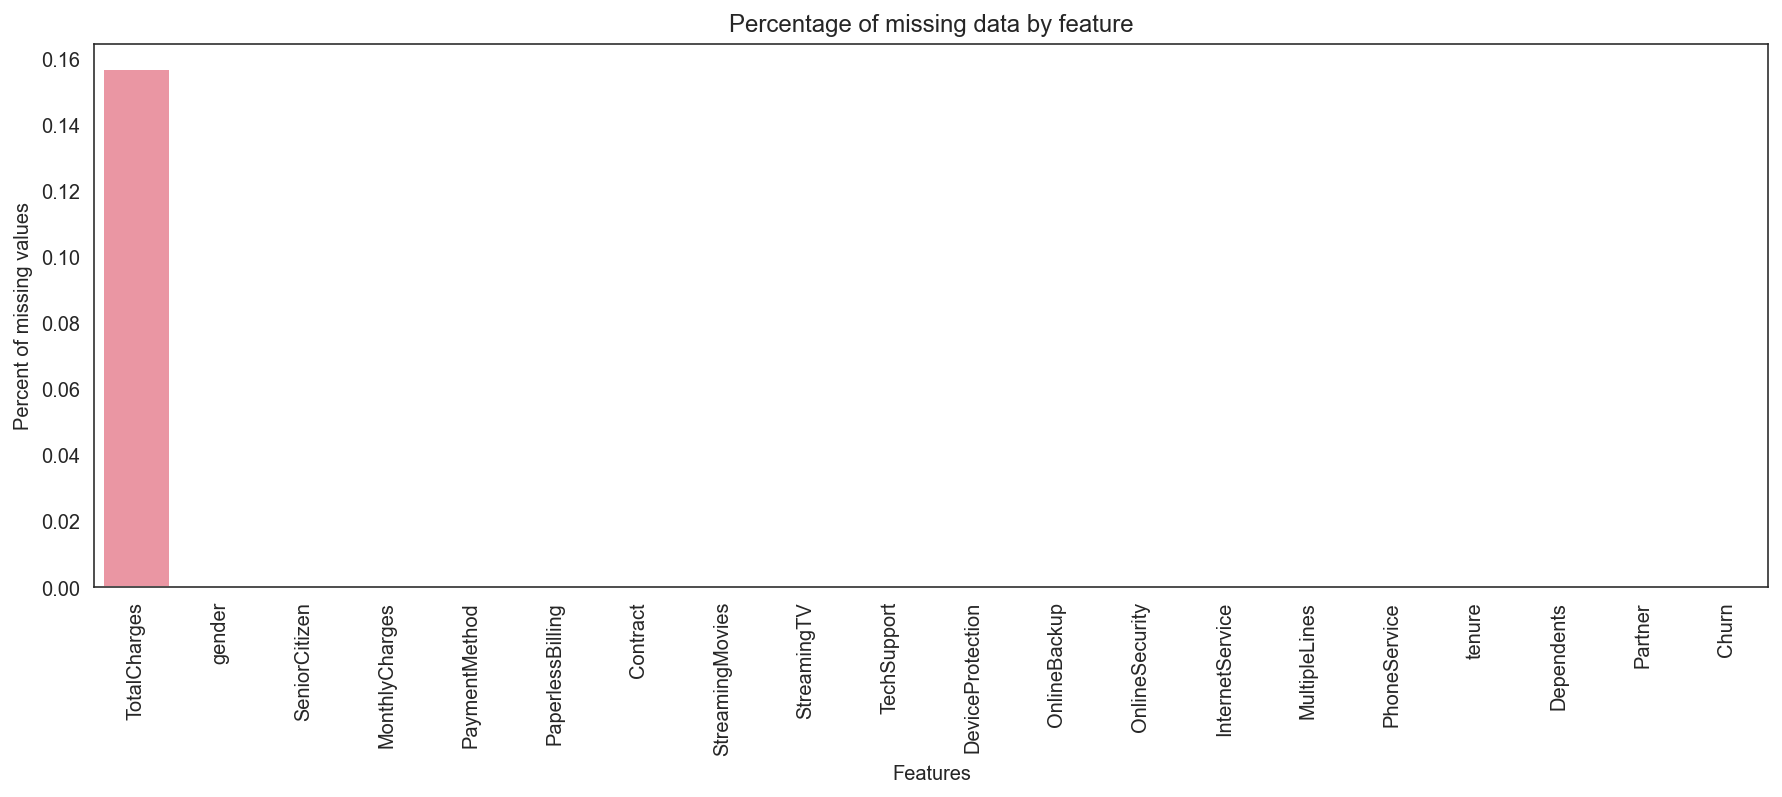

In [22]:
plt.figure(figsize=(15, 5))
sns.barplot(x=percent.index, y=percent)
plt.title('Percentage of missing data by feature')
plt.xlabel('Features')
plt.ylabel('Percent of missing values')
plt.xticks(rotation=90);

    - 'TotalCharges' contains 11 missing values. Less than 0.016% of its total.
    - We'll handle missing values during the modeling stages.

In [23]:
# Examine the missing values in the dataset
df[np.isnan(df['TotalCharges'])]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


    - When examining the missing data in 'TotalCharges', we notice that all these customers have a tenure of zero (0), however 'MonthlyCharges' are not missing. Also, none of these customers churned. What does this mean? One answer is that these could be new customers in the last month, so they likely wouldn't have any 'TotalCharges' yet.

In [24]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7021.0,0.162512,0.368947,0.00,0.0000,0.000,0.0000,1.00
tenure,7021.0,32.469449,24.534965,0.00,9.0000,29.000,55.0000,72.00
MonthlyCharges,7021.0,64.851894,30.069001,18.25,35.7500,70.400,89.9000,118.75
TotalCharges,7010.0,2290.353388,2266.820832,18.80,408.3125,1403.875,3807.8375,8684.80


In [25]:
df.describe(include='object').T

,count,unique,top,freq
gender,7021,2,Male,3541
Partner,7021,2,No,3619
Dependents,7021,2,No,4911
PhoneService,7021,2,Yes,6339
MultipleLines,7021,3,No,3368
InternetService,7021,3,Fiber optic,3090
OnlineSecurity,7021,3,No,3490
OnlineBackup,7021,3,No,3080
DeviceProtection,7021,3,No,3087
TechSupport,7021,3,No,3465


## Target Feature

In [26]:
target = df['Churn']

In [27]:
target.describe()

count     7021
unique       2
top         No
freq      5164
Name: Churn, dtype: object

In [28]:
target_count = target.value_counts()
target_count

No     5164
Yes    1857
Name: Churn, dtype: int64

In [29]:
sum_retained = target_count[0]
sum_churned = target_count[1]
print('Number of retained customers:', sum_retained)
print('Number of churned customers:', sum_churned)

Number of retained customers: 5164
Number of churned customers: 1857


    - 5164 customers were retained, while 1857 customers churned.

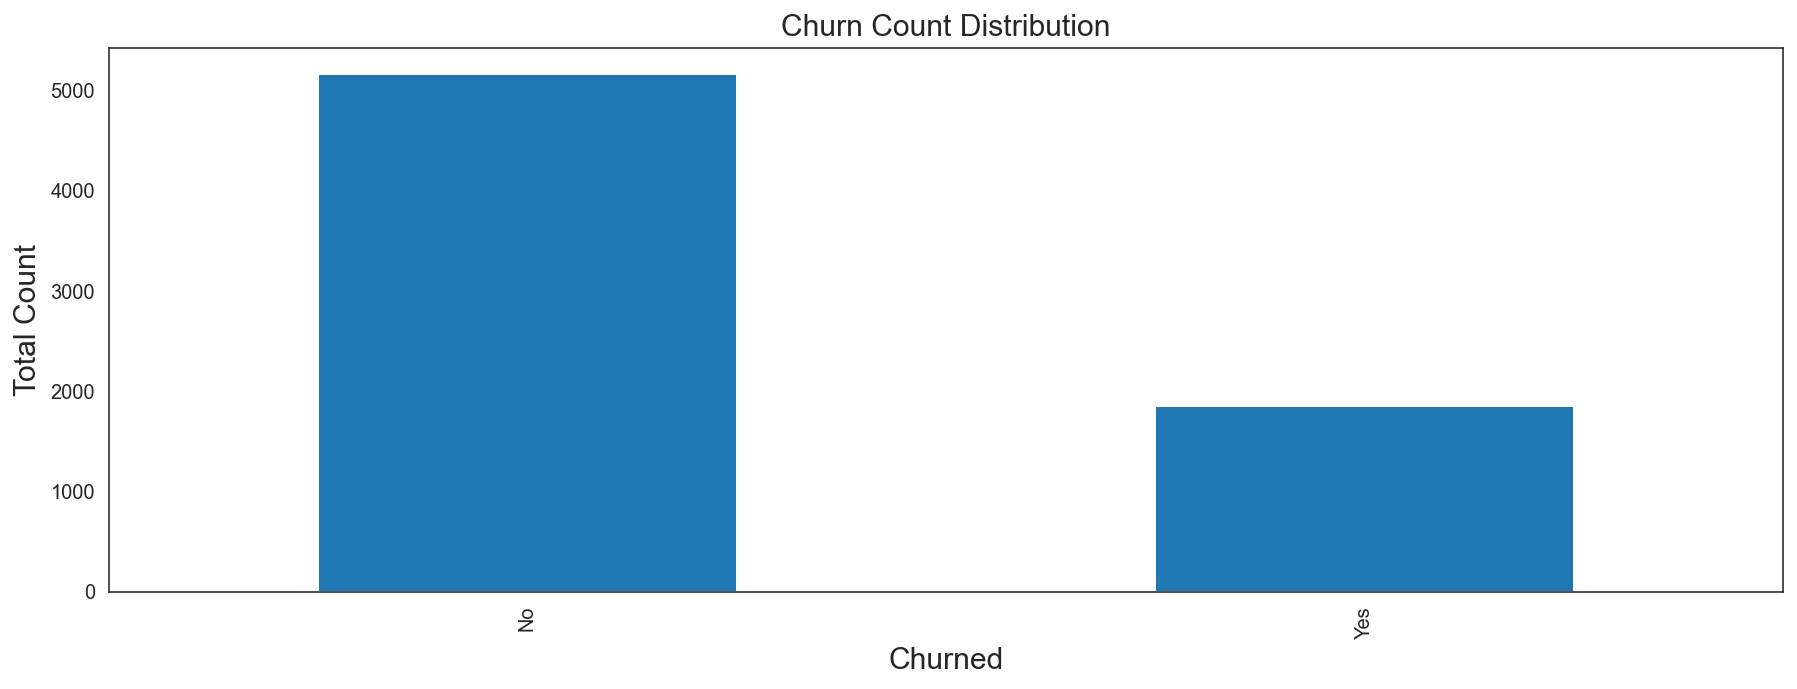

In [30]:
plt.figure(figsize=(15, 5))
target_count.plot.bar()
plt.title('Churn Count Distribution', size=15)
plt.xlabel('Churned', size=15)
plt.ylabel('Total Count', size=15);

In [31]:
target_percent= target.value_counts(normalize=True) * 100
target_percent

No     73.550776
Yes    26.449224
Name: Churn, dtype: float64

In [32]:
percent_retained = target_percent[0]
percent_churned = target_percent[1]
print(f'Percentage of retained customers: {round(percent_retained, 2)}%')
print(f'Percentage of churned customers: {round(percent_churned, 2)}%')

Percentage of retained customers: 73.55%
Percentage of churned customers: 26.45%


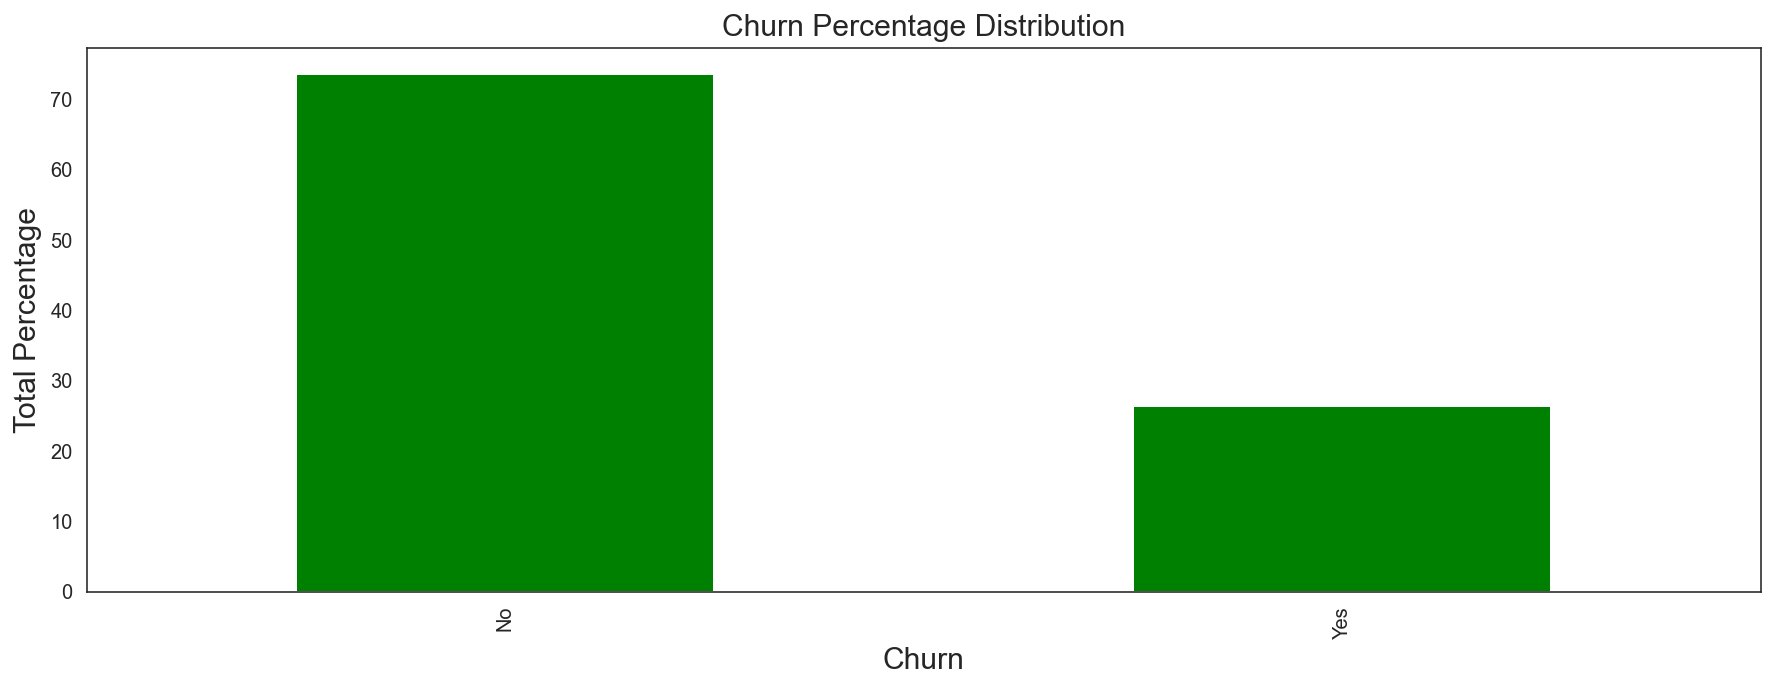

In [33]:
plt.figure(figsize=(15, 5))
target_percent.plot.bar(color='green')
plt.title('Churn Percentage Distribution', size=15)
plt.xlabel('Churn', size=15)
plt.ylabel('Total Percentage', size=15);

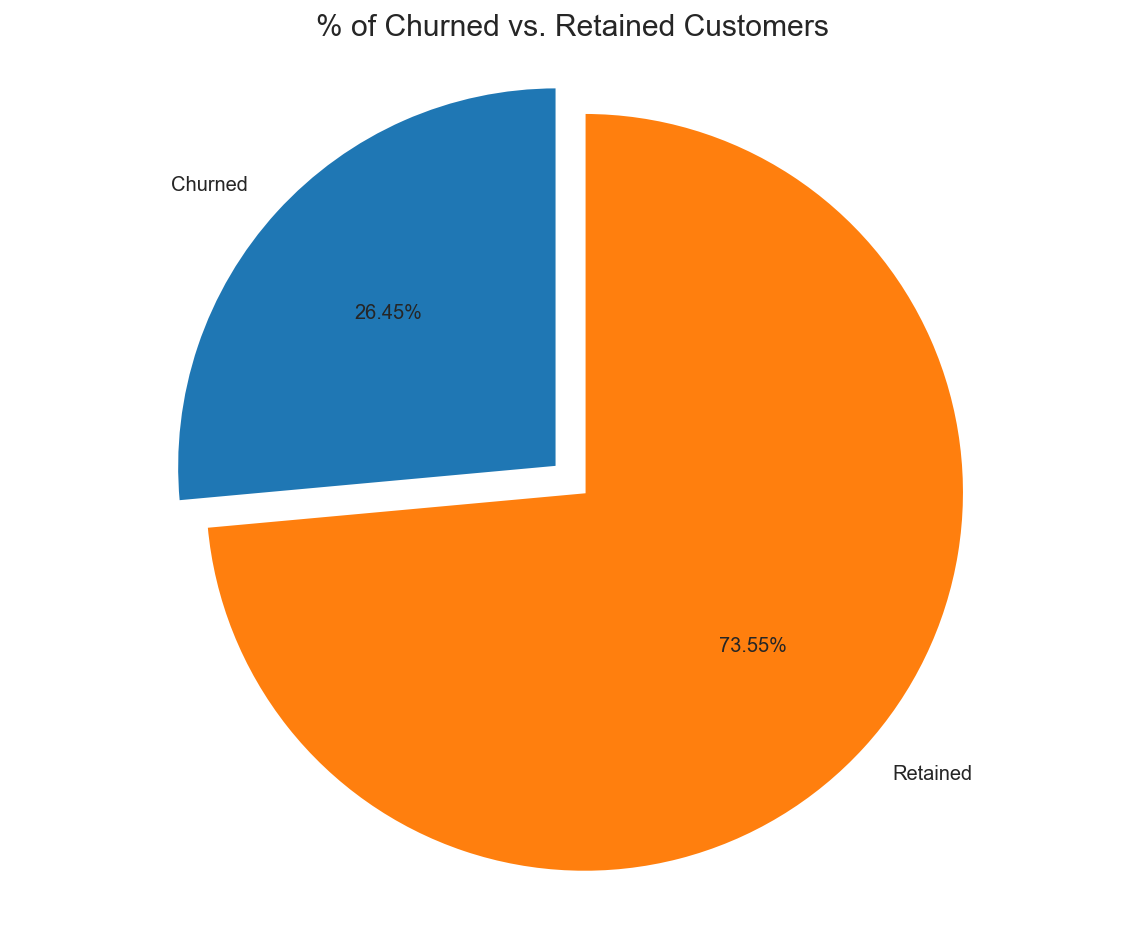

In [34]:
labels = 'Churned', 'Retained'
sizes = [df.Churn[df['Churn']=='Yes'].count(), df.Churn[df['Churn']=='No'].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.2f%%',
        shadow=False, startangle=90)
ax1.axis('equal')
plt.title('% of Churned vs. Retained Customers', size=15)
plt.show()

    - We have imbalanced target feature.
    - 73.55% of customers, representing 5164 customers were loyal and remained with the company.
    - 26.45% of customers, representing 1857 customers didn't show loyalty with the company and churned.
    - The target feature 'Churn' is a categorical dtype and will need to be encoded before modeling.

### Encode Target Variable

In [35]:
# let's examine the target variable values
df['Churn'].head()

0     No
1     No
2    Yes
3     No
4    Yes
Name: Churn, dtype: object

    - As we noticed above the target variable is categorical. Let's encode it to numerical values.

In [36]:
from sklearn.preprocessing import LabelEncoder
df['Churn'] = LabelEncoder().fit_transform(df['Churn'])

In [37]:
# let's examine the encoded target variable
df['Churn'].head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

    - Indeed the traget variable was encoded to numerical.

In [38]:
# let's examine the class distribution of the encode target variable
df['Churn'].value_counts()

0    5164
1    1857
Name: Churn, dtype: int64

    - The class distribution was preserved correctly using LabelEncoder.

## Numerical Features

In [39]:
num = df.select_dtypes(include='number').columns
print(f'The numerical features are:\n{num}')

The numerical features are:
Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn'], dtype='object')


In [40]:
df[num].head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
0,0,1,29.85,29.85,0
1,0,34,56.95,1889.50,0
2,0,2,53.85,108.15,1
3,0,45,42.30,1840.75,0
4,0,2,70.70,151.65,1


#### Statistical Summary

In [41]:
df[num].describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7021.0,0.162512,0.368947,0.00,0.0000,0.000,0.0000,1.00
tenure,7021.0,32.469449,24.534965,0.00,9.0000,29.000,55.0000,72.00
MonthlyCharges,7021.0,64.851894,30.069001,18.25,35.7500,70.400,89.9000,118.75
TotalCharges,7010.0,2290.353388,2266.820832,18.80,408.3125,1403.875,3807.8375,8684.80
Churn,7021.0,0.264492,0.441094,0.00,0.0000,0.000,1.0000,1.00


#### Distribution

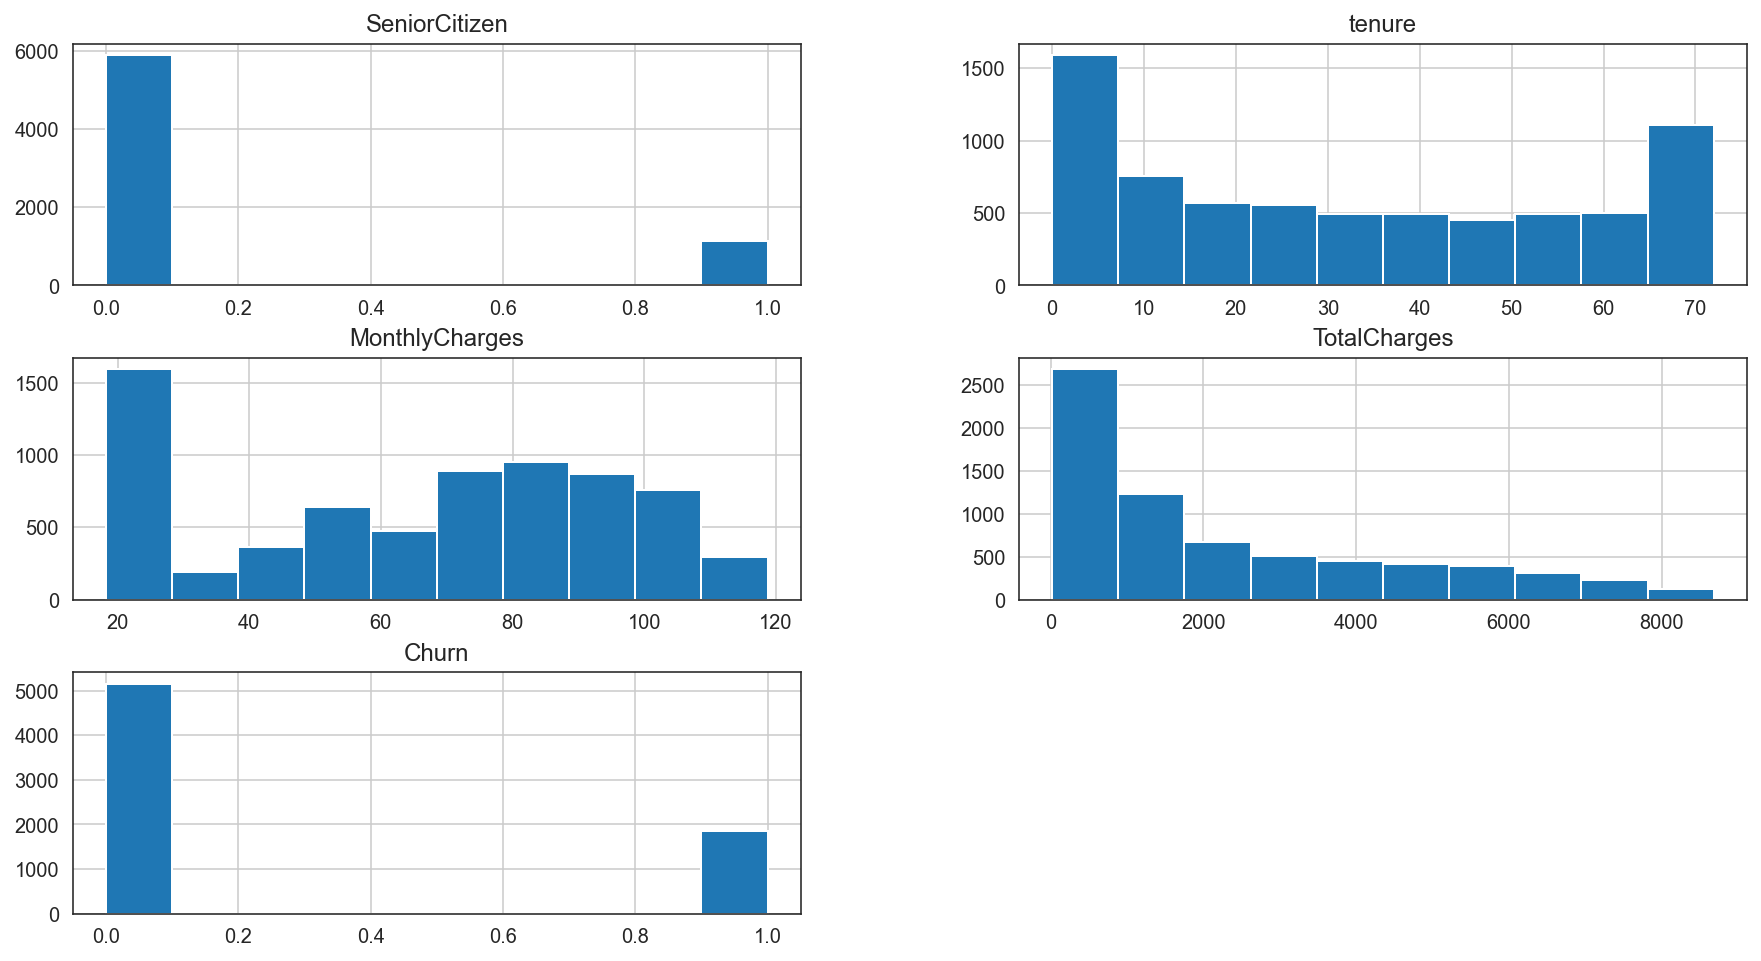

In [42]:
df[num].hist(figsize=(15, 8));

    - We have 5 numerical features in our dataset.
    - All our numerical features have varying scale.
    - 'SeniorCitizen' and 'Churn' doesn't appear to be a continous numerical feature. They're actually 
      binary categorical features encoded numerically as 0 and 1.
    - 'MonthlyCharges' has a slight left skew distribution (mean: 64.85 & median: 70.40).
    - 'tenure' has a slight right skew distribution (mean: 32.47 & median: 29.00).
    - 'TotalCharges' has a right skew distribution (mean: 2290.35 & median: 1403.88).

#### vs. Target Feature

In [43]:
df.groupby('Churn')['SeniorCitizen'].describe()

,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
0,5164.0,0.128970,0.335199,0.0,0.0,0.0,0.0,1.0
1,1857.0,0.255789,0.436421,0.0,0.0,0.0,1.0,1.0


In [44]:
df.groupby('Churn')['tenure'].describe()

,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
0,5164.0,37.640782,24.083296,0.0,15.0,38.0,61.0,72.0
1,1857.0,18.088853,19.546231,1.0,2.0,10.0,29.0,72.0


In [45]:
df.groupby('Churn')['MonthlyCharges'].describe()

,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
0,5164.0,61.344878,31.069815,18.25,25.1,64.5,88.4625,118.75
1,1857.0,74.604308,24.597504,18.85,56.5,79.7,94.2500,118.35


In [46]:
df.groupby('Churn')['TotalCharges'].describe()

,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
0,5153.0,2560.264118,2329.034632,18.80,581.85,1688.9,4265.0,8672.45
1,1857.0,1541.376548,1893.151020,18.85,140.70,713.1,2345.2,8684.80


#### Distributions

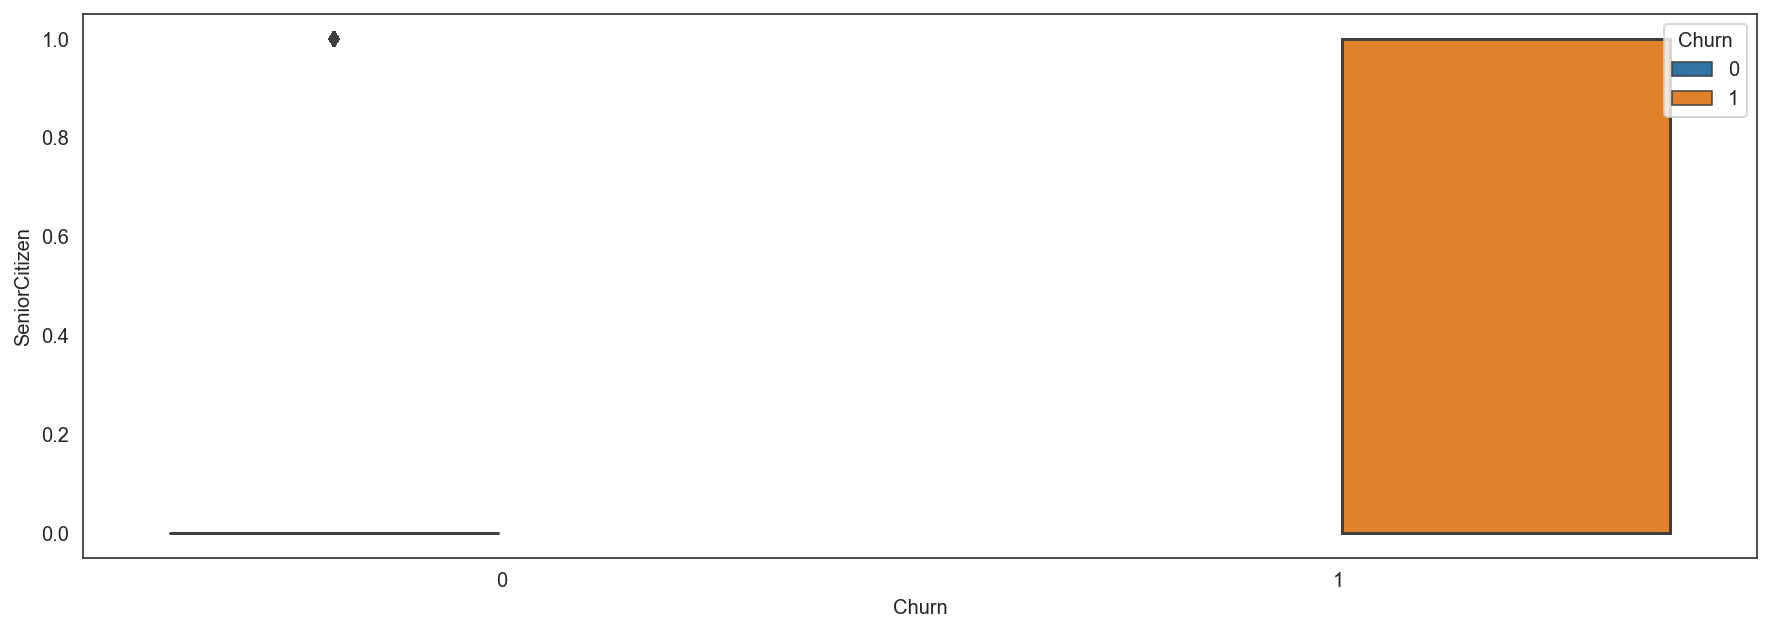

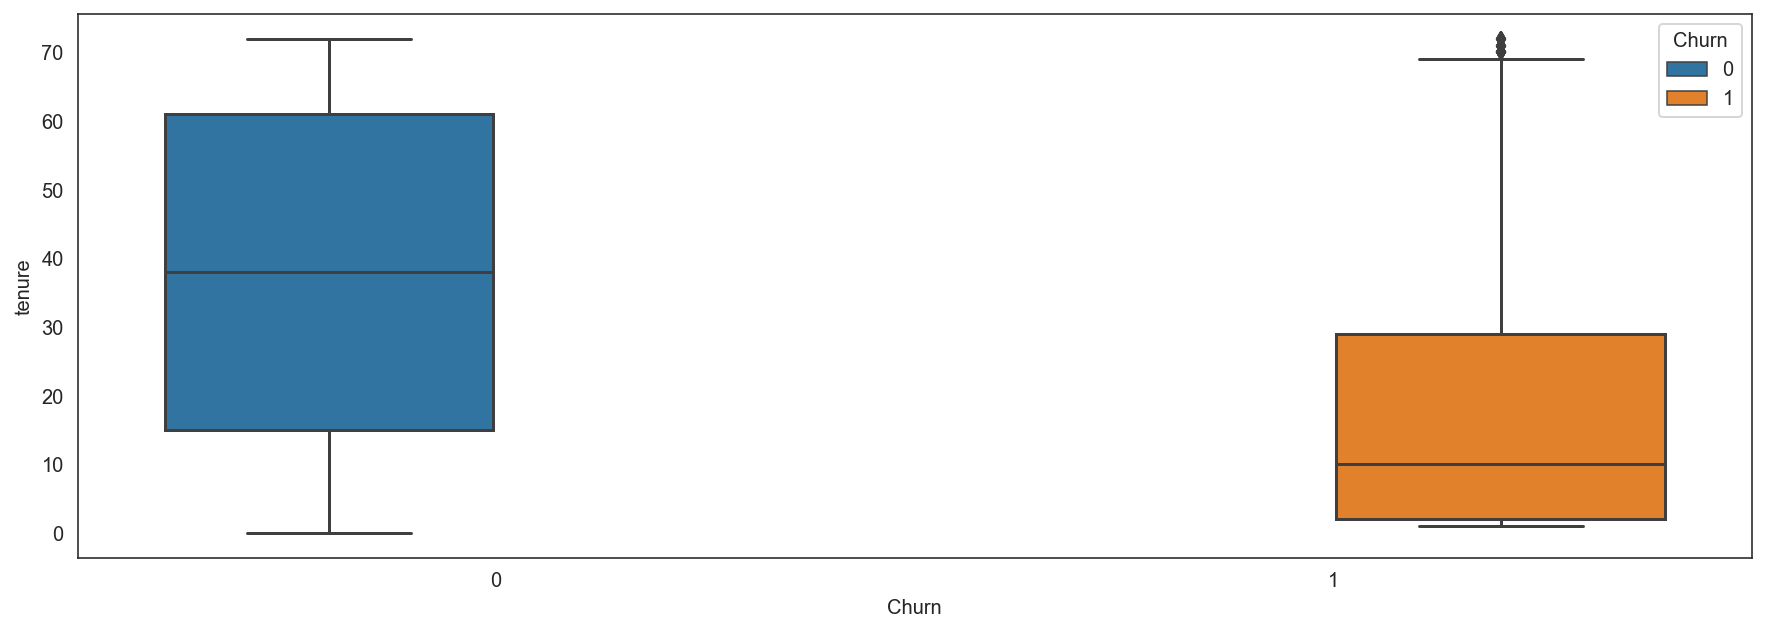

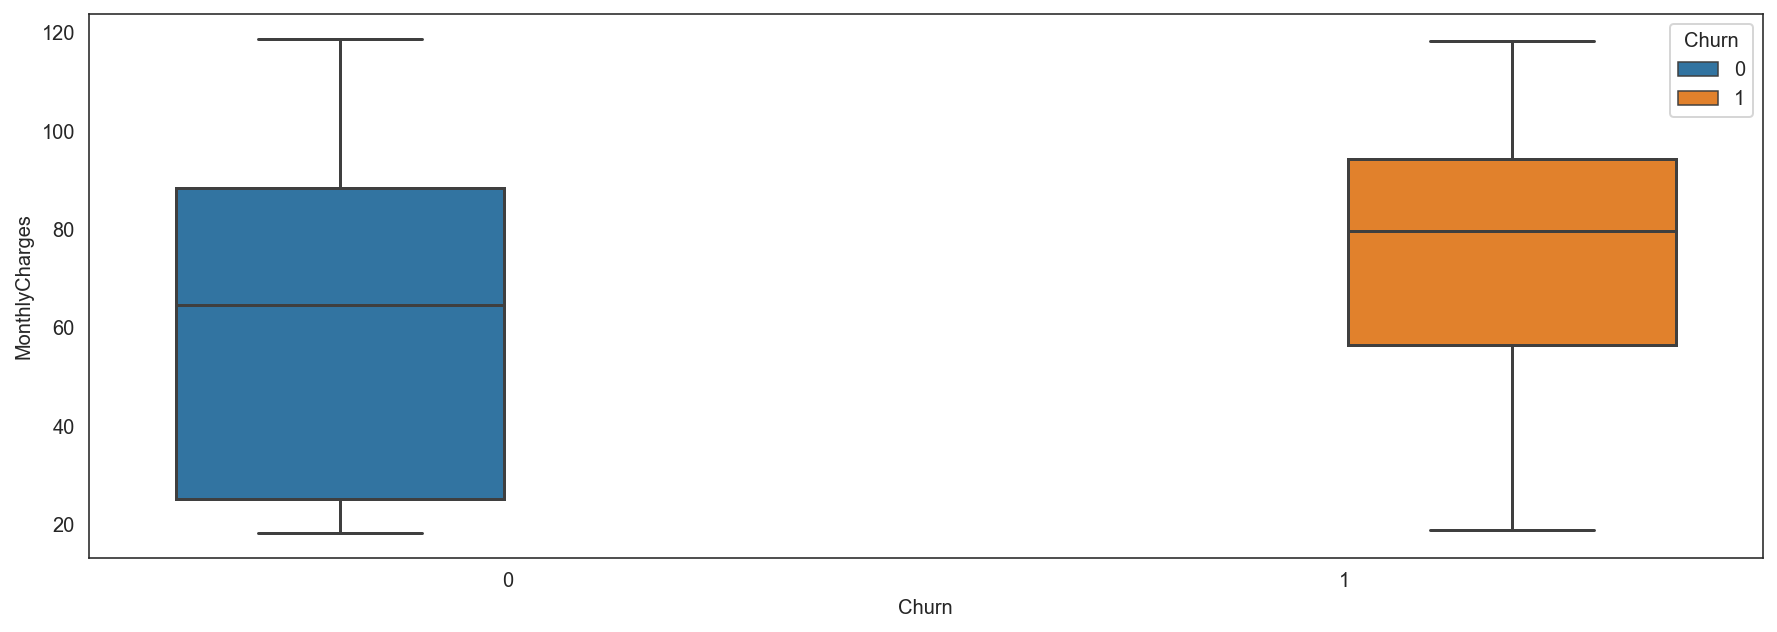

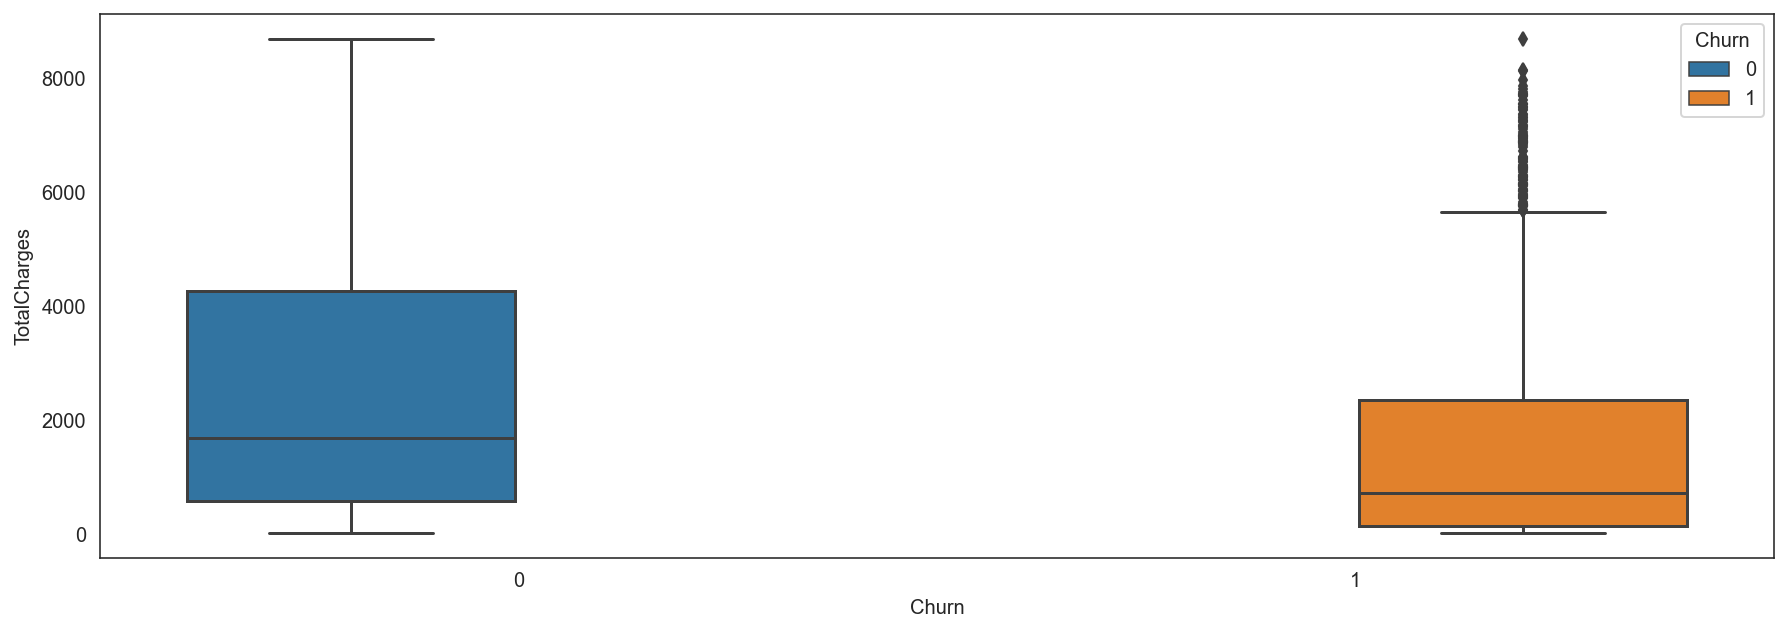

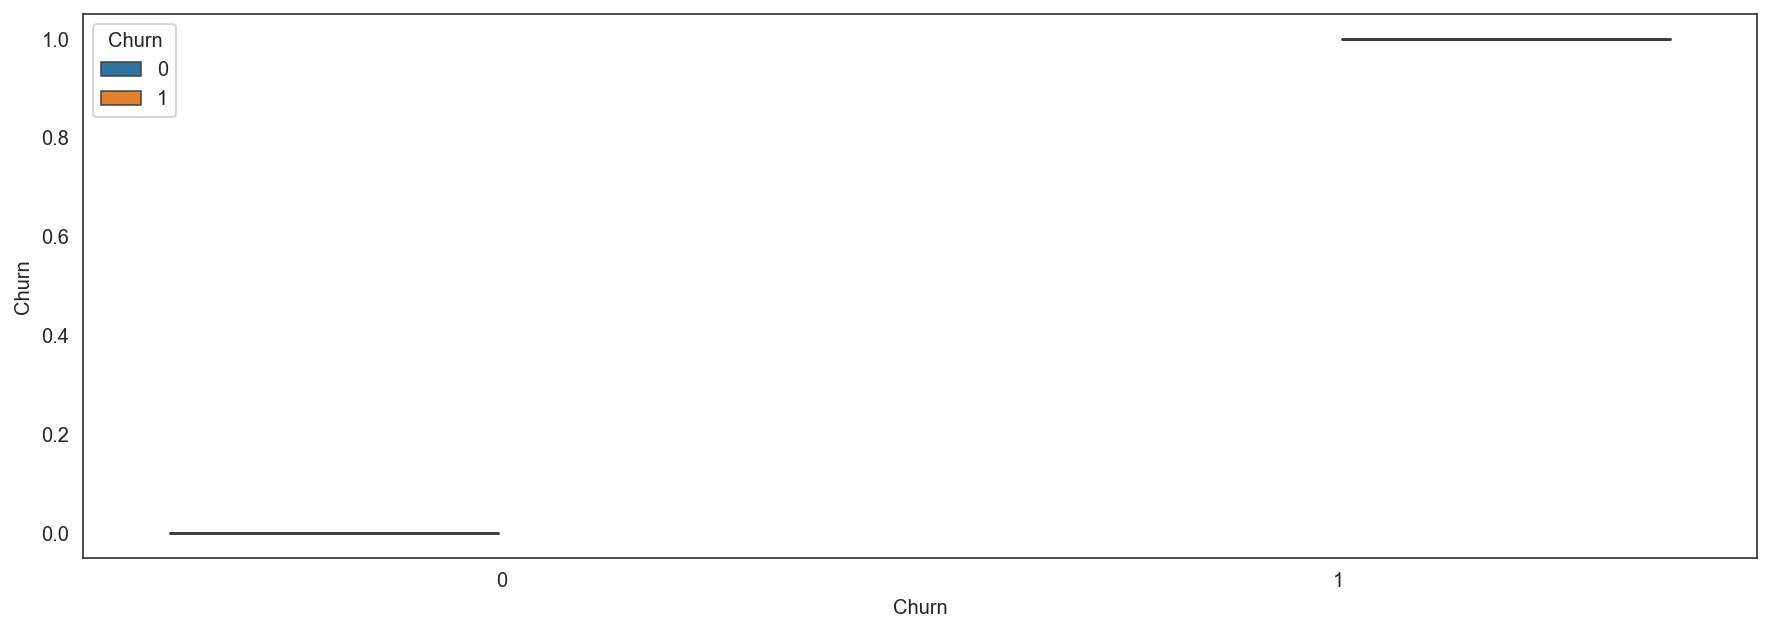

In [47]:
for feature in num:
    plt.figure(figsize=(15,5))
    sns.boxplot(data=df, x=df['Churn'], y=df[feature], hue=df['Churn'])

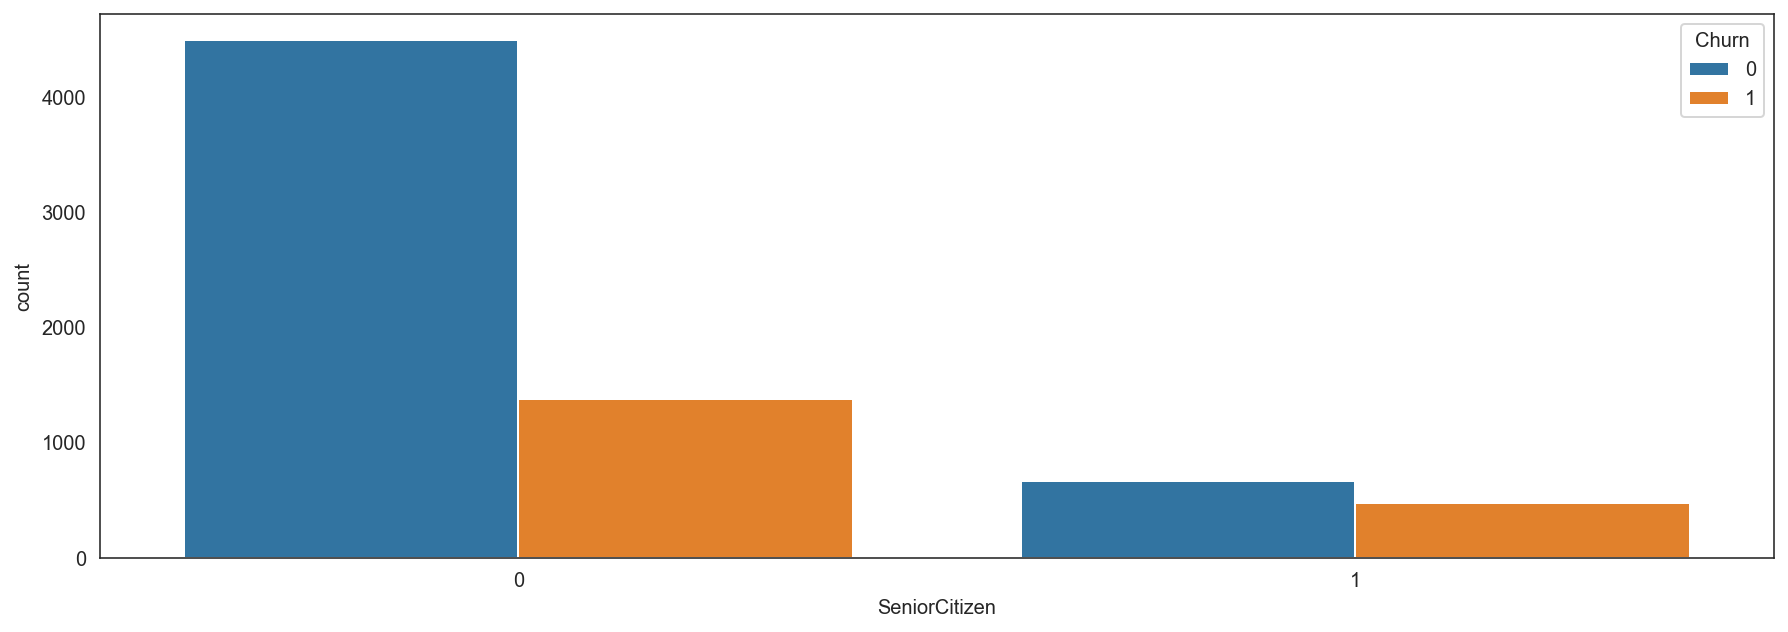

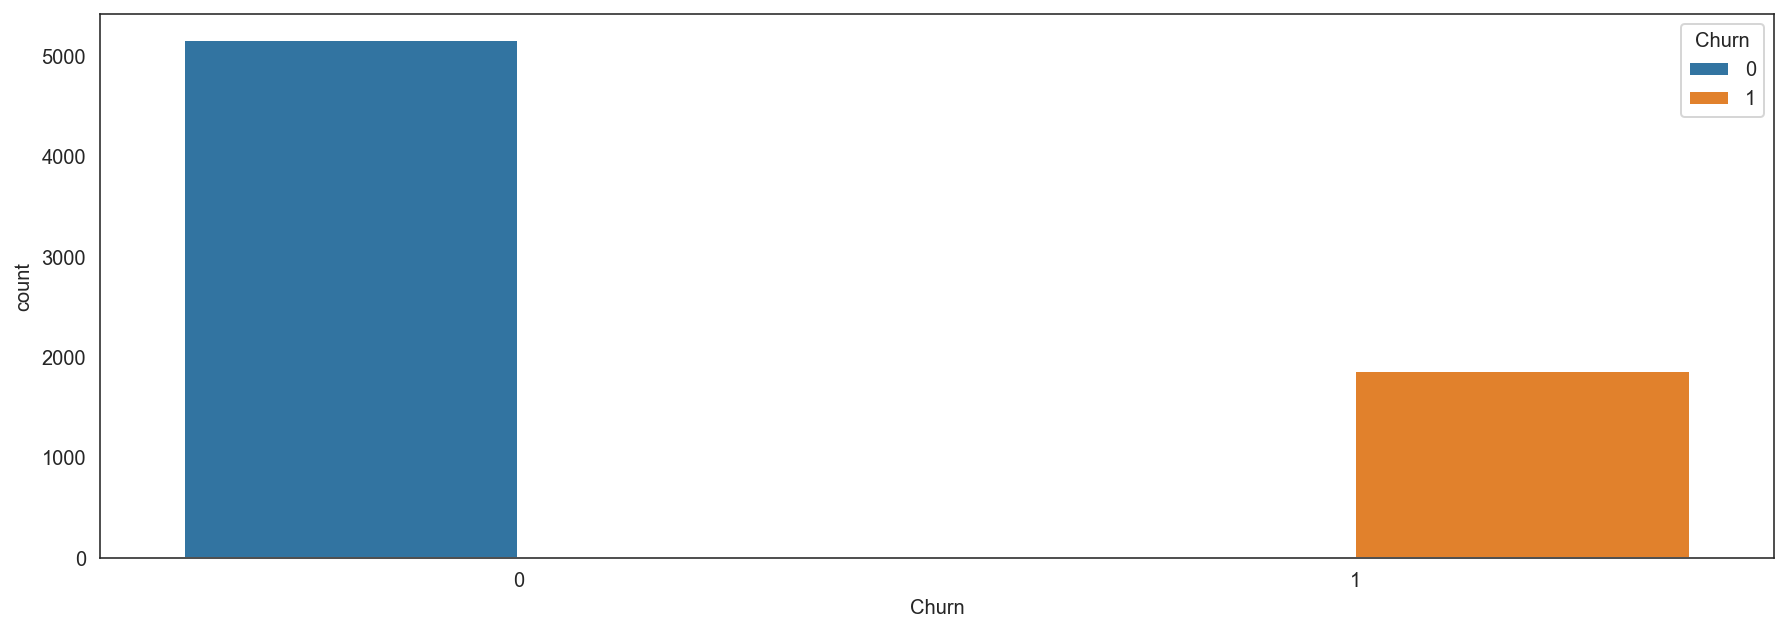

In [48]:
for feature in ['SeniorCitizen', 'Churn']:
    plt.figure(figsize=(15,5))
    sns.countplot(data=df, x=df[feature], hue=df['Churn'])

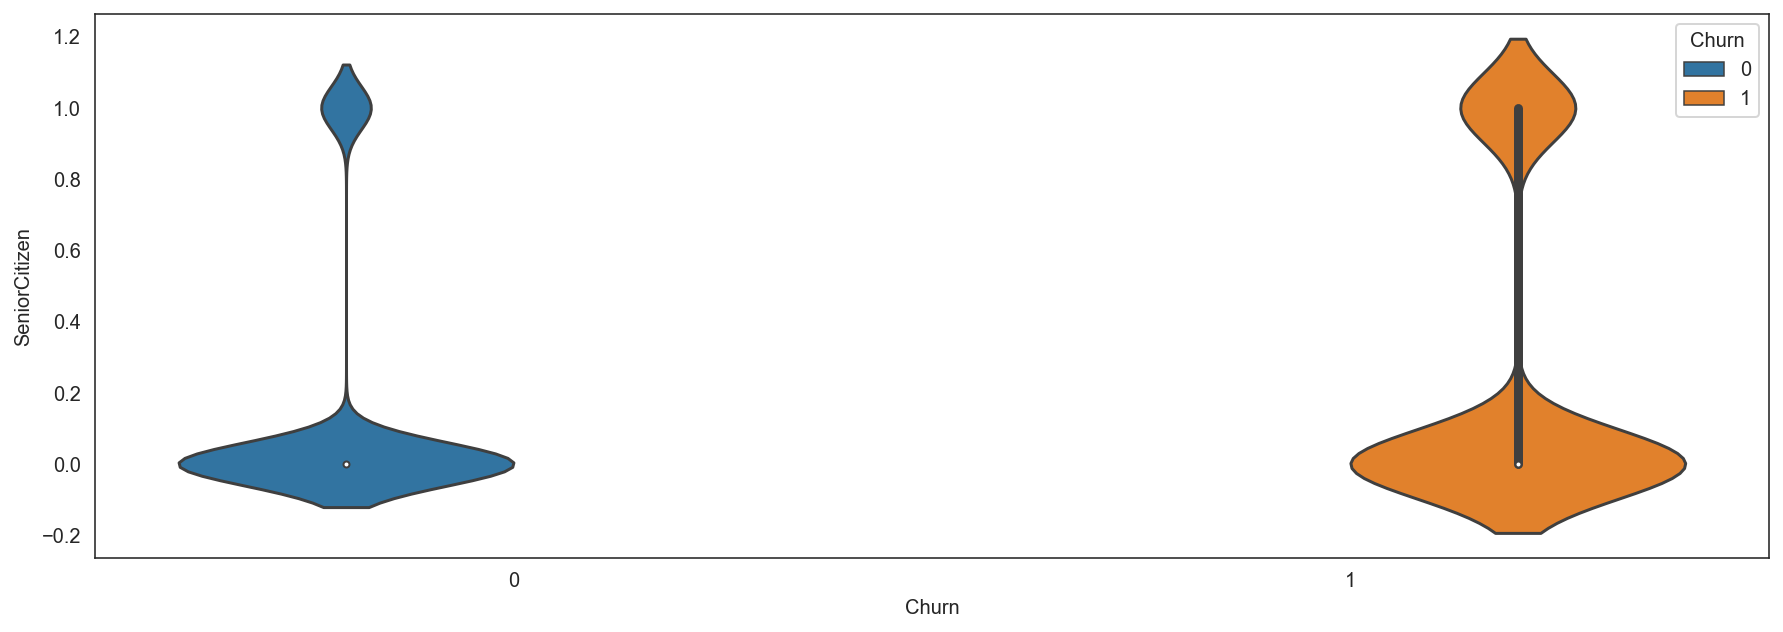

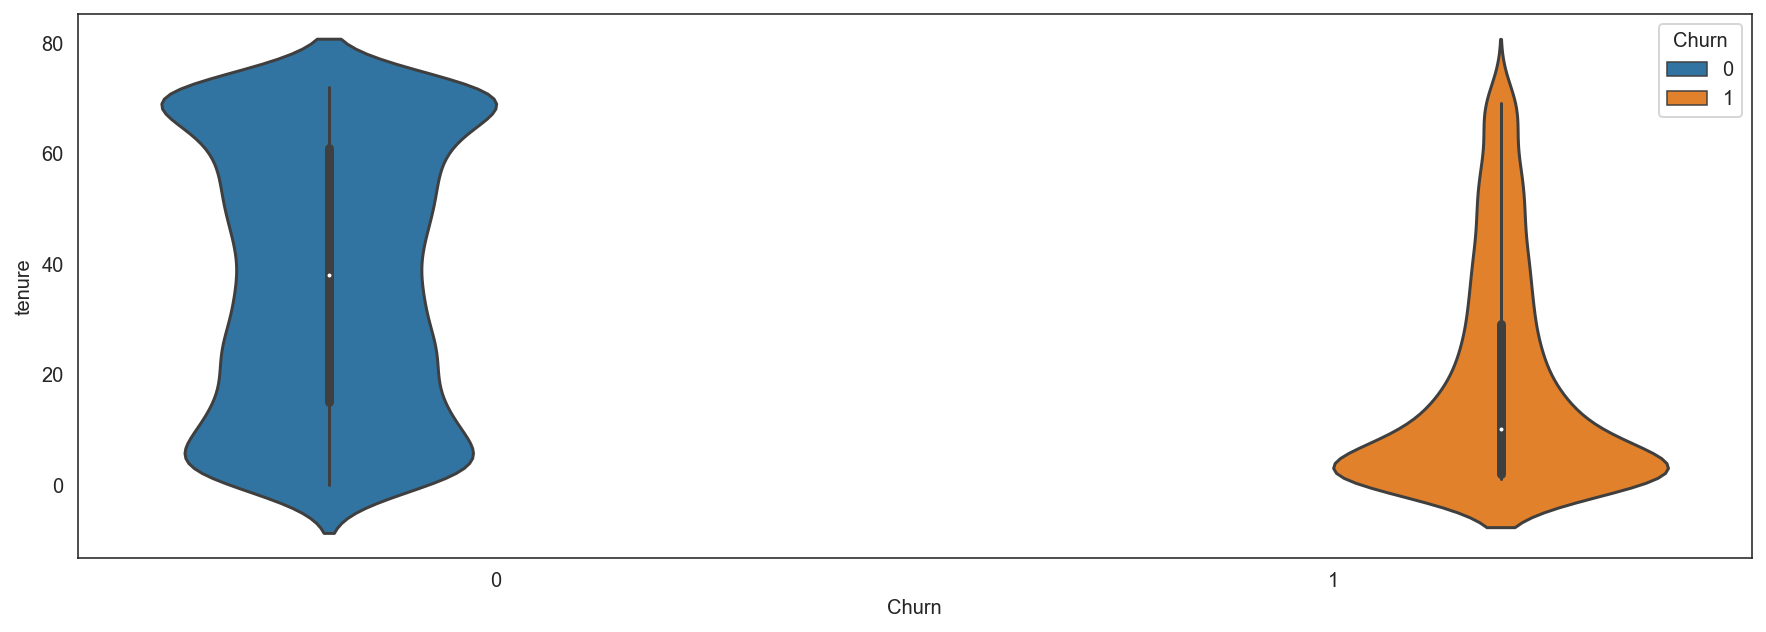

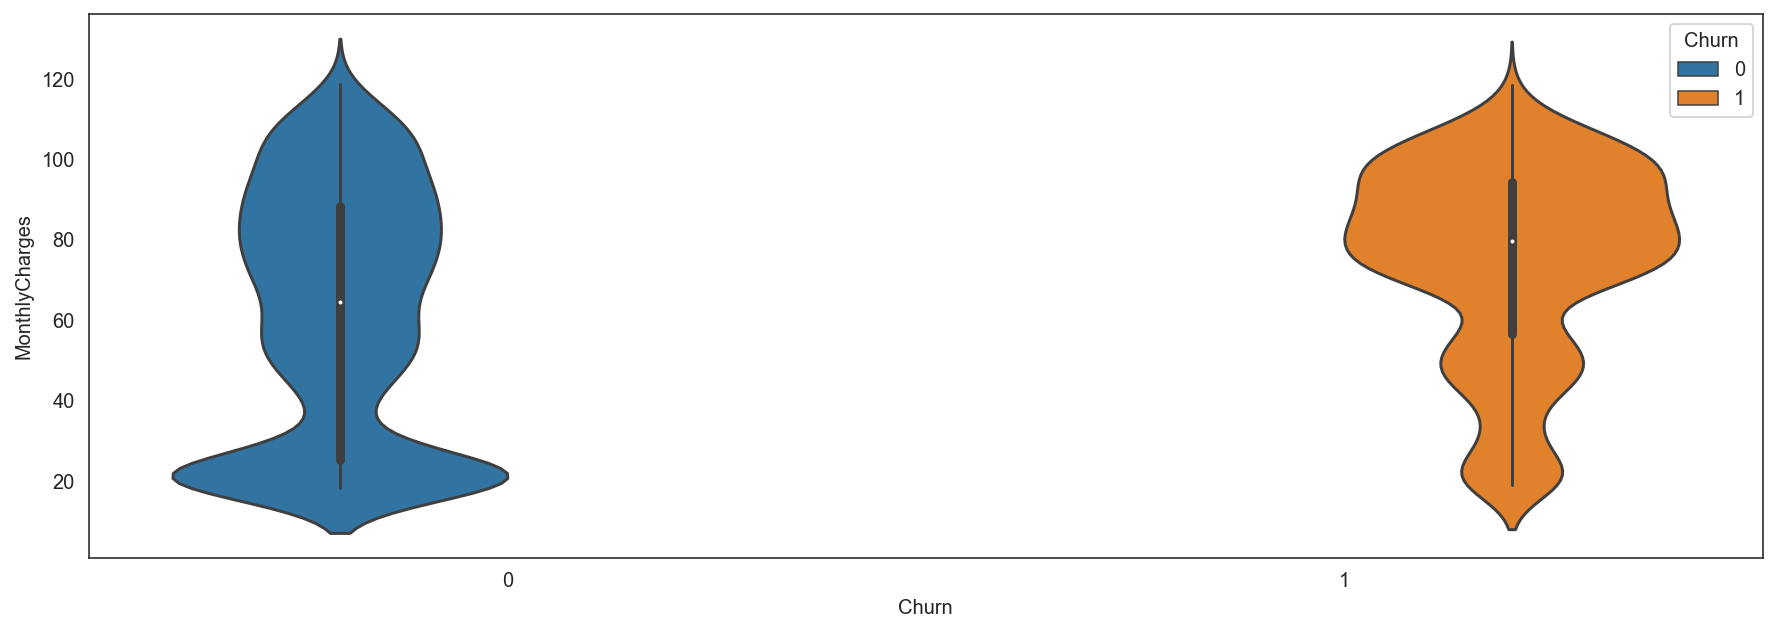

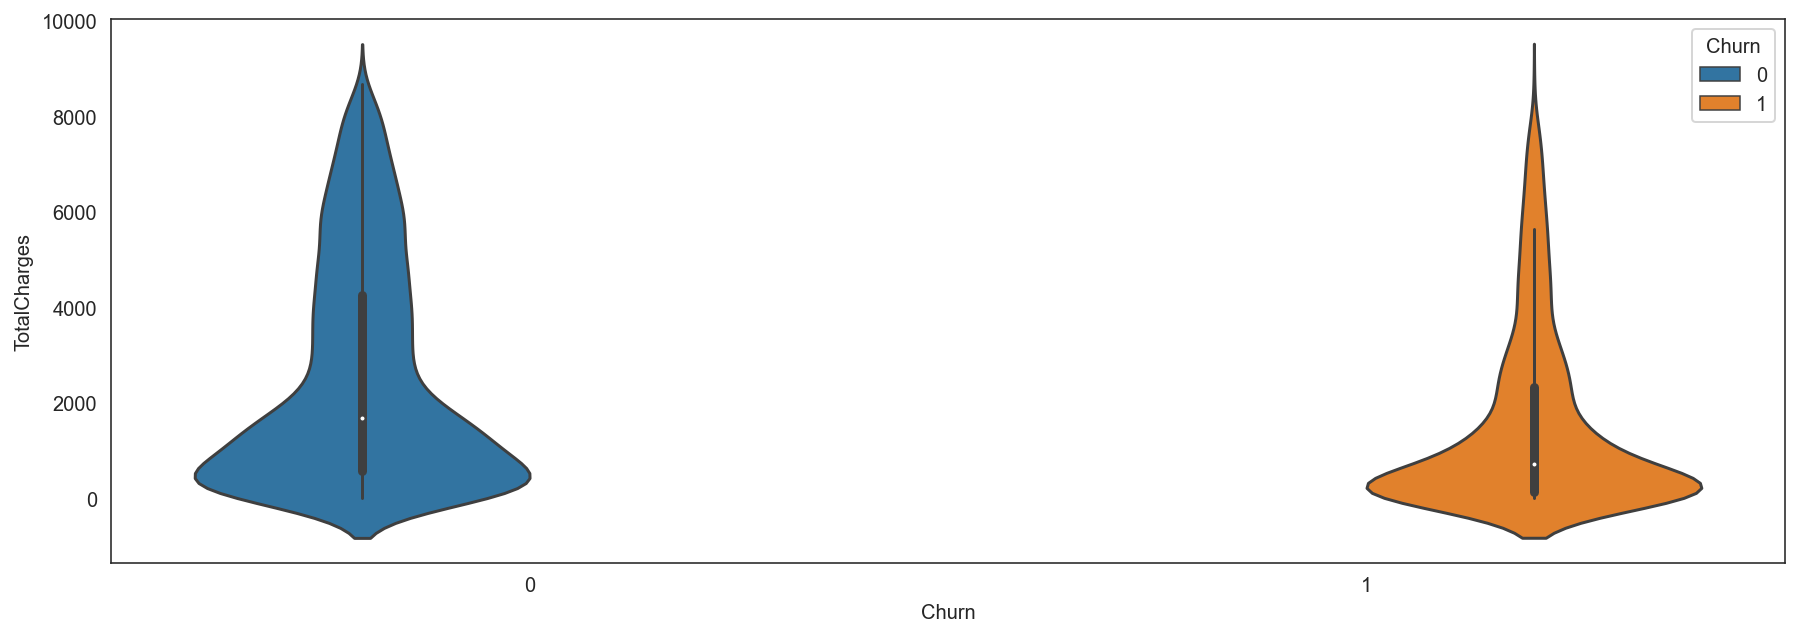

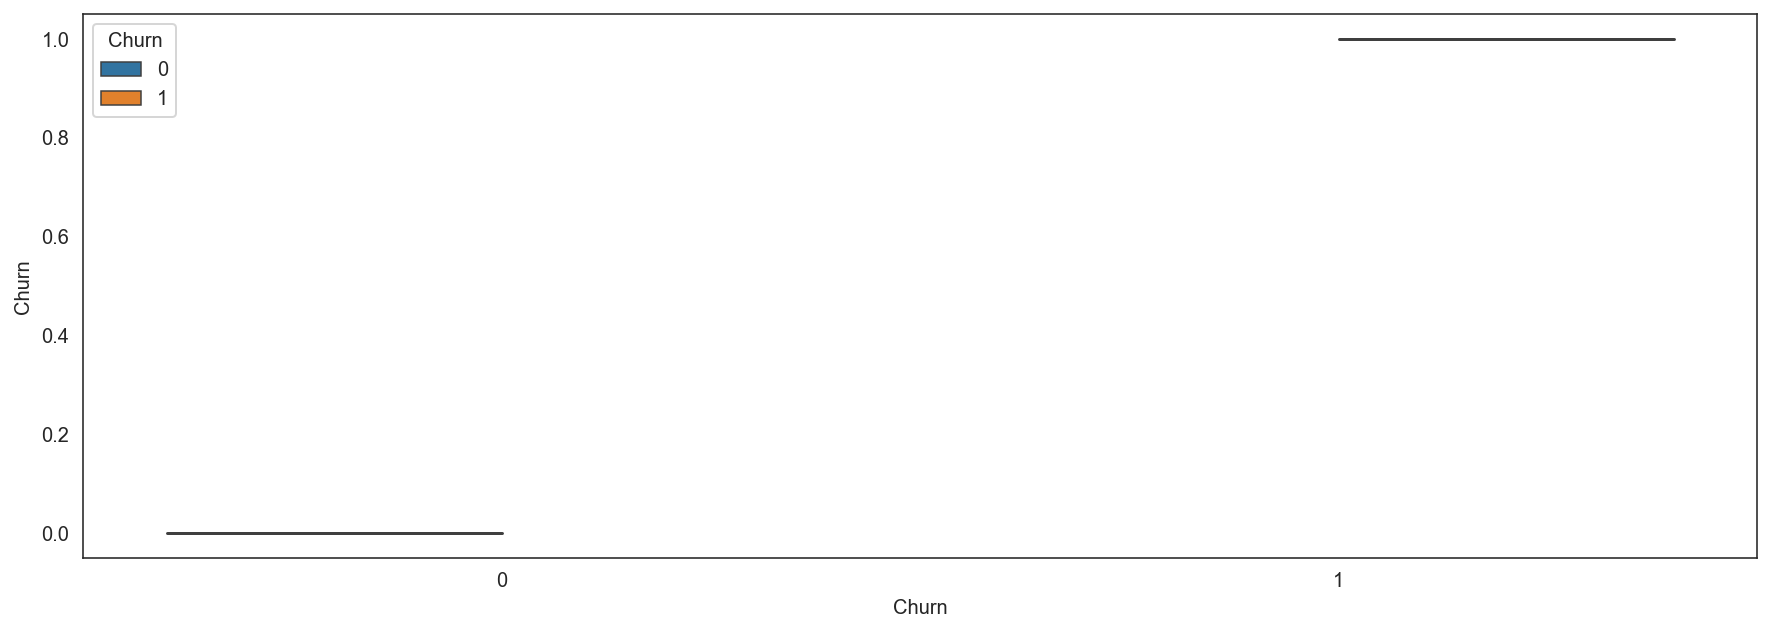

In [49]:
for feature in num:
    plt.figure(figsize=(15,5))
    sns.violinplot(data=df, x=df['Churn'], y=df[feature], hue=df['Churn'])

#### Skew & Kurtosis

In [50]:
df[num].skew()

SeniorCitizen     1.829987
tenure            0.235542
MonthlyCharges   -0.224097
TotalCharges      0.958322
Churn             1.068139
dtype: float64

In [51]:
skew_limit = 0.75 # This is our threshold-limit to evaluate skewness. Overall below abs(1) seems acceptable for the linear models. 
skew_vals = df[num].skew()
skew_cols = skew_vals[abs(skew_vals) > skew_limit].sort_values(ascending=False)
skew_cols

SeniorCitizen    1.829987
Churn            1.068139
TotalCharges     0.958322
dtype: float64

    - Nothing much for the skewness. Quite a normal like distribution for the continuous numerical features.

In [52]:
df[num].kurt()

SeniorCitizen     1.349237
tenure           -1.388090
MonthlyCharges   -1.253974
TotalCharges     -0.238373
Churn            -0.859323
dtype: float64

In [53]:
kurtosis_limit = 1 
kurtosis_vals = df[num].kurt()
kurtosis_cols = kurtosis_vals[abs(kurtosis_vals) > kurtosis_limit].sort_values(ascending=False)
kurtosis_cols

SeniorCitizen     1.349237
MonthlyCharges   -1.253974
tenure           -1.388090
dtype: float64

#### Relationship

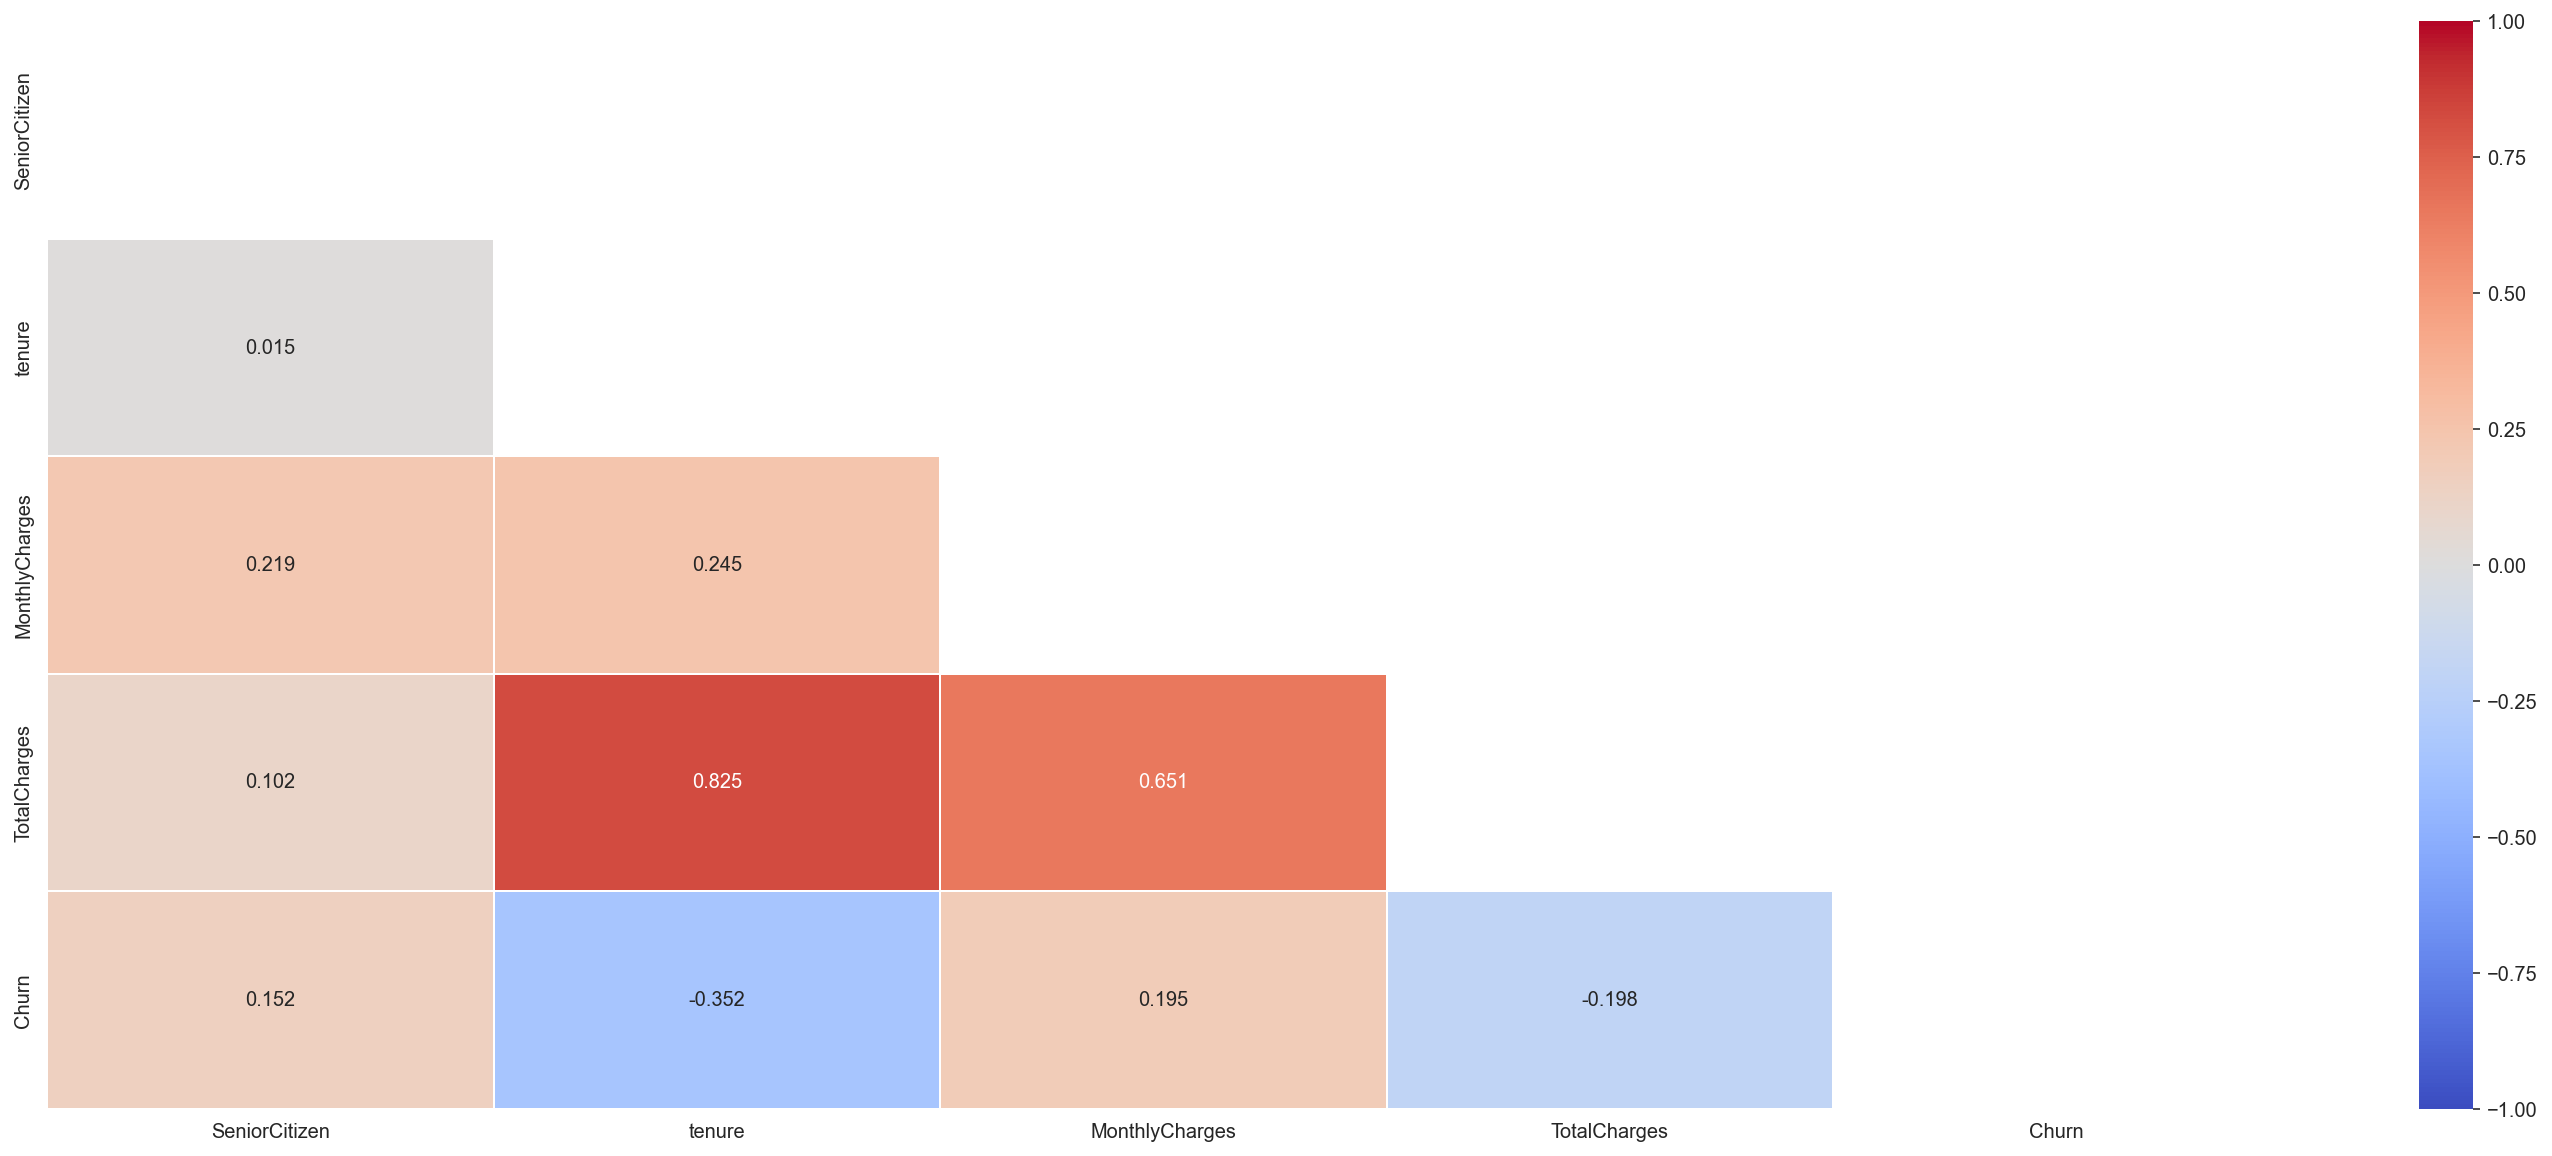

In [54]:
plt.figure(figsize=(25, 10))

corr_matrix = df[num].corr()

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

ax = sns.heatmap(corr_matrix, 
                 mask=mask, 
                 xticklabels=corr_matrix.columns, 
                 yticklabels=corr_matrix.columns, 
                 annot=True,
                 fmt='.3f',
                 linewidths=.2, 
                 cmap='coolwarm', 
                 vmin=-1, vmax=1);

    - There is a strong correlation between 'TotalCharges' and 'tenure' features.
    - There is a moderate correlation between 'TotalCharges' and 'MonthlyCharges' features.

## Categorical Features

In [55]:
cat = df.select_dtypes(include='object').columns
print(f'The categorical features are:\n{cat}')

The categorical features are:
Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')


In [56]:
print(f'The # of categorical features are: {len(cat)}')

The # of categorical features are: 15


In [57]:
df[cat].head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic)
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check


#### Statistical Summary

In [58]:
df[cat].describe().T

,count,unique,top,freq
gender,7021,2,Male,3541
Partner,7021,2,No,3619
Dependents,7021,2,No,4911
PhoneService,7021,2,Yes,6339
MultipleLines,7021,3,No,3368
InternetService,7021,3,Fiber optic,3090
OnlineSecurity,7021,3,No,3490
OnlineBackup,7021,3,No,3080
DeviceProtection,7021,3,No,3087
TechSupport,7021,3,No,3465


    - We have 15 categorical features in our dataset.

#### Uniques

In [59]:
for feature in cat:
    print(f'Feature Name: {feature}')
    print(f'The # of unique values are: {df[feature].nunique()}')
    print(f'The unique values are: {df[feature].unique()}\n')
    print('-' * 100)
    print()
    


Feature Name: gender
The # of unique values are: 2
The unique values are: ['Female' 'Male']

----------------------------------------------------------------------------------------------------

Feature Name: Partner
The # of unique values are: 2
The unique values are: ['Yes' 'No']

----------------------------------------------------------------------------------------------------

Feature Name: Dependents
The # of unique values are: 2
The unique values are: ['No' 'Yes']

----------------------------------------------------------------------------------------------------

Feature Name: PhoneService
The # of unique values are: 2
The unique values are: ['No' 'Yes']

----------------------------------------------------------------------------------------------------

Feature Name: MultipleLines
The # of unique values are: 3
The unique values are: ['No phone service' 'No' 'Yes']

----------------------------------------------------------------------------------------------------

Feature 

    - Categorical features does not have high cardinality.
    - From the above, the value 'No internet service' is repeating for several features. It is equivalent to 'No' 
      and thus we can combine the values.
    - In 'MultipleLines' feature, we have the same issue mentioned above. Instead the value is 'No phone service', 
      and it means the same as 'No'.
    - We'll need to clean this data up.

In [60]:
df['MultipleLines'] = df['MultipleLines'].replace('No phone service', 'No')

In [61]:
cols_to_clean = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
df[cols_to_clean] = df[cols_to_clean].replace('No internet service', 'No')

In [62]:
df[cat].nunique()

gender              2
Partner             2
Dependents          2
PhoneService        2
MultipleLines       2
InternetService     3
OnlineSecurity      2
OnlineBackup        2
DeviceProtection    2
TechSupport         2
StreamingTV         2
StreamingMovies     2
Contract            3
PaperlessBilling    2
PaymentMethod       4
dtype: int64

    - Great, the categorical values has cleaned up now!

#### Distributions

In [63]:
for feature in cat:
    print(f'Feature: {feature}\n')
    print(f'Count Distribution\n')
    print(f'{df[feature].value_counts()}\n') 
    print(f'Percentage Distribution\n')
    print(f'{df[feature].value_counts(normalize=True) * 100}\n')
    print('-' * 100)
    print()

Feature: gender

Count Distribution

Male      3541
Female    3480
Name: gender, dtype: int64

Percentage Distribution

Male      50.434411
Female    49.565589
Name: gender, dtype: float64

----------------------------------------------------------------------------------------------------

Feature: Partner

Count Distribution

No     3619
Yes    3402
Name: Partner, dtype: int64

Percentage Distribution

No     51.545364
Yes    48.454636
Name: Partner, dtype: float64

----------------------------------------------------------------------------------------------------

Feature: Dependents

Count Distribution

No     4911
Yes    2110
Name: Dependents, dtype: int64

Percentage Distribution

No     69.947301
Yes    30.052699
Name: Dependents, dtype: float64

----------------------------------------------------------------------------------------------------

Feature: PhoneService

Count Distribution

Yes    6339
No      682
Name: PhoneService, dtype: int64

Percentage Distribution

Yes    

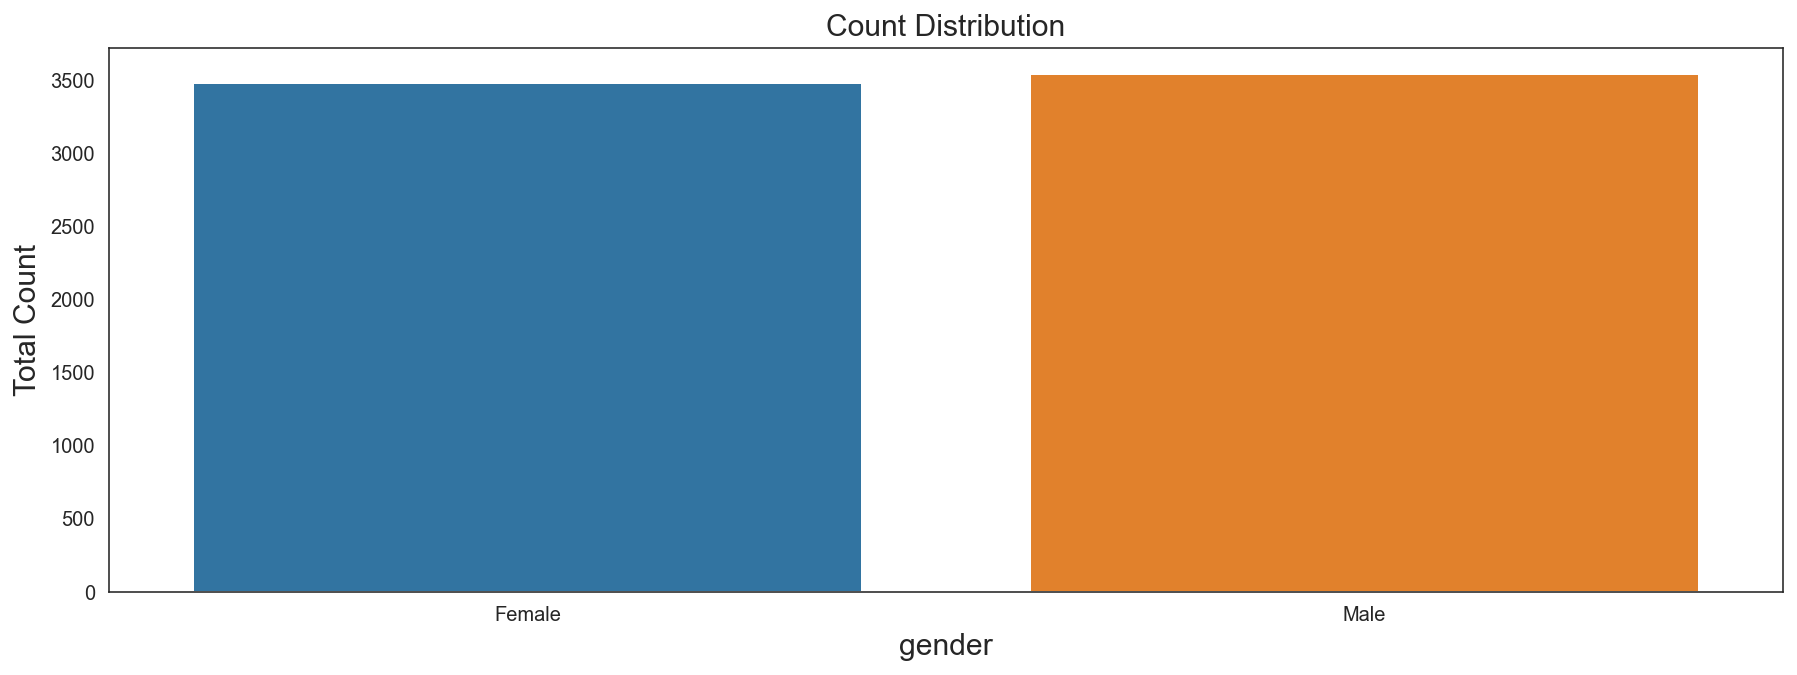

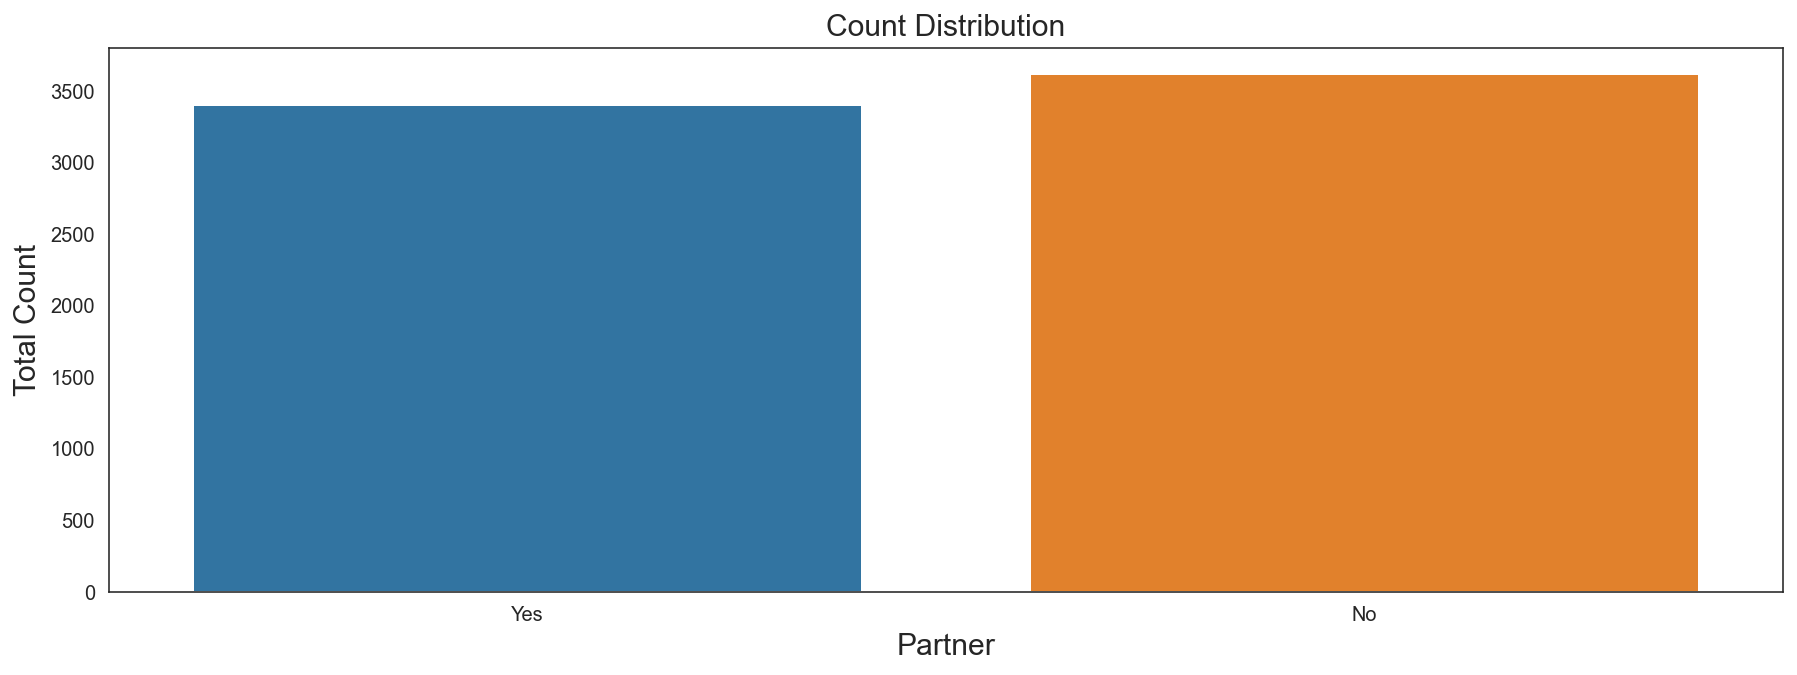

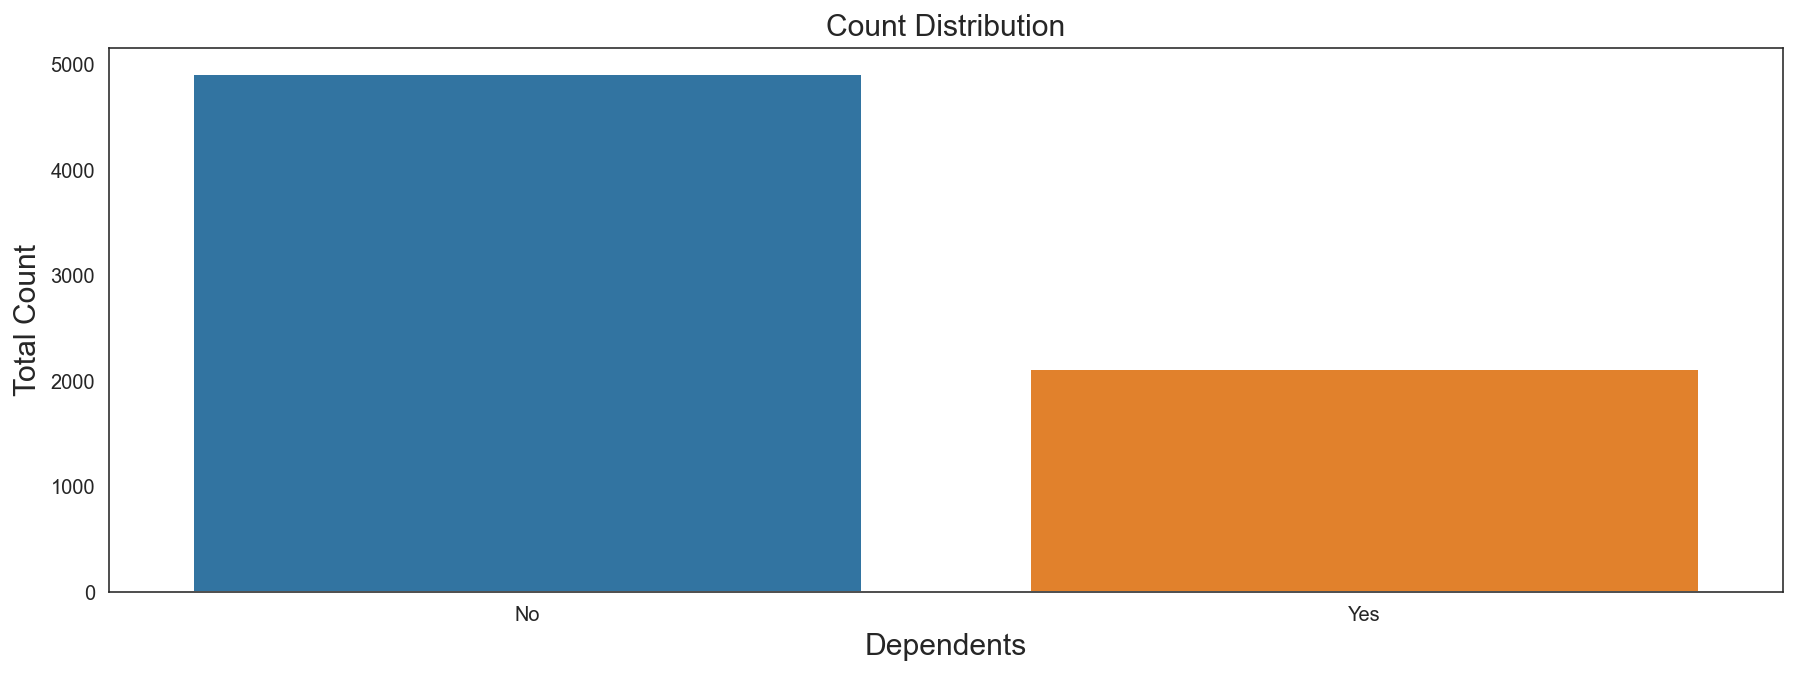

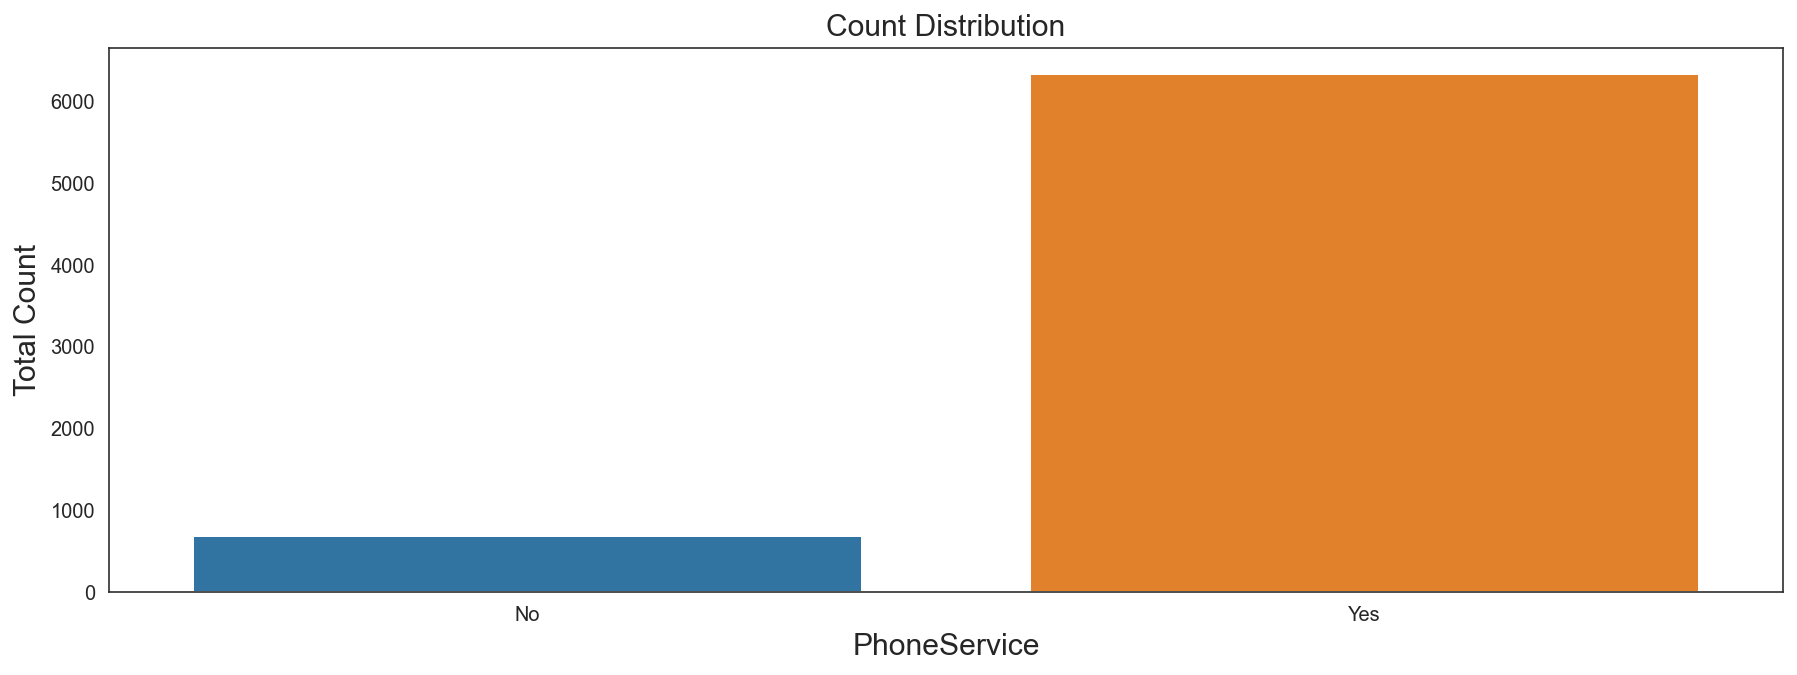

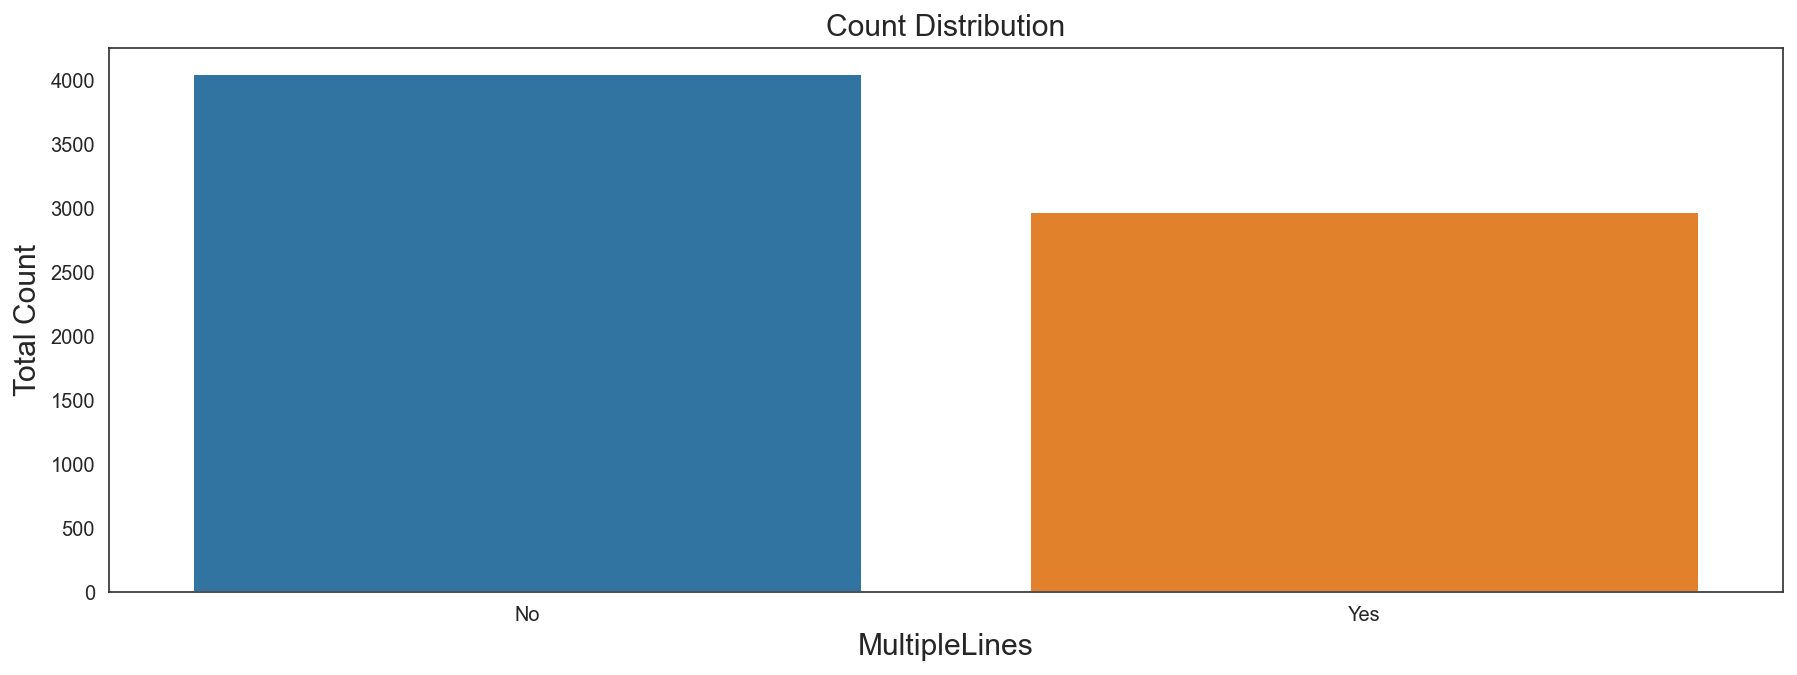

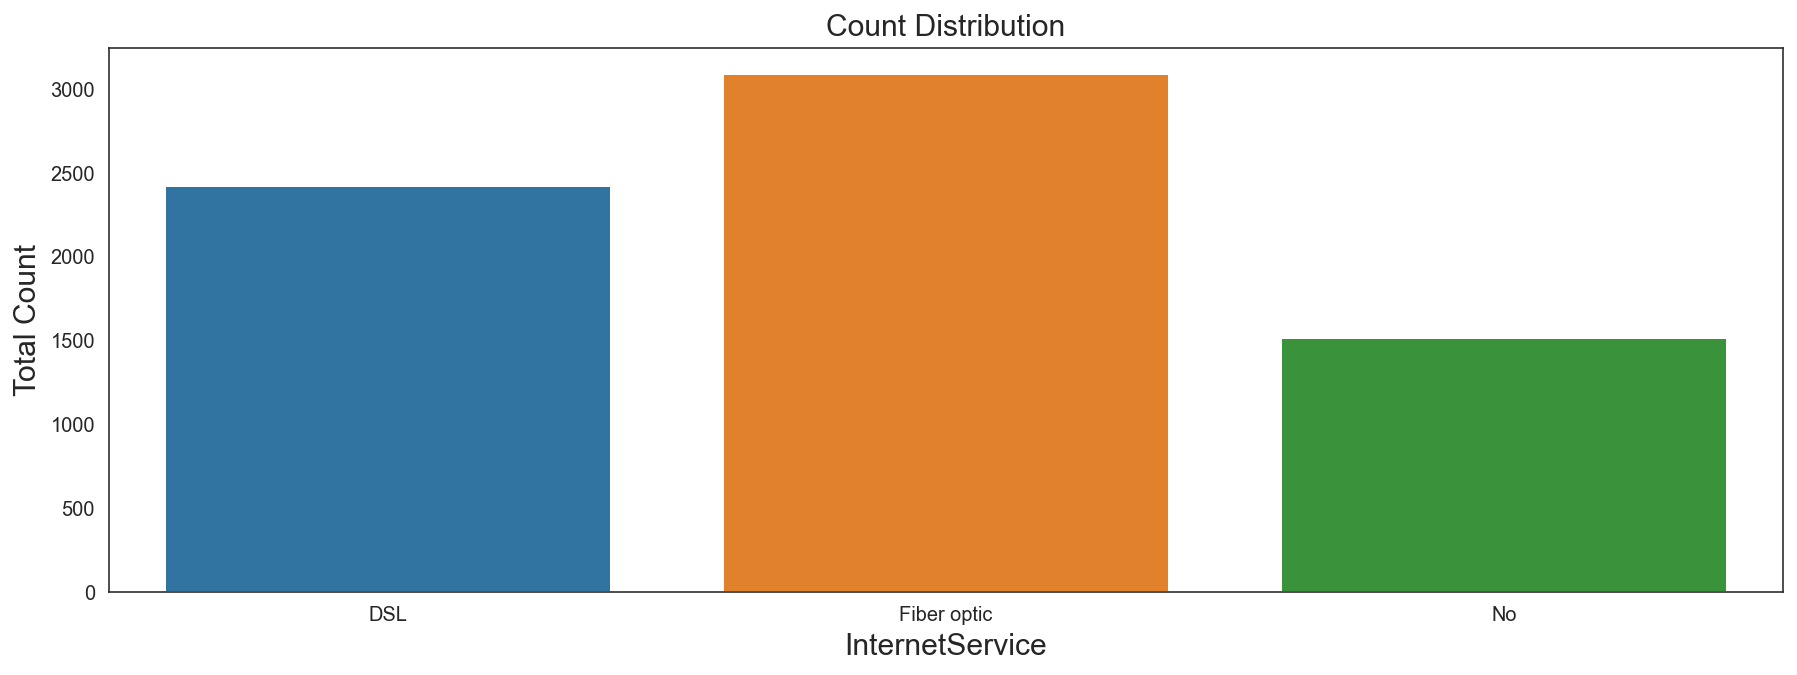

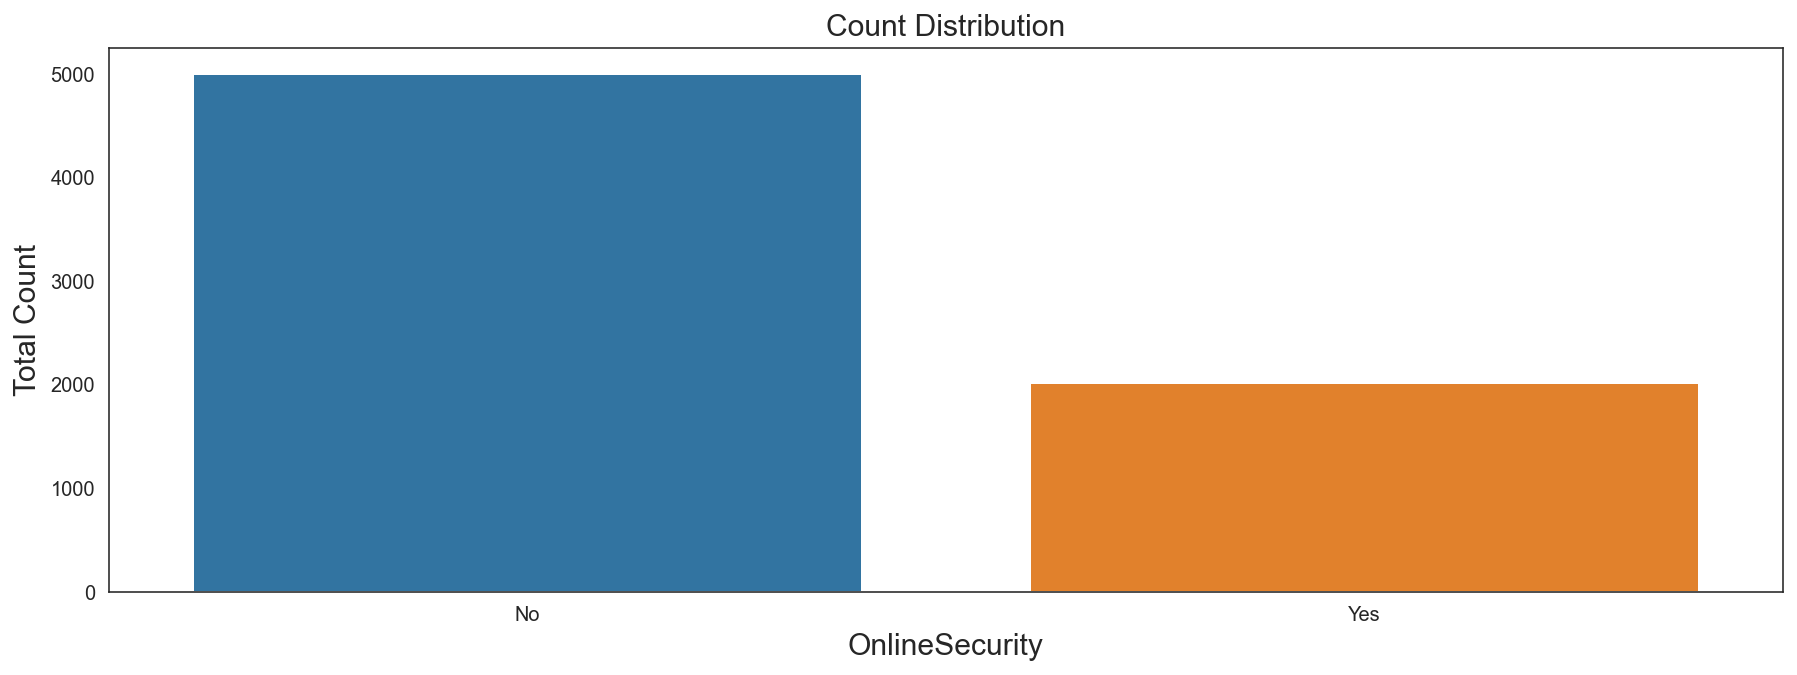

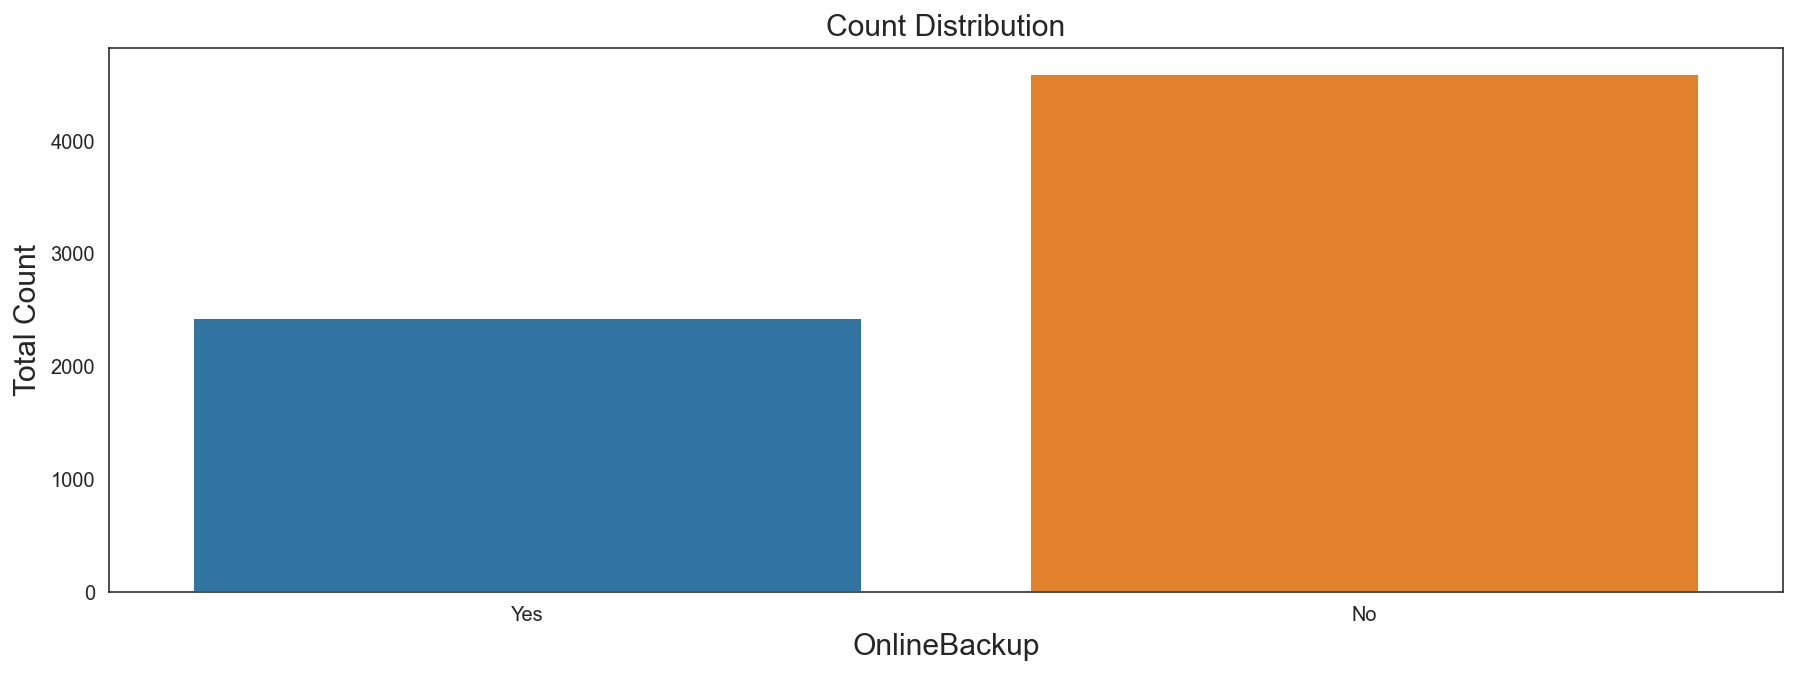

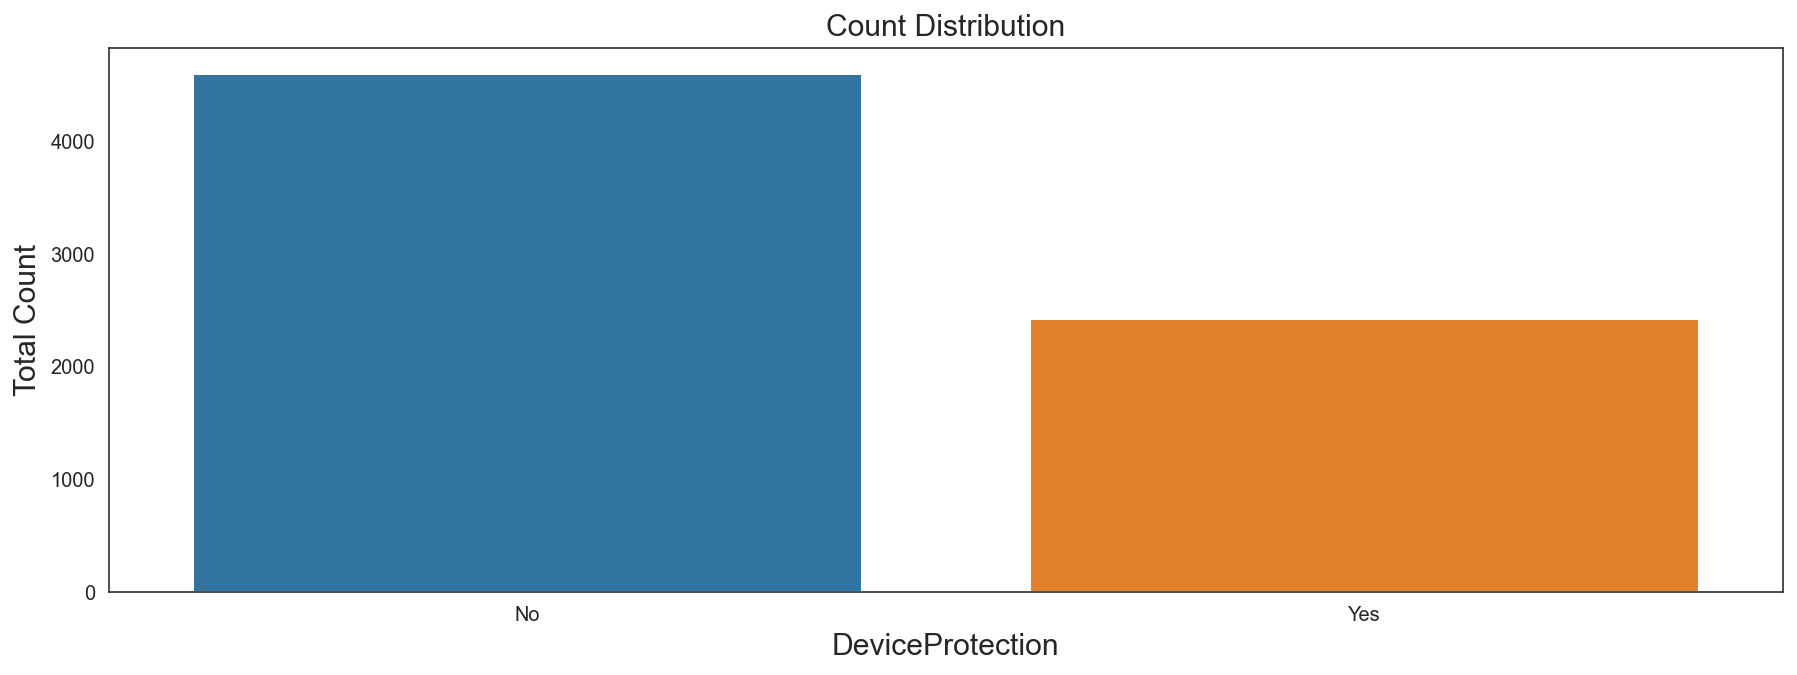

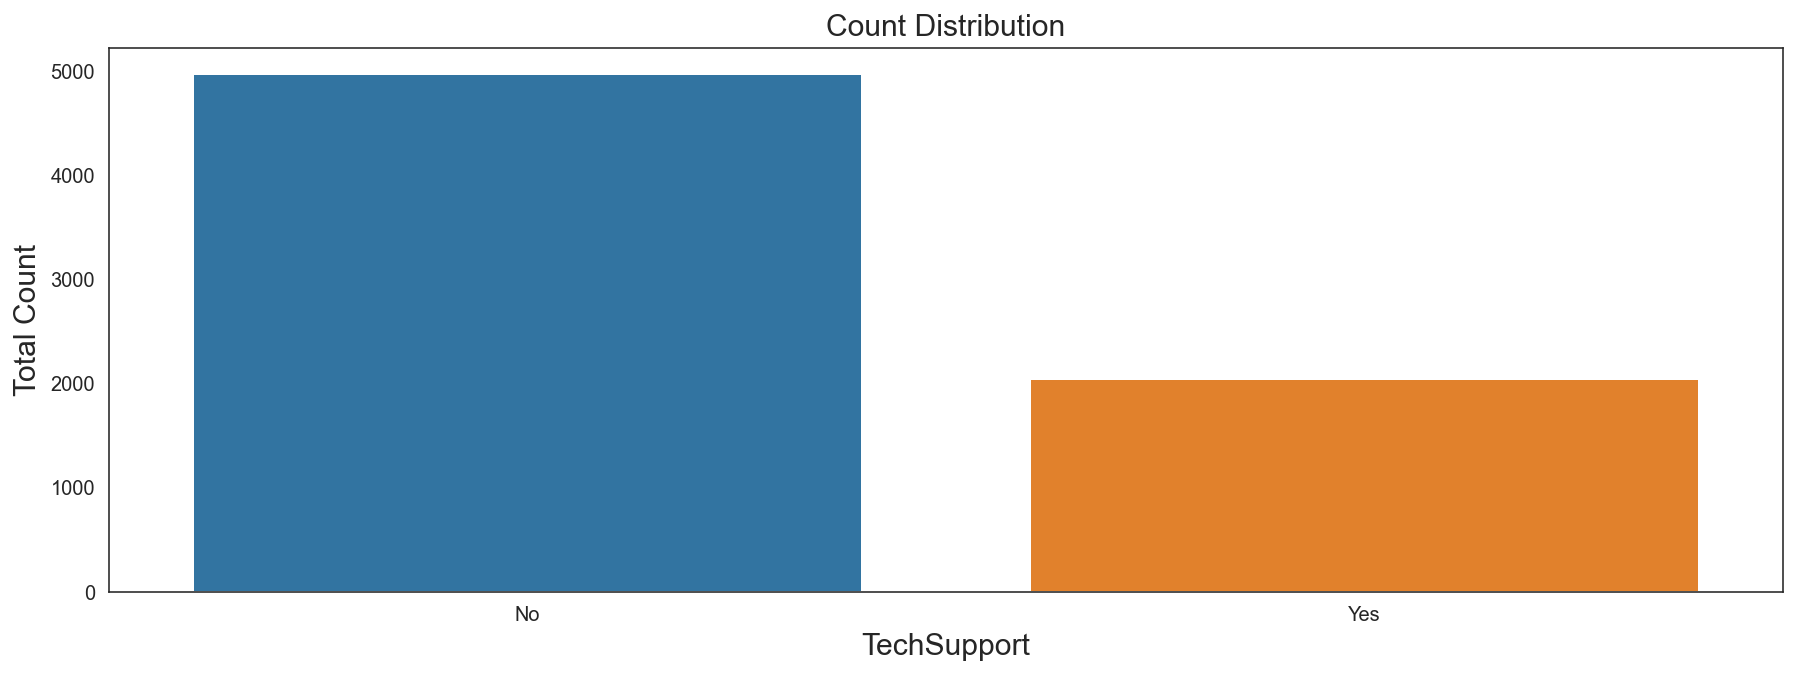

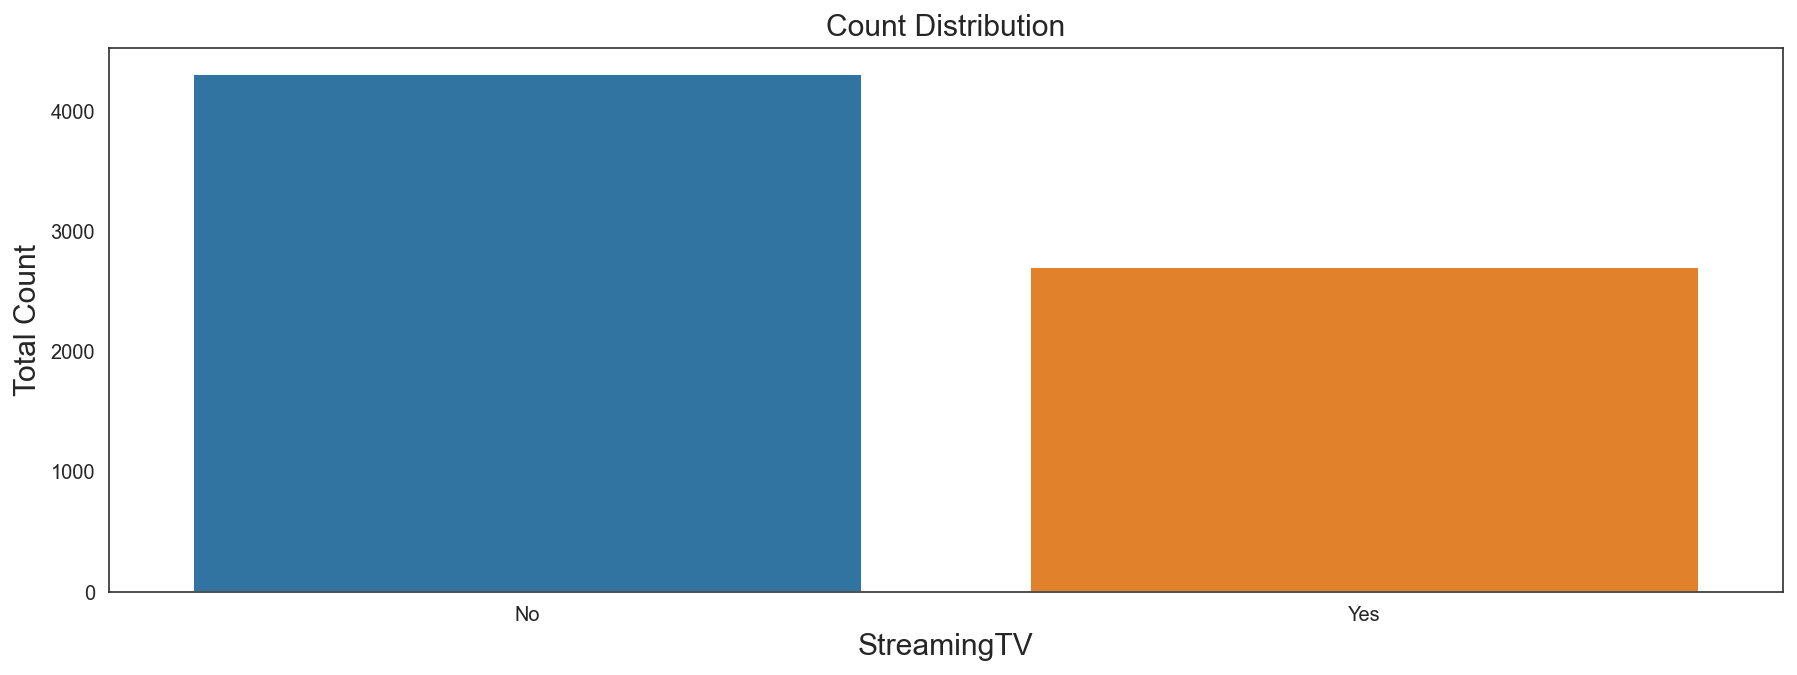

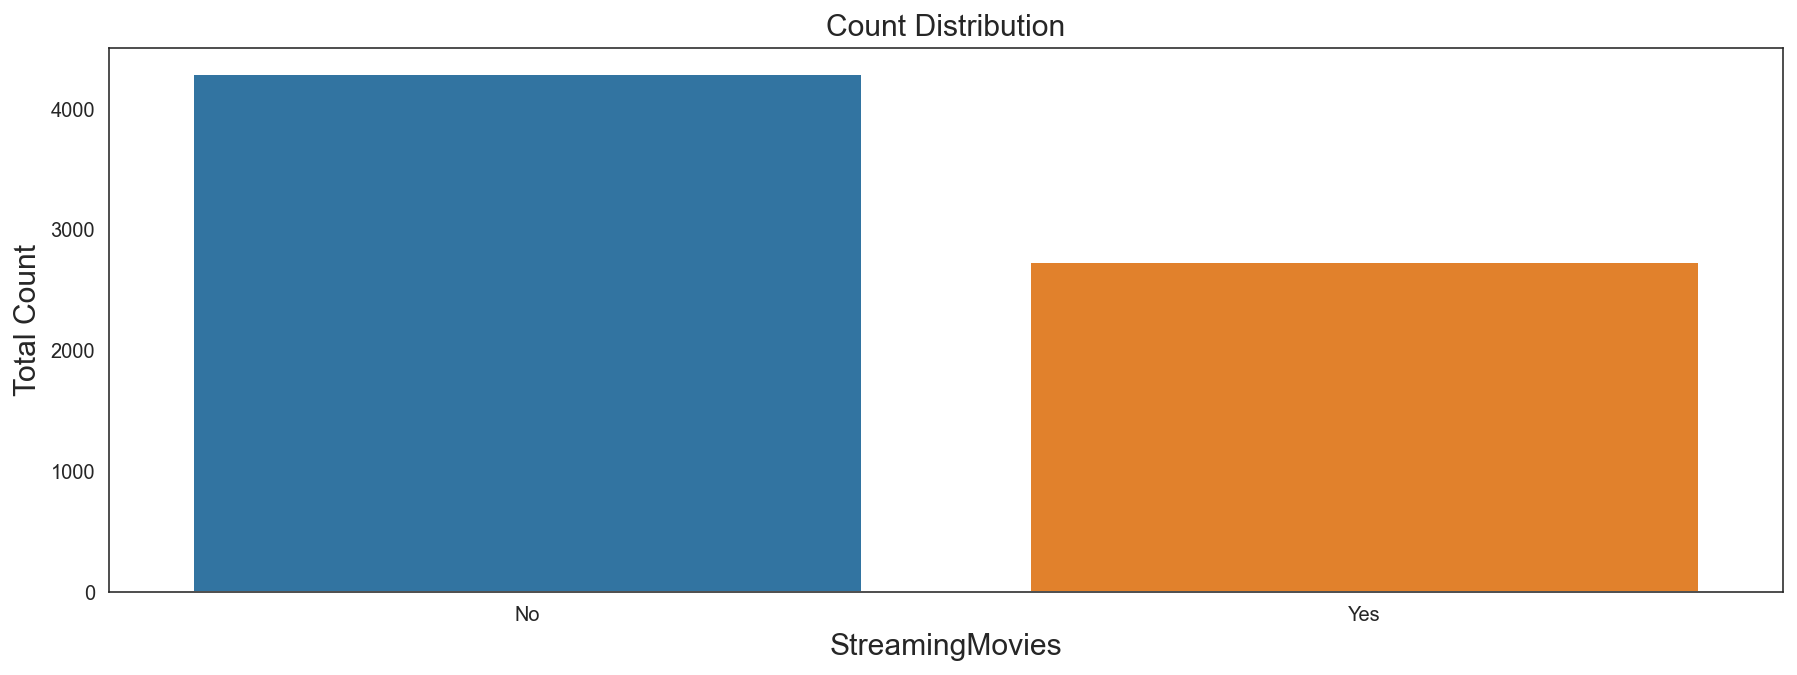

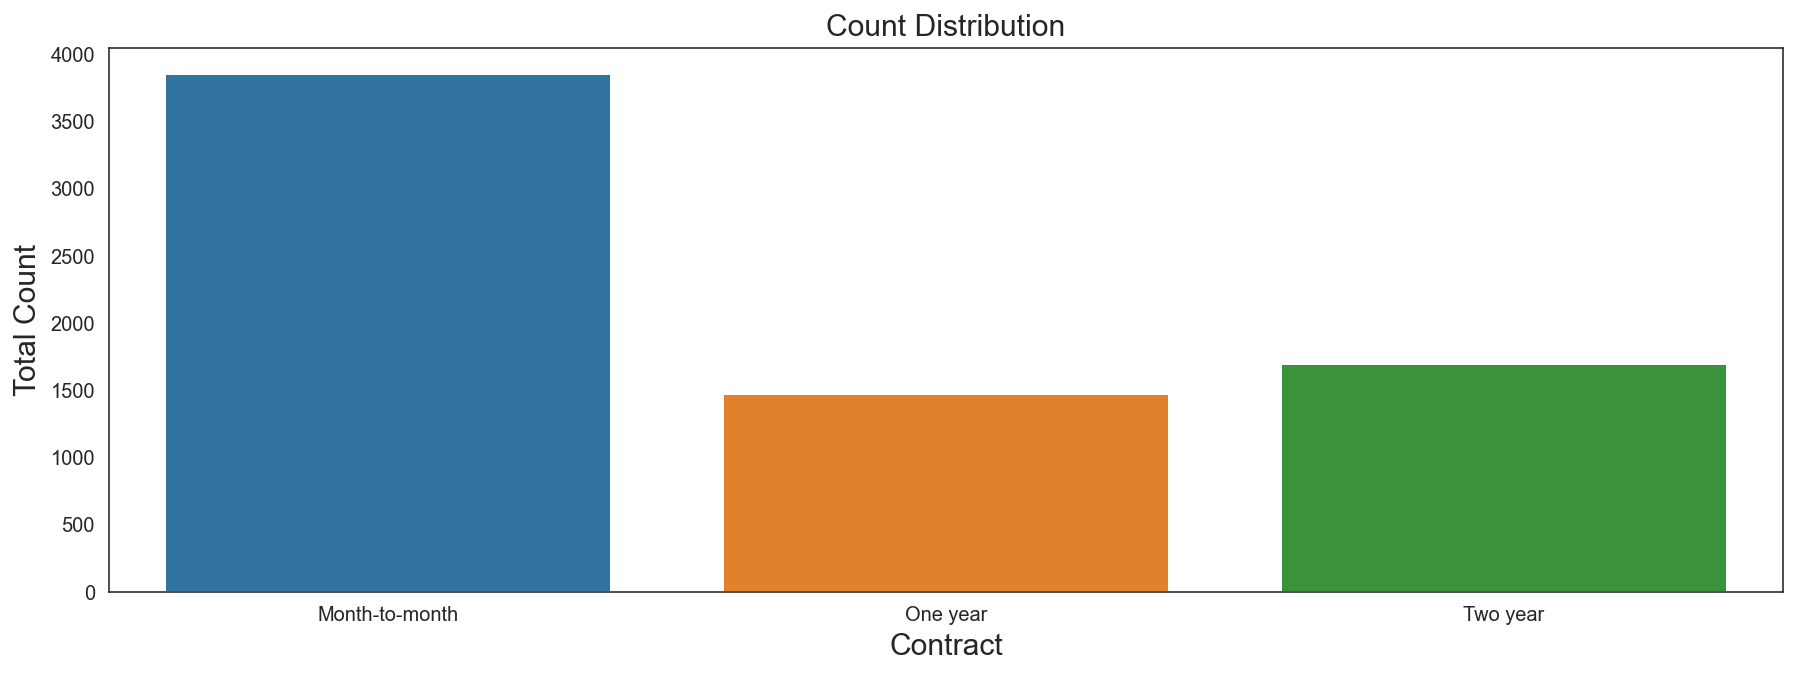

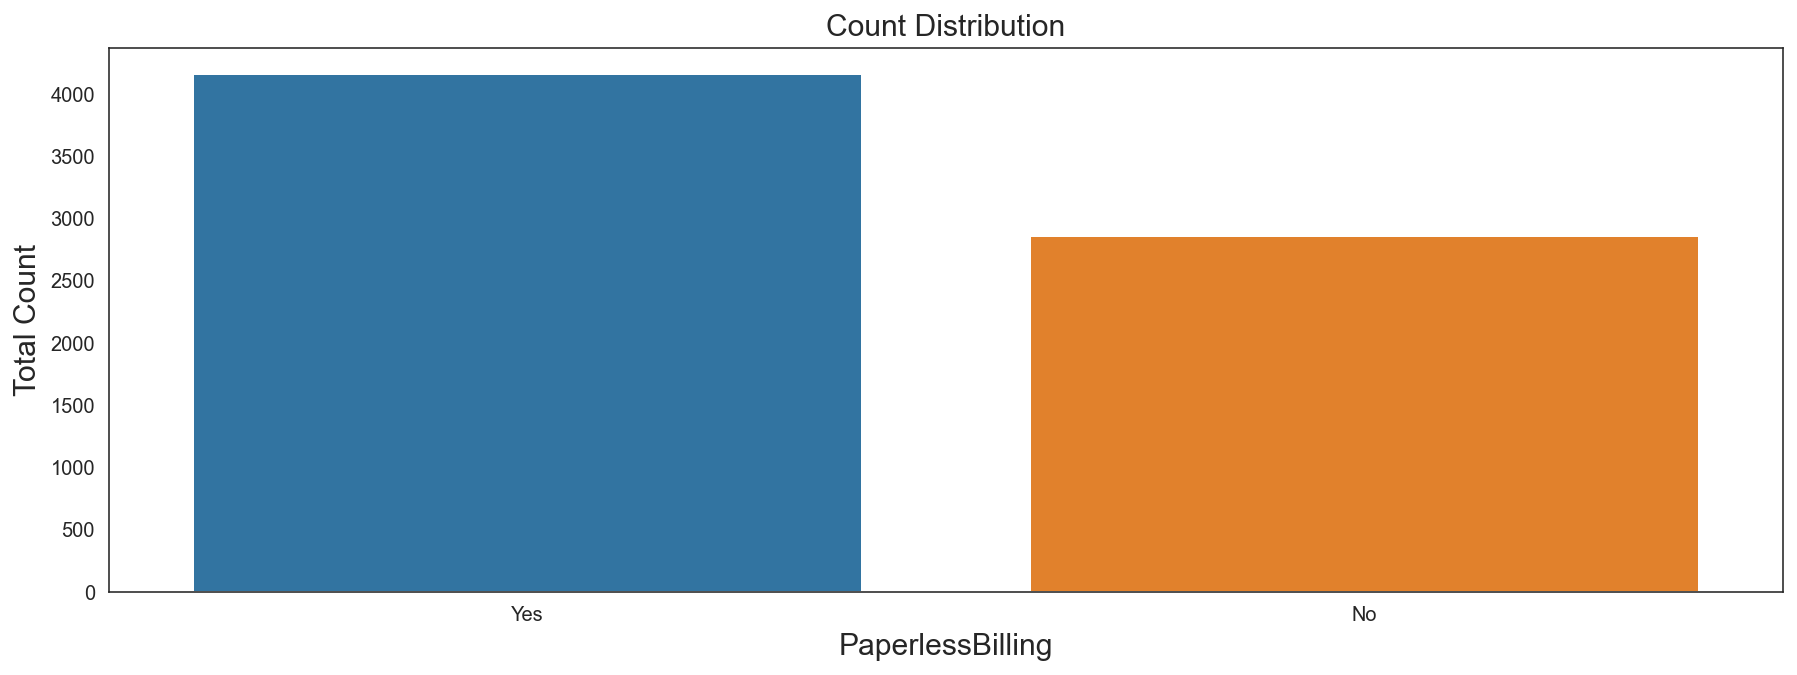

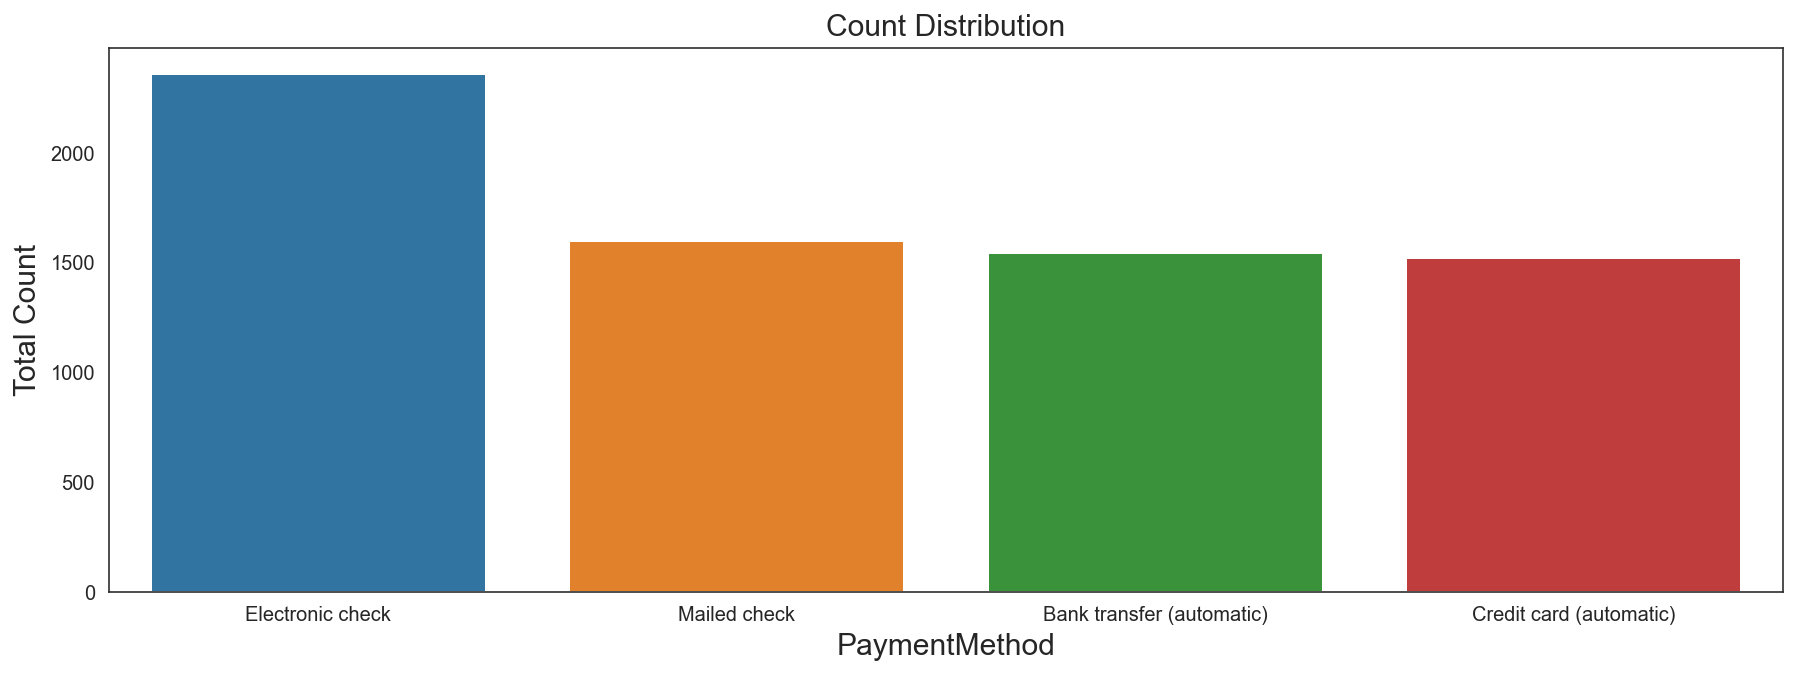

In [64]:
for feature in cat:
    plt.figure(figsize=(15, 5))
    sns.countplot(data=df, x=df[feature])
    plt.title('Count Distribution', size=15)
    plt.xlabel((feature), size=15)
    plt.ylabel('Total Count', size=15)

#### vs. Target Feature

In [65]:
df.groupby('Churn')[cat].describe()

gender                      Partner                   Dependents         \
       count unique     top  freq   count unique  top  freq      count unique   
Churn                                                                           
0       5164      2    Male  2618    5164      2  Yes  2733       5164      2   
1       1857      2  Female   934    1857      2   No  1188       1857      2   

                PhoneService                   MultipleLines                   \
      top  freq        count unique  top  freq         count unique top  freq   
Churn                                                                           
0      No  3380         5164      2  Yes  4652          5164      2  No  3043   
1      No  1531         1857      2  Yes  1687          1857      2  No  1007   

      InternetService                           OnlineSecurity             \
                count unique          top  freq          count unique top   
Churn                                                                       
0                5164      3          DSL  1962           5164      2  No   
1                1857      3  Fiber optic  1291           1857      2  No   

            OnlineBackup                  DeviceProtection                   \
       freq        count unique top  freq            count unique top  freq   
Churn                                                                         
0      3440         5164      2  No  3258             5164      2  No  3287   
1      1562         1857      2  No  1334             1857      2  No  1312   

      TechSupport                  StreamingTV                   \
            count unique top  freq       count unique top  freq   
Churn                                                             
0            5164      2  No  3430        5164      2  No  3271   
1            1857      2  No  1547        1857      2  No  1043   

      StreamingMovies                  Contract                               \
                count unique top  freq    count unique             top  freq   
Churn                                                                          
0                5164      2  No  3250     5164      3  Month-to-month  2210   
1                1857      2  No  1039     1857      3  Month-to-month  1643   

      PaperlessBilling                   PaymentMethod         \
                 count unique  top  freq         count unique   
Churn                                                           
0                 5164      2  Yes  2770          5164      4   
1                 1857      2  Yes  1391          1857      4   

                               
                    top  freq  
Churn                          
0      Electronic check  1294  
1      Electronic check  1065

#### Distribution

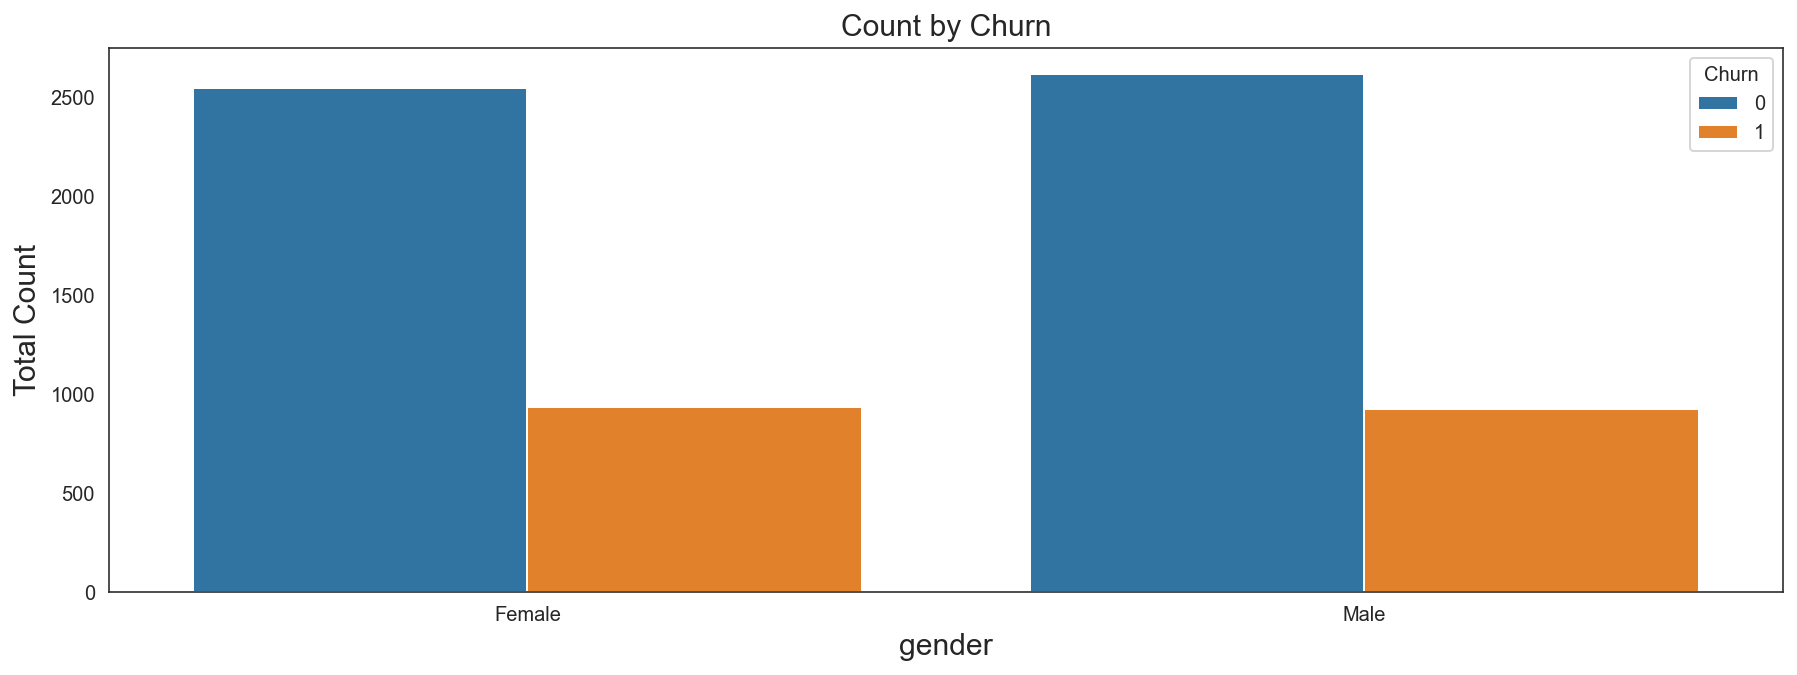

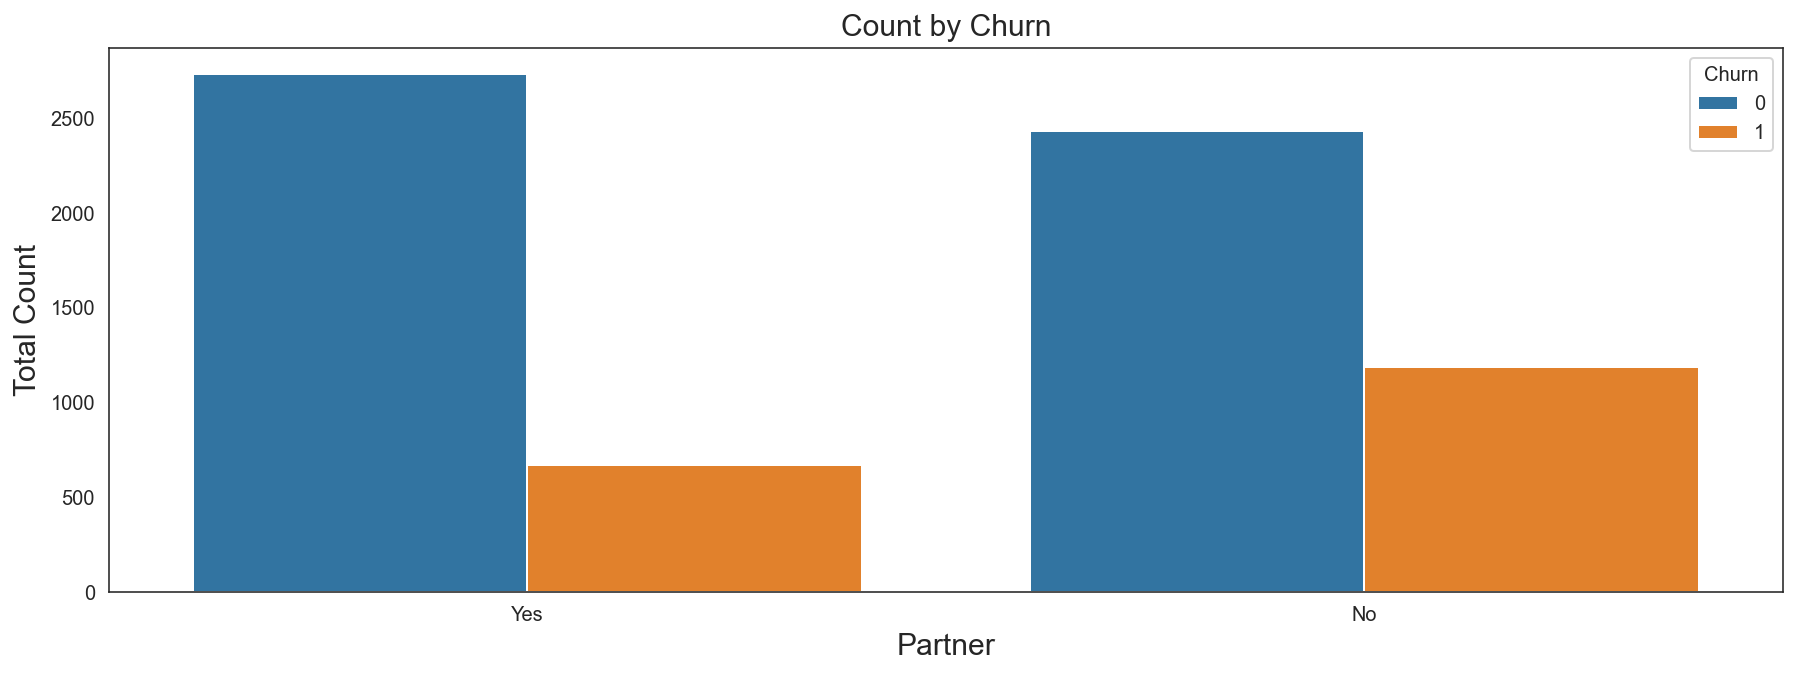

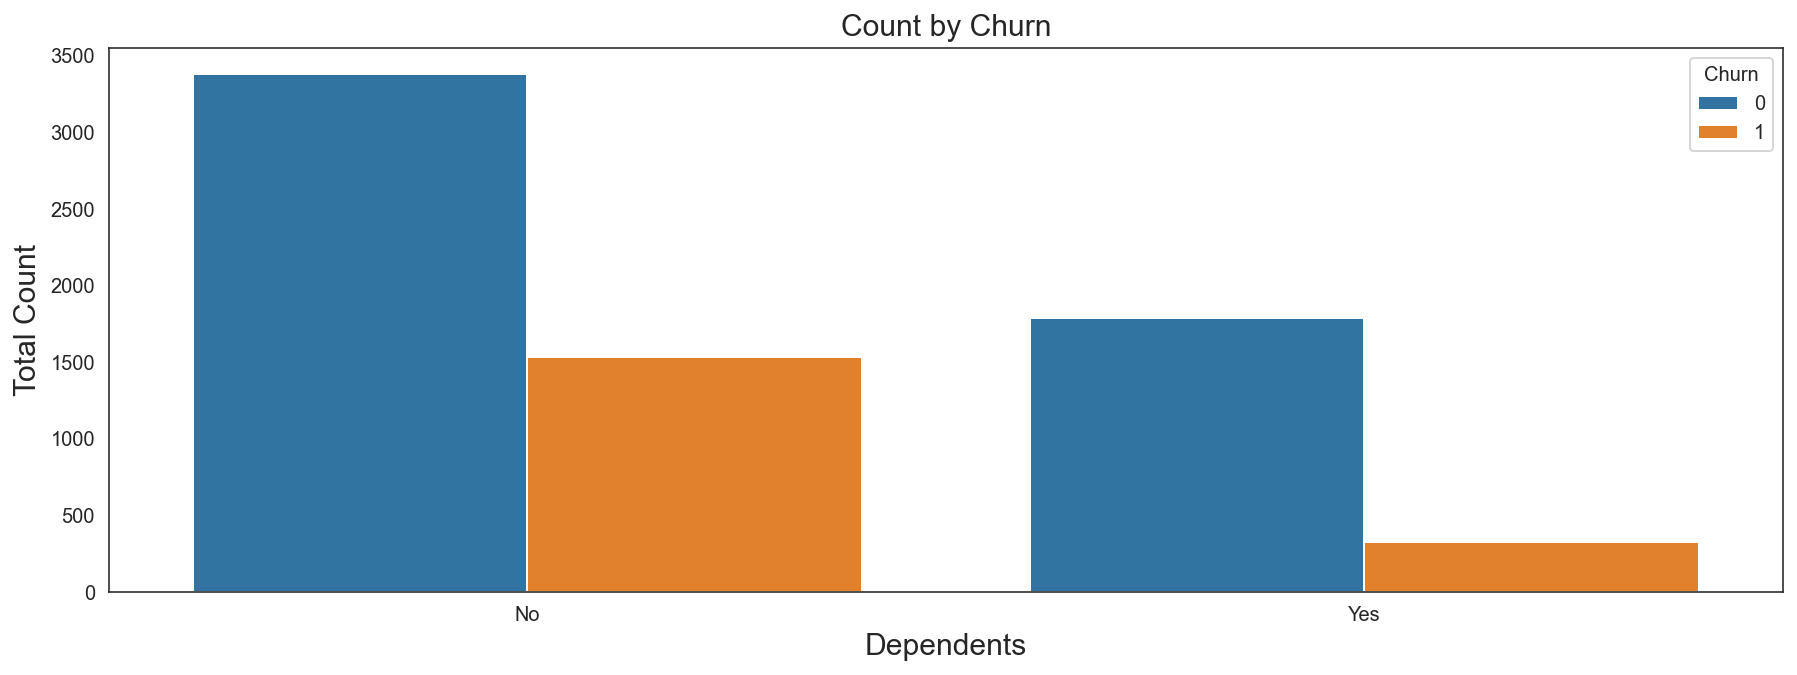

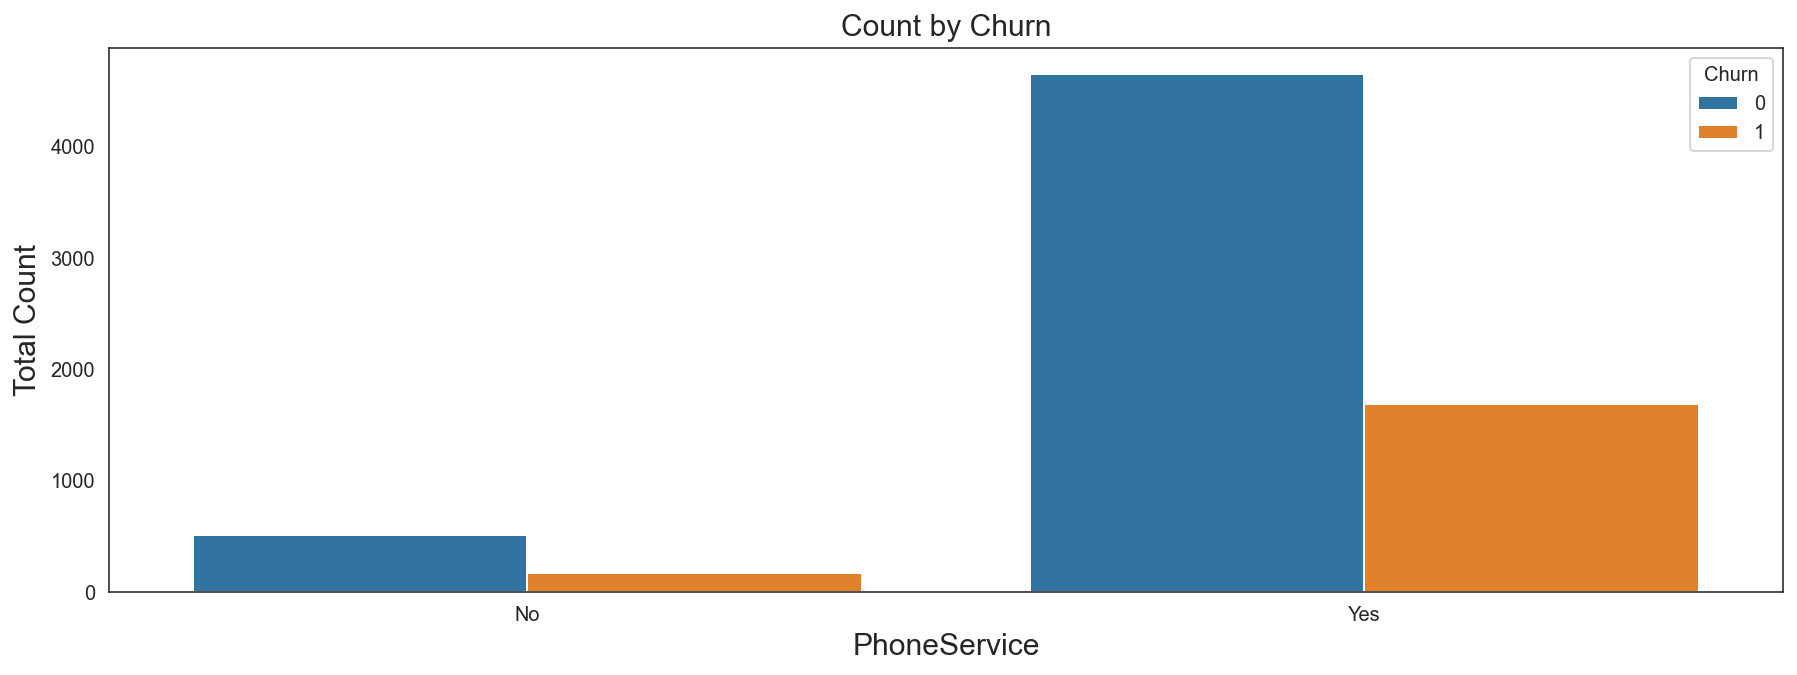

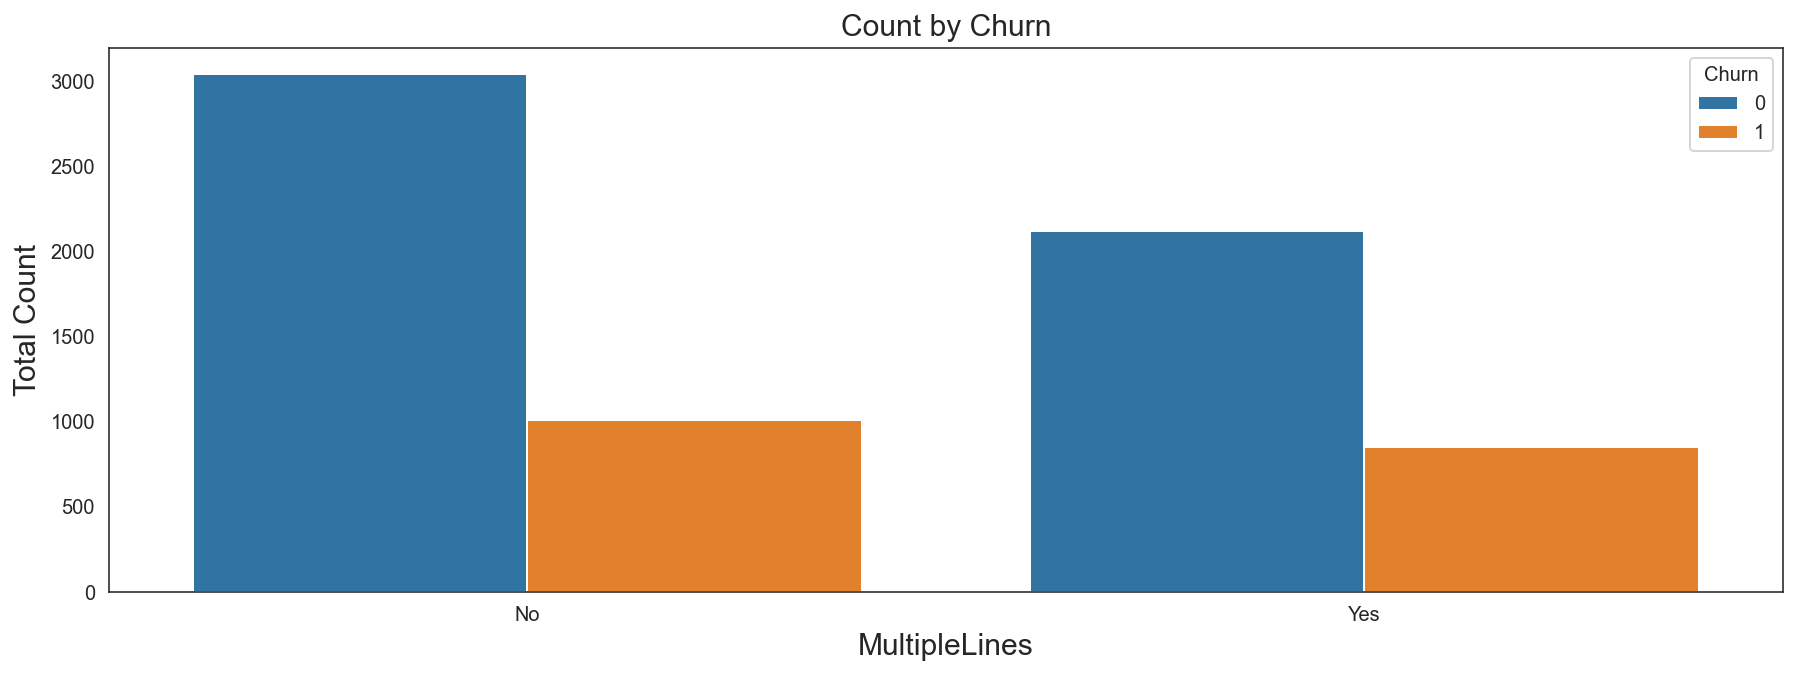

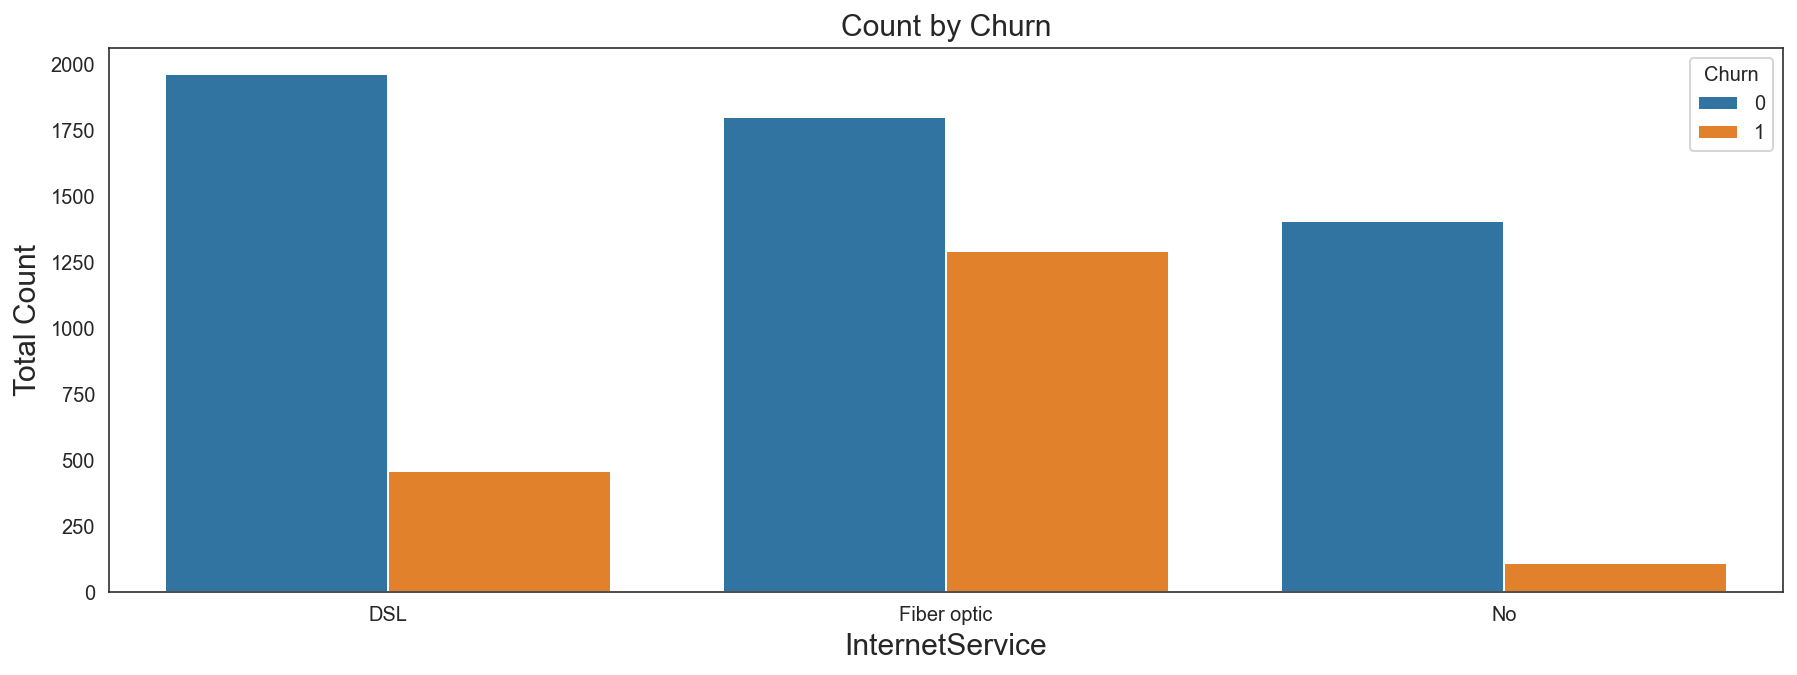

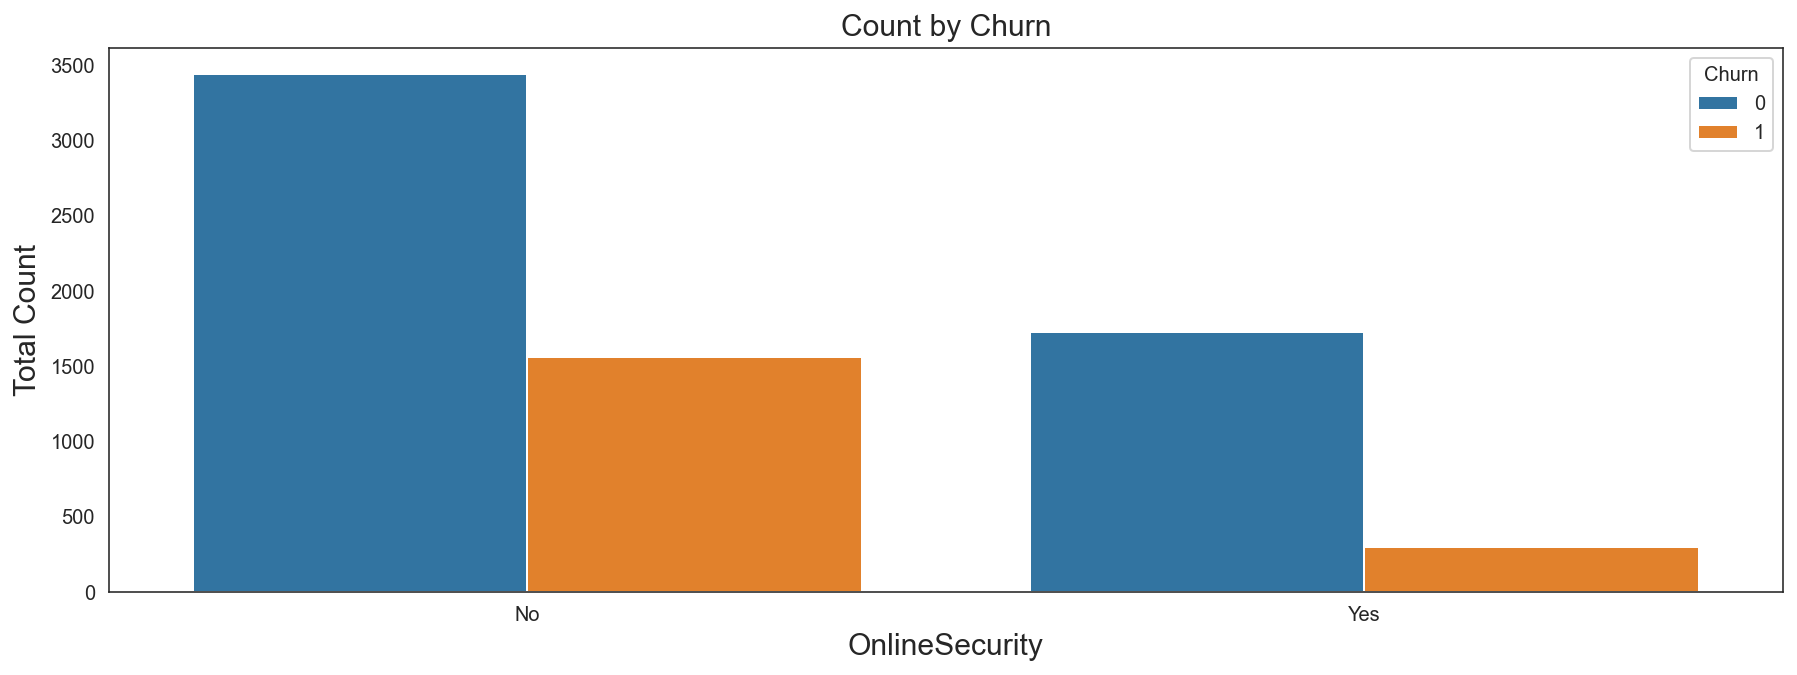

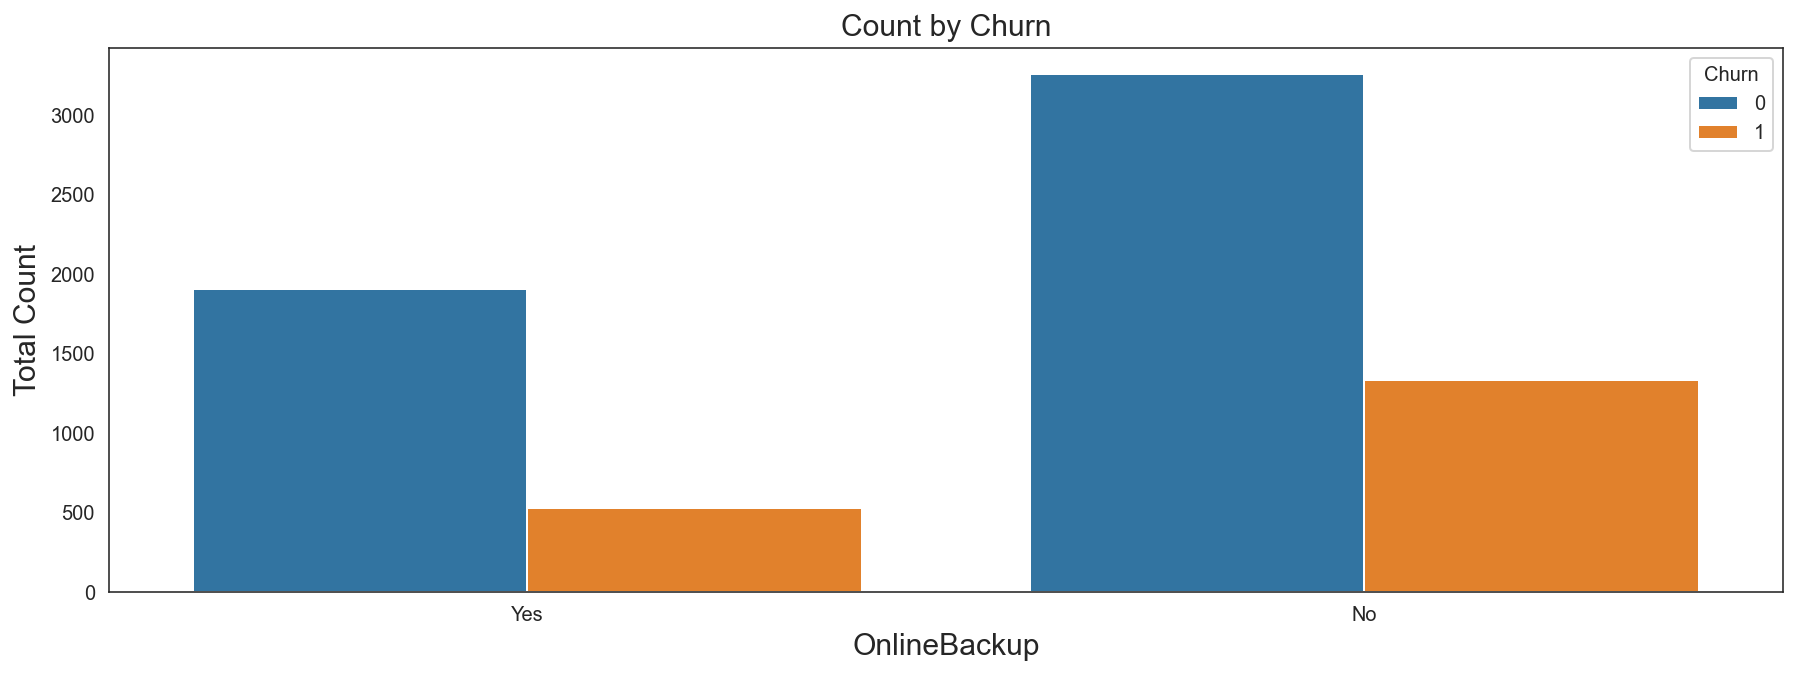

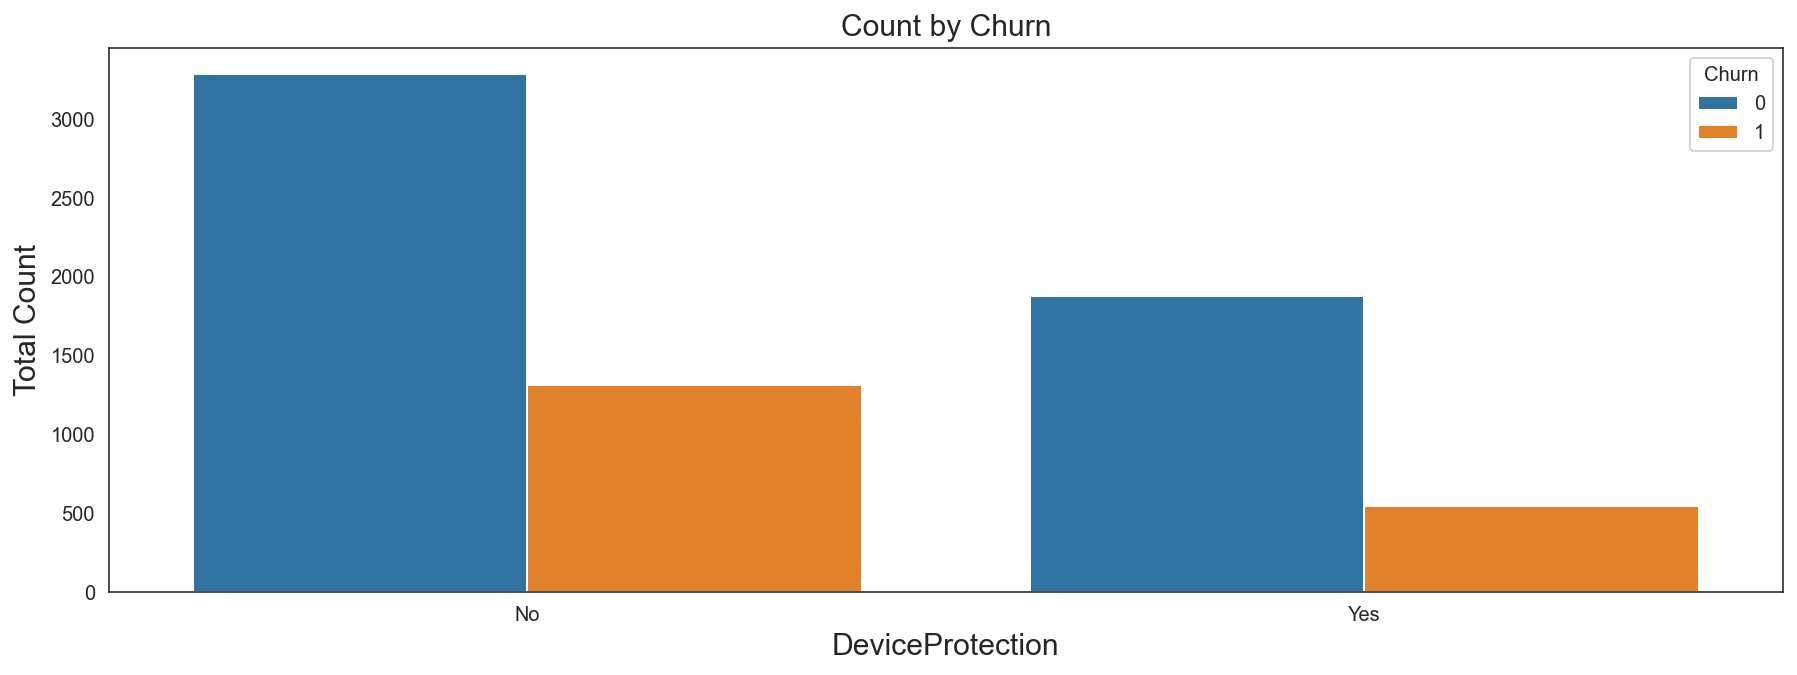

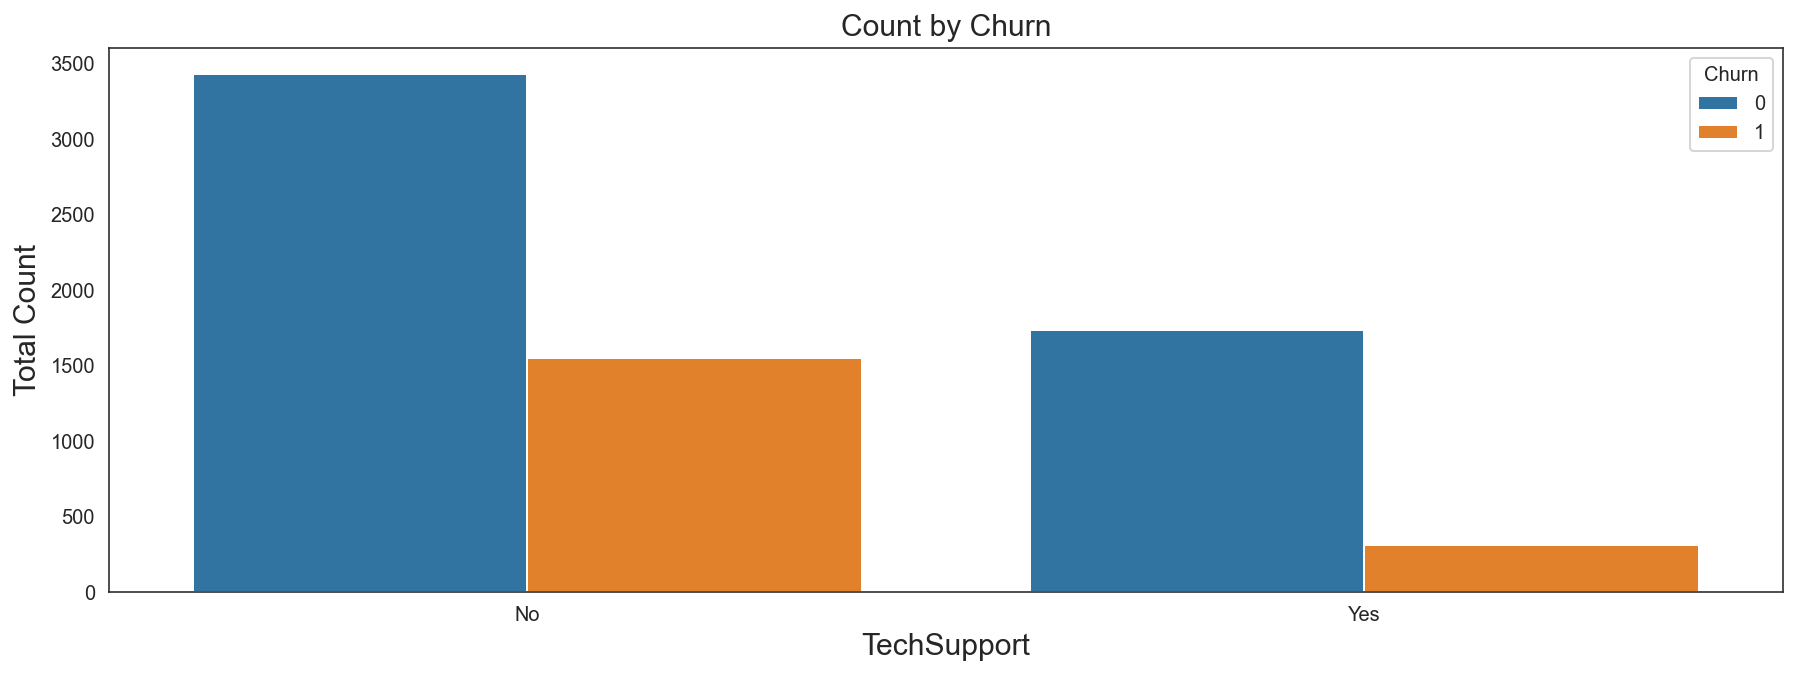

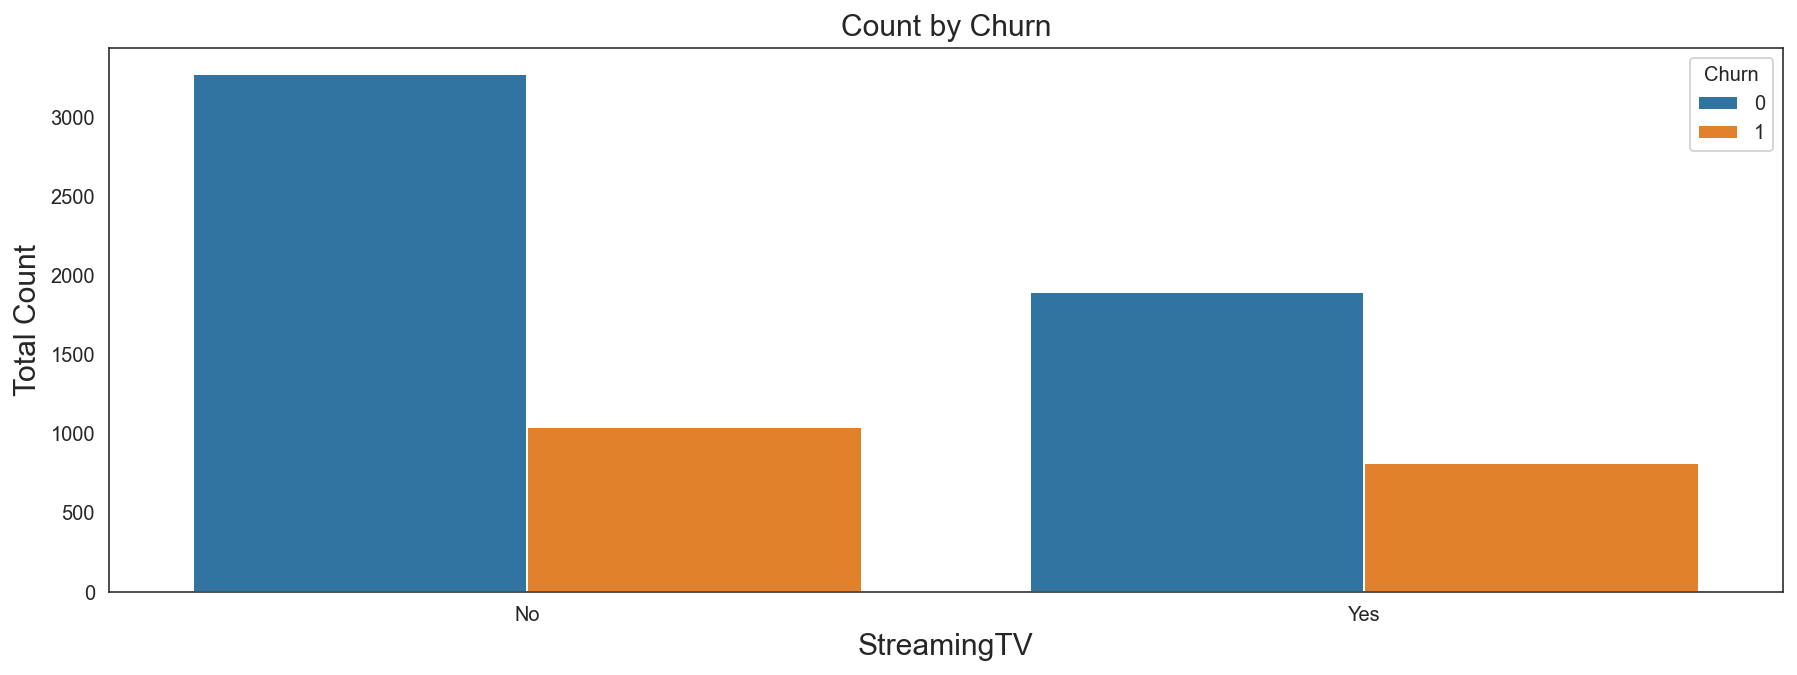

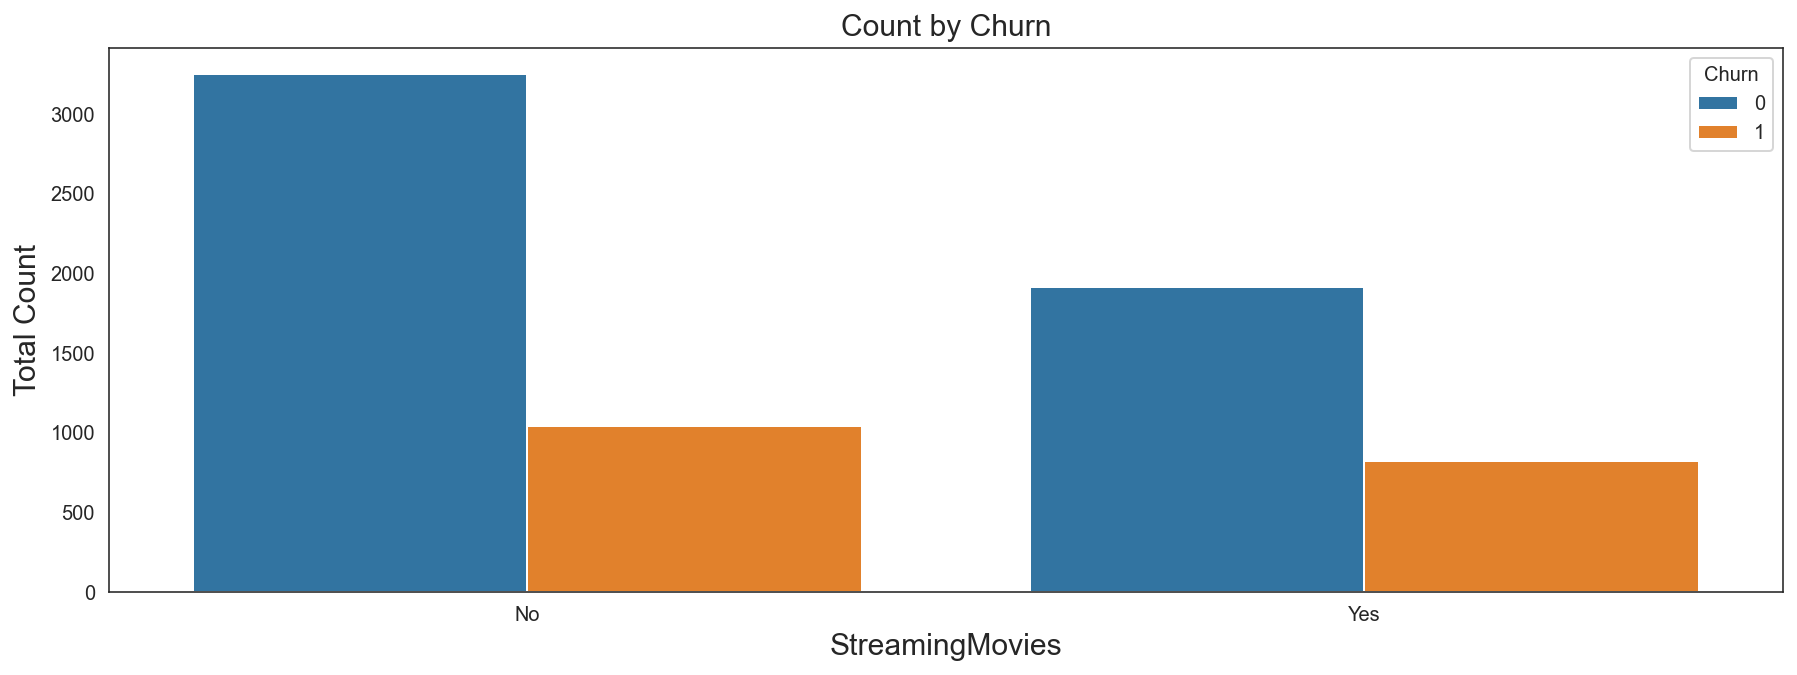

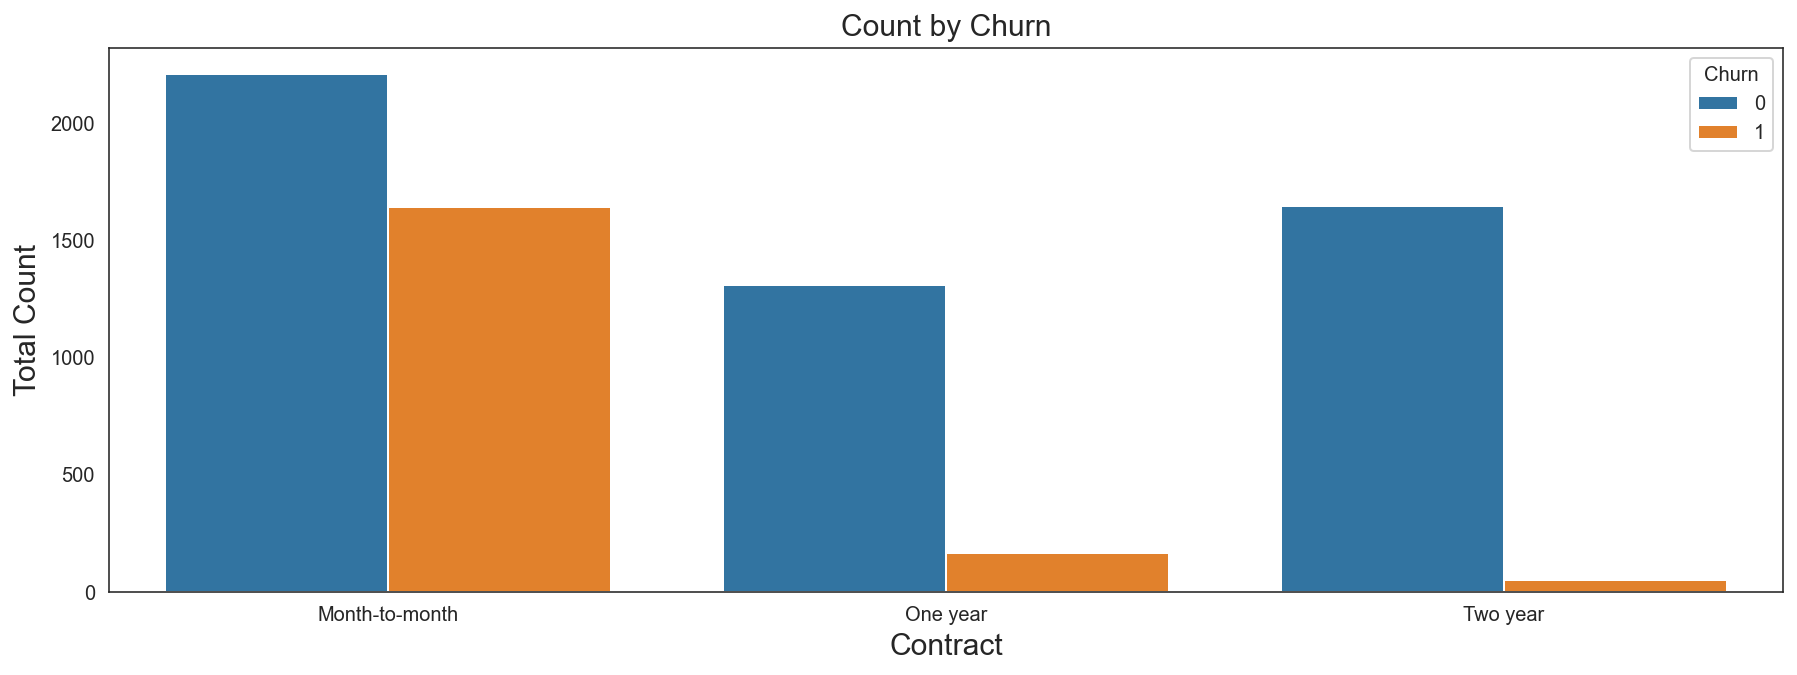

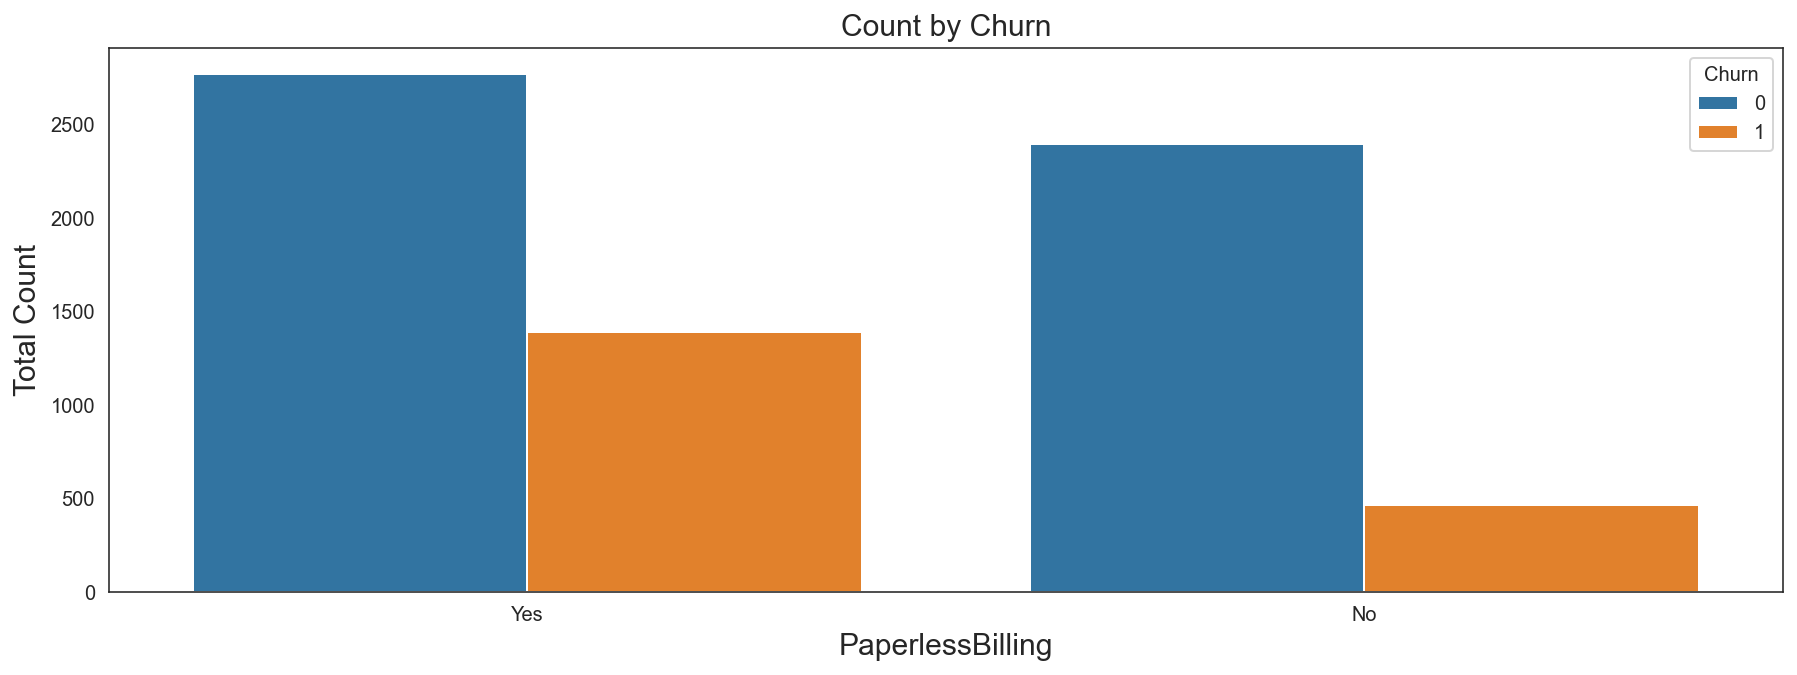

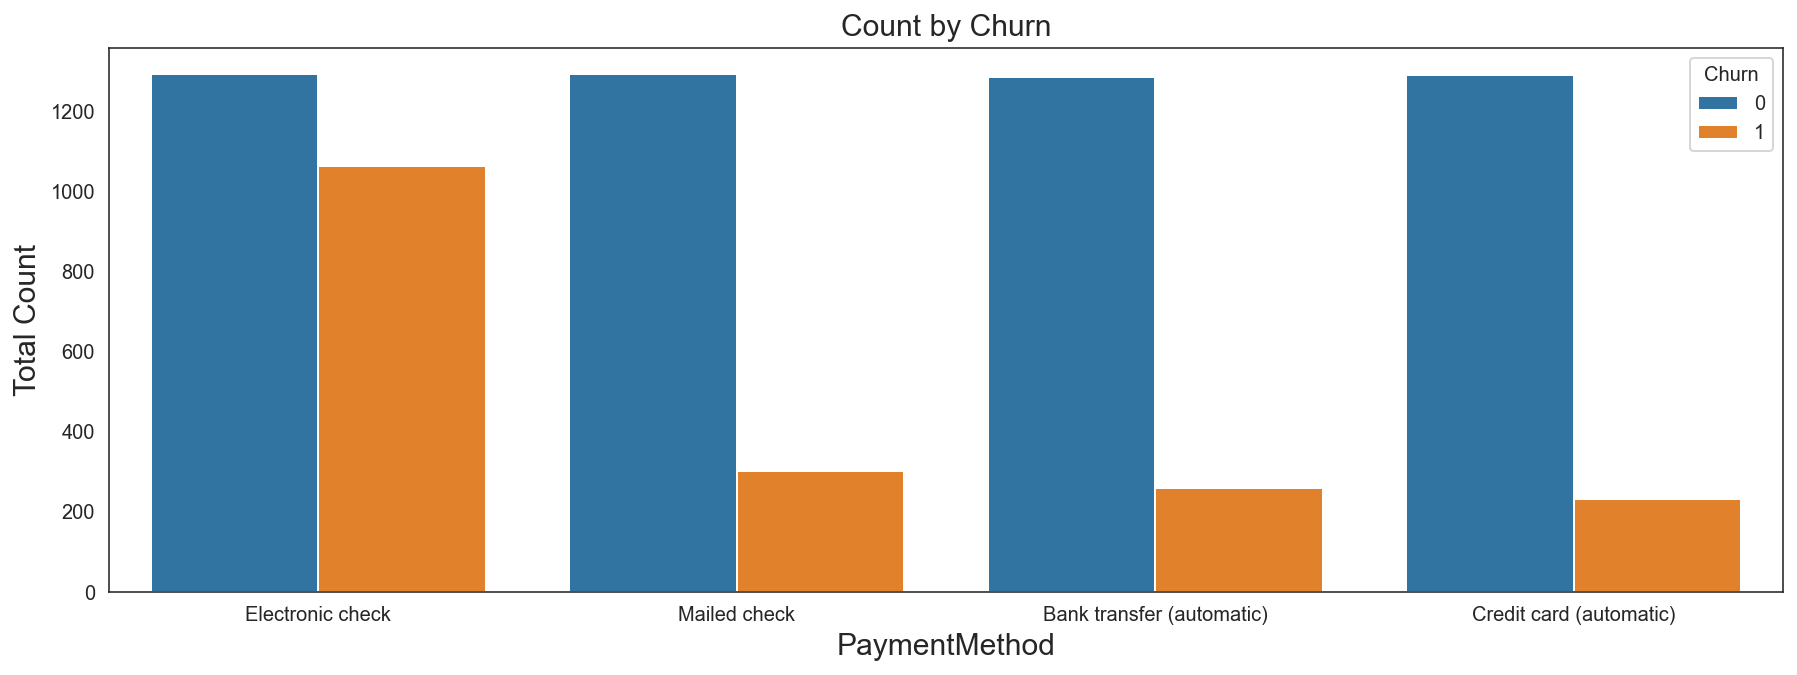

In [66]:
for feature in cat:
    plt.figure(figsize=(15,5))
    sns.countplot(data=df, x=df[feature], hue=df['Churn'])
    plt.title('Count by Churn', size=15)
    plt.xlabel((feature), size=15)
    plt.ylabel('Total Count', size=15)

    - 'gender': Customer gender seems to have little impact on churn. Little difference in noticed.
    - 'Partner': Customers without partners (i.e. single customers) churn more than customers with partners.
    - 'Dependents': Customers without dependents churn more than customers with dependents.
    - 'PhoneService': Customers with phone service churn more than customers without phone service.
    - 'MultipleLine': Customers without multiple lines churn more than customers with multiple lines.
    - 'InternetService': Customers with fibre optic churn more than customers with dsl. Also, customers with 
       internet services churn more than customers without any internet services.
    - 'OnlineSecurity': Customers without online security churn more than customers with online security.
    - 'OnlineBackup': Customers without online backup churn more than customers with online backup. 
    - 'DeviceProtection': Customers without device protection churn more than customers with device protection.
    - 'TechSupport': Customers without tech support churn more than customers with tech support.
    - 'StreamingTV': Customers without streaming TV churn more than customers with streaming TV.
    - 'StreamingMovies': Customers without stream movies churn more than customers with streaming movies.
    - 'Contract': Customers on month-to-month contract churn more than any other customers. Customers on 
       two year contract churn the least.
    - 'PaperlessBilling': Customers with paperless billing churn more than customers without paperless billing.
    - 'PaymentMethod': Customers paying by electronic check churn the most. Interestly, more than half the 
       customers using electronic check churn

#### Relationships

In [67]:
from sklearn.metrics import mutual_info_score

def cat_mut_inf(series):
    return mutual_info_score(series, df['Churn']) 

cat_mut_info = df[cat].apply(cat_mut_inf) 
cat_mut_info = cat_mut_info.sort_values(ascending=False).to_frame(name='Mutual Info Score') 
cat_mut_info

,Mutual Info Score
Contract,0.098301
InternetService,0.055857
PaymentMethod,0.044347
PaperlessBilling,0.019009
OnlineSecurity,0.015747
TechSupport,0.014471
Dependents,0.014326
Partner,0.011249
OnlineBackup,0.003361
DeviceProtection,0.002146


# 3. Data Preparation

### 3.1 Load the libraries

In [68]:
# Preprocessing 
from sklearn.compose import make_column_selector as selector
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures, OrdinalEncoder, LabelEncoder


# Model Evaluation
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, RandomizedSearchCV, cross_val_score

# Metrics
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report, precision_score, recall_score

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier, RandomForestClassifier 
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

### 3.2 Check Version History

In [69]:
print('Package Versions:\n')
%watermark -iv

Package Versions:

seaborn   : 0.11.2
scipy     : 1.7.1
numpy     : 1.21.2
matplotlib: 3.4.3
sklearn   : 0.24.2
plotly    : 5.3.1
json      : 2.0.9
pandas    : 1.3.3



In [70]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [71]:
df.shape

(7021, 20)

### 3.3 Split the dataset into train and test set

In [72]:
train, test = train_test_split(df, test_size=.10, random_state=999)
print('The shape of the train set:', train.shape)
print('The shape of the test set:', test.shape)

The shape of the train set: (6318, 20)
The shape of the test set: (703, 20)


    - The train set is what we'll use to train the model.
    - The test set is what we'll use to test the best model.

### 3.4 Partition the train set into features (X) and target (y)

In [73]:
X = train.drop('Churn', axis=1)
y = train['Churn']
print('The shape of X:', X.shape)
print('The shape of y:', y.shape)

The shape of X: (6318, 19)
The shape of y: (6318,)


In [74]:
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
1459,Female,0,No,No,60,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Two year,Yes,Electronic check,99.65,5941.05
5033,Female,0,No,No,1,Yes,No,No,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,19.40,19.40
5940,Male,0,Yes,Yes,56,Yes,No,Fiber optic,No,Yes,Yes,Yes,No,No,One year,Yes,Mailed check,85.85,4793.80
4633,Female,0,Yes,Yes,72,Yes,Yes,No,No,No,No,No,No,No,Two year,Yes,Bank transfer (automatic),24.05,1709.15
4482,Female,0,No,No,7,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,74.90,541.15


In [75]:
y.head()

1459    0
5033    0
5940    0
4633    0
4482    1
Name: Churn, dtype: int64

In [76]:
y.value_counts()

0    4664
1    1654
Name: Churn, dtype: int64

### 3.6 Split the train set into training and testing sets

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=999)

In [78]:
print(X_train.shape, X_test.shape)

(5054, 19) (1264, 19)


In [79]:
print(y_train.shape, y_test.shape)

(5054,) (1264,)


### 3.7 Divide into numerical and categorical features

In [80]:
num_selector = selector(dtype_exclude=object)
num_cols = num_selector(X)

cat_selector = selector(dtype_include=object)
cat_cols = cat_selector(X)

# 4. Modeling

### 4.1 Metric Selection

    - As we saw during EDA, the target feature 'Churn' in the dataset is imbalanced. 
    - Due to the imbalance, we'll use mean CV ROC-AUC metric to evaluate the model.
    - We'll also take a look at the 'classification_report', 'precision' and 'recall' metrics on the test set.

### 4.2 Model Selection

    We will try the following models:
        
        - Linear Models
            1. Logistic Regression
            2. SVM
            3. KNeighbors
       
       - Tree & Ensemble Models
            1. Decision Tree
            2. AdaBoost
            3. ExtrasTrees
            4. Random Forest
            5. Gradient Boosting
            6. History Gradient Boosting
        
        - XBoost
            1. XBClassifer

### Linear Models

In [81]:
%%time

# Define data preprocessing tools
imp_mean = SimpleImputer(strategy='constant', fill_value=0, add_indicator=True)
scl = StandardScaler()
ohe = OneHotEncoder(handle_unknown='ignore')

# Define cat and num preprocessing
num_preprocessor = Pipeline([
    ('impute', imp_mean),
    ('scale', scl)
])

cat_preprocessor = ohe

# Combine num and cat preprocessing
ct = ColumnTransformer([
    ('numerical', num_preprocessor, num_cols),
    ('categorical', cat_preprocessor, cat_cols)])


# Define Models
linear_models = [LogisticRegression(solver='liblinear', random_state=999),
                 SVC(random_state=999, probability=True),
                 KNeighborsClassifier()]

# Models Evaluation Strategy
skfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=999)
metric = 'roc_auc'

scores = []
model_name = ['LogReg_default', 'SVC_default', 'KNeighbors_default']

for model in linear_models:
    # Define model pipeline
    pipe = Pipeline([('preprocessing', ct), ('model', model)])
    
    # CV model pipeline
    cv_scores = cross_val_score(pipe, X=X_train, y=y_train, 
                                scoring=metric, cv=skfold, n_jobs=-1, error_score='raise').mean() 
    # Fit model pipeline
    pipe.fit(X_train, y_train)
    
    # Predict model pipeline
    y_predprob = pipe.predict_proba(X_test)[:,1]
    
    # Append model scores
    scores.append(({
        'Test ROC-AUC': round(roc_auc_score(y_test, y_predprob) * 100, 2),
        'CV ROC-AUC': round(cv_scores * 100, 2),
    })) 

CPU times: user 6.93 s, sys: 319 ms, total: 7.25 s
Wall time: 27.1 s


In [82]:
linear_models_results = pd.DataFrame(data=scores, columns=['Test ROC-AUC', 'CV ROC-AUC'], index=model_name)
linear_models_results.sort_values(by=['CV ROC-AUC'], ascending=False, inplace=True)
linear_models_results

,Test ROC-AUC,CV ROC-AUC
LogReg_default,84.18,84.38
SVC_default,79.72,80.50
KNeighbors_default,77.30,77.77


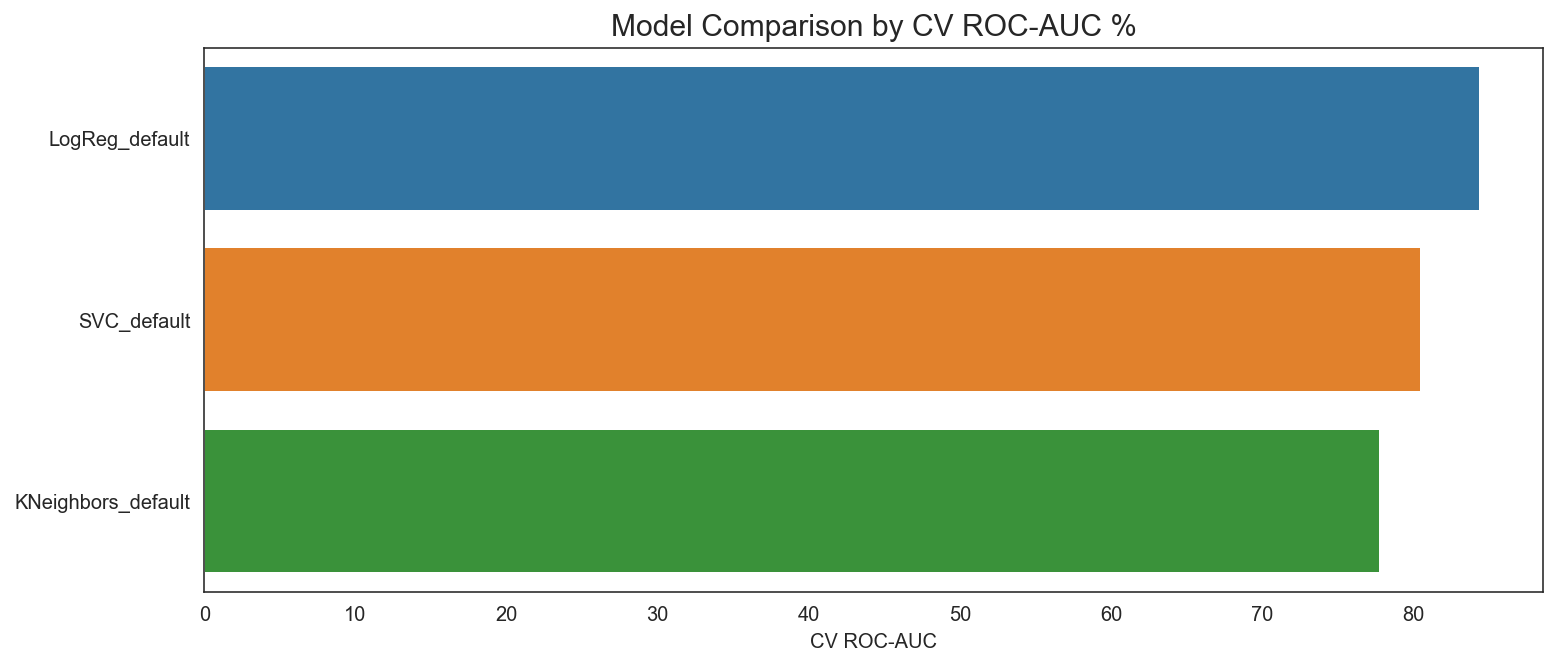

In [83]:
plt.figure(figsize=(12, 5))
plt.title('Model Comparison by CV ROC-AUC %', size=15)
sns.barplot(data=linear_models_results, x='CV ROC-AUC', y=linear_models_results.index);

    - The results suggest that of the linear models, logistic regression achieves the best mean CV ROC-AUC score 
      of 84.38% when compared to SVC and KNeighbors, 80.50% and 77.77% respectively.

### Tree and Ensemble Models

In [84]:
%%time

# Define data preprocessing tools
imp_mean = SimpleImputer(strategy='constant', fill_value=0)
oe = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)

# Define cat and num preprocessing
num_preprocessor = imp_mean
cat_preprocessor = oe

# Combine num and cat preprocessing
ct = ColumnTransformer([
    ('numerical', num_preprocessor, num_cols),
    ('categorical', cat_preprocessor, cat_cols)])


# Define Models
models = [DecisionTreeClassifier(random_state=999),
          AdaBoostClassifier(random_state=999),
          ExtraTreesClassifier(random_state=999),
          RandomForestClassifier(random_state=999),
          GradientBoostingClassifier(random_state=999),
          HistGradientBoostingClassifier(random_state=999)]

# Models Evaluation Strategy
skfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=999)
metric = 'roc_auc'

scores = []
model_name = ['DecisionTree_default', 'AdaBoost_default', 'ExtraTree_default', 
              'RandomForest_default', 'GradientBoosting_default', 'HistGradientBoosting_default']

for model in models:
    # Define model pipeline
    pipe = Pipeline([('preprocessing', ct), ('model', model)])
    
    # CV model pipeline
    cv_scores = cross_val_score(pipe, X=X_train, y=y_train, 
                                scoring=metric, cv=skfold, n_jobs=-1, error_score='raise').mean() 
    # Fit model pipeline
    pipe.fit(X_train, y_train)
    
    # Predict model pipeline
    y_predprob = pipe.predict_proba(X_test)[:,1]
    
    # Append model scores
    scores.append(({
        'Test ROC-AUC': round(roc_auc_score(y_test, y_predprob) * 100, 2),
        'CV ROC-AUC': round(cv_scores * 100, 2)
    })) 

CPU times: user 5.48 s, sys: 164 ms, total: 5.64 s
Wall time: 8.63 s


In [85]:
tree_models_results = pd.DataFrame(data=scores, columns=['Test ROC-AUC', 'CV ROC-AUC'], index=model_name)
tree_models_results.sort_values(by=['CV ROC-AUC'], ascending=False, inplace=True)
tree_models_results

,Test ROC-AUC,CV ROC-AUC
AdaBoost_default,84.17,84.24
GradientBoosting_default,84.57,84.18
HistGradientBoosting_default,82.54,82.88
RandomForest_default,81.16,82.73
ExtraTree_default,77.56,80.50
DecisionTree_default,66.69,65.49


In [86]:
model_results = pd.concat([linear_models_results, tree_models_results], axis=0)
model_results.sort_values(by=['CV ROC-AUC'], ascending=False, inplace=True)
model_results

,Test ROC-AUC,CV ROC-AUC
LogReg_default,84.18,84.38
AdaBoost_default,84.17,84.24
GradientBoosting_default,84.57,84.18
HistGradientBoosting_default,82.54,82.88
RandomForest_default,81.16,82.73
SVC_default,79.72,80.50
ExtraTree_default,77.56,80.50
KNeighbors_default,77.30,77.77
DecisionTree_default,66.69,65.49


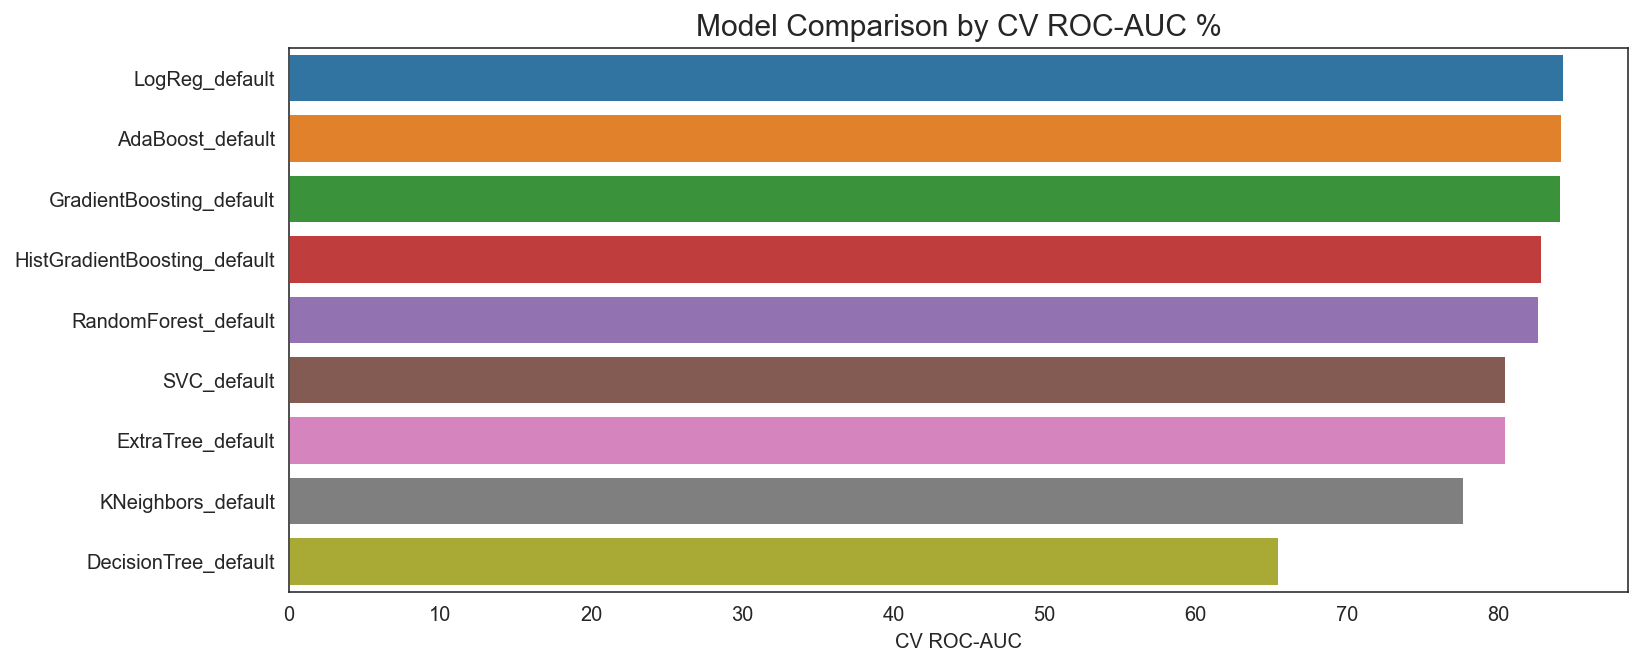

In [87]:
plt.figure(figsize=(12, 5))
plt.title('Model Comparison by CV ROC-AUC %', size=15)
sns.barplot(data=model_results, x='CV ROC-AUC', y=model_results.index);

    Looking at the results:
    
    - The LogisticRegression is slightly outperforming the best tree and ensemble models with a mean CV 
      ROC-AUC score of 84.38% when compared with AdaBoostClassifer and GradientBoostingClassifer, 84.24% 
      and 84.18% respectively.
    
   

### XBoost

In [88]:
%%time

# Define data preprocessing tools
imp_mean = SimpleImputer(strategy='constant', fill_value=0)
ohe = OneHotEncoder(handle_unknown='ignore')


# Define cat and num preprocessing
num_preprocessor = imp_mean
cat_preprocessor = ohe

# Combine num and cat preprocessing
ct = ColumnTransformer([
    ('numerical', num_preprocessor, num_cols),
    ('categorical', cat_preprocessor, cat_cols)])


# Define Model
models = [XGBClassifier(use_label_encoder=False, random_state=999)]

# Models Evaluation Strategy
skfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=999)
metric = 'roc_auc'

scores = []
model_name = ['XGBoost_default']

for model in models:
    # Define model pipeline
    pipe = Pipeline([('preprocessing', ct), ('model', model)])
    
    # CV model pipeline
    cv_scores = cross_val_score(pipe, X=X_train, y=y_train, 
                                scoring=metric, cv=skfold, n_jobs=-1, error_score='raise').mean() 
    # Fit model pipeline
    pipe.fit(X_train, y_train)
    
    # Predict model pipeline
    y_predprob = pipe.predict_proba(X_test)[:,1]
    
    # Append model scores 
    scores.append(({
        'Test ROC-AUC': round(roc_auc_score(y_test, y_predprob) * 100, 2),
        'CV ROC-AUC': round(cv_scores * 100, 2)
    })) 

[17:18:44] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
CPU times: user 4.11 s, sys: 109 ms, total: 4.22 s
Wall time: 6.14 s


In [89]:
xgb_model_results = pd.DataFrame(data=scores, columns=['Test ROC-AUC', 'CV ROC-AUC'], index=model_name)
xgb_model_results

,Test ROC-AUC,CV ROC-AUC
XGBoost_default,81.09,81.71


In [90]:
model_results = pd.concat([model_results, xgb_model_results], axis=0)
model_results.sort_values(by=['CV ROC-AUC'], ascending=False, inplace=True)
model_results

,Test ROC-AUC,CV ROC-AUC
LogReg_default,84.18,84.38
AdaBoost_default,84.17,84.24
GradientBoosting_default,84.57,84.18
HistGradientBoosting_default,82.54,82.88
RandomForest_default,81.16,82.73
XGBoost_default,81.09,81.71
SVC_default,79.72,80.50
ExtraTree_default,77.56,80.50
KNeighbors_default,77.30,77.77
DecisionTree_default,66.69,65.49


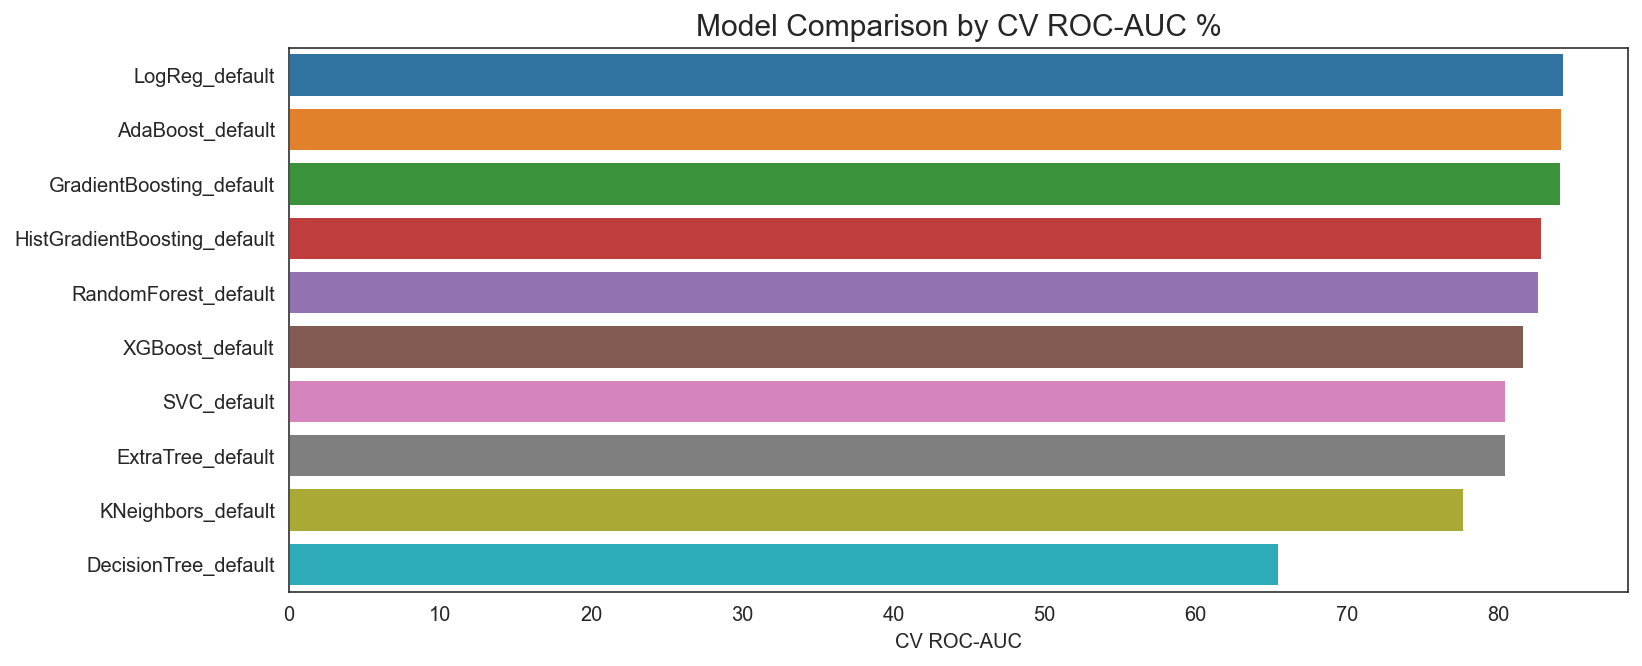

In [91]:
plt.figure(figsize=(12 ,5))
plt.title('Model Comparison by CV ROC-AUC %', size=15)
sns.barplot(data=model_results, x='CV ROC-AUC', y=model_results.index);

    - XBoost didn't perform well. 
    - The top performing models remain the same.

### Tune - Logistic Regression

In [92]:
%%time

# Define data preprocessing tools
imp_mean = SimpleImputer(strategy='constant', fill_value=0, add_indicator=True)
scl = StandardScaler()
ohe = OneHotEncoder(handle_unknown='ignore')

# Define cat and num preprocessing
num_preprocessor = Pipeline([
    ('impute', imp_mean),
    ('scale', scl)
])

cat_preprocessor = ohe

# Combine num and cat preprocessing
ct = ColumnTransformer([
    ('numerical', num_preprocessor, num_cols),
    ('categorical', cat_preprocessor, cat_cols)])

# Define best model pipeline 
logreg_pipe = Pipeline([
    ('preprocessing', ct),
    ('model', LogisticRegression(solver='liblinear', random_state=999))
])

CPU times: user 233 µs, sys: 2 µs, total: 235 µs
Wall time: 242 µs


In [93]:
# logreg_pipe.get_params()

In [94]:
%%time

# Define model pipeline parameter grid
logreg_param_grid = {
    'model__C': np.logspace(-3, 0, 20),
    'model__max_iter': range(0, 1000),
    'model__penalty': ['l1', 'l2'],
    'model__tol': [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1],
    'model__class_weight': [None, 'balanced']
}

# Define model evaluation strategy
skfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=999)
metric = 'roc_auc'


logreg_rs = RandomizedSearchCV(logreg_pipe,
                               param_distributions=logreg_param_grid,
                               scoring=metric,
                               cv=skfold,
                               n_iter=20,
                               n_jobs=-1,
                               verbose=1,
                               error_score='raise',
                               return_train_score=True)

logreg_rs.fit(X_train, y_train);

Fitting 10 folds for each of 20 candidates, totalling 200 fits
CPU times: user 1.43 s, sys: 62.3 ms, total: 1.49 s
Wall time: 6.24 s


RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=999, shuffle=True),
                   error_score='raise',
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(transformers=[('numerical',
                                                                               Pipeline(steps=[('impute',
                                                                                                SimpleImputer(add_indicator=True,
                                                                                                              fill_value=0,
                                                                                                              strategy='constant')),
                                                                                               ('scale',
                                                                                                StandardScaler())]),
      

In [95]:
logreg_best_score = logreg_rs.best_score_
print(f'Best LogReg Model mean CV ROC-AUC Score: {(logreg_best_score * 100):.2f}%')

Best LogReg Model mean CV ROC-AUC Score: 84.36%


In [96]:
print(f'Best LogReg Model Parameters:\n{logreg_rs.best_params_}')

Best LogReg Model Parameters:
{'model__tol': 1e-05, 'model__penalty': 'l1', 'model__max_iter': 441, 'model__class_weight': None, 'model__C': 0.4832930238571752}


In [97]:
print('Best LogReg Model Results:\n')
logreg_results = pd.DataFrame(logreg_rs.cv_results_)
logreg_results.sort_values(by=['rank_test_score'], ascending=True, inplace=True)
logreg_results.head()

Best LogReg Model Results:



,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__tol,param_model__penalty,param_model__max_iter,param_model__class_weight,param_model__C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
17,0.383655,0.145037,0.019306,0.002869,0.00001,l1,441,None,0.483293,"{'model__tol': 1e-05, 'model__penalty': 'l1', ...",0.841436,0.865952,0.843738,0.846762,0.834755,0.841823,0.857777,0.831109,0.823097,0.849927,0.843638,0.011887,1,0.847749,0.845076,0.847268,0.847212,0.848400,0.847755,0.845767,0.848988,0.849892,0.847023,0.847513,0.001346
7,0.277766,0.037060,0.019476,0.002001,0.000001,l1,146,balanced,0.695193,"{'model__tol': 1e-06, 'model__penalty': 'l1', ...",0.841578,0.866214,0.844000,0.847266,0.832622,0.842270,0.857452,0.832643,0.823178,0.848952,0.843617,0.011870,2,0.847676,0.845167,0.847246,0.847335,0.848448,0.847796,0.845828,0.849052,0.850020,0.847041,0.847561,0.001352
15,0.103948,0.005106,0.022616,0.002649,0.001,l2,557,None,0.483293,"{'model__tol': 0.001, 'model__penalty': 'l2', ...",0.841294,0.865528,0.843315,0.847165,0.834735,0.841478,0.858183,0.831221,0.822874,0.849521,0.843531,0.011885,3,0.847824,0.845121,0.847334,0.847277,0.848426,0.847823,0.845880,0.849039,0.849910,0.847018,0.847565,0.001334
4,0.276747,0.051568,0.018628,0.001381,0.000001,l1,666,balanced,0.483293,"{'model__tol': 1e-06, 'model__penalty': 'l1', ...",0.841193,0.866254,0.843758,0.847225,0.832440,0.842493,0.857574,0.832155,0.823117,0.848952,0.843516,0.011968,4,0.847575,0.845095,0.847158,0.847207,0.848393,0.847710,0.845788,0.848965,0.849940,0.846976,0.847481,0.001347
5,0.358853,0.106078,0.018310,0.001596,0.000001,l1,408,None,0.335982,"{'model__tol': 1e-06, 'model__penalty': 'l1', ...",0.841415,0.866355,0.843315,0.846217,0.834166,0.841661,0.857533,0.830886,0.823198,0.849866,0.843461,0.011972,5,0.847567,0.844904,0.847140,0.847031,0.848067,0.847574,0.845614,0.848803,0.849710,0.846778,0.847319,0.001332


In [98]:
print('Best LogReg Model is saved!!')
logreg = logreg_rs.best_estimator_

Best LogReg Model is saved!!


In [99]:
best_logreg_model = pd.DataFrame(columns=['Test ROC-AUC', 'CV ROC-AUC'], index=['LogReg_tuned'])
best_logreg_model.loc['LogReg_tuned', 'Test ROC-AUC'] = round(roc_auc_score(y_test, logreg_rs.best_estimator_.predict_proba(X_test)[:,1]) * 100, 2)
best_logreg_model.loc['LogReg_tuned', 'CV ROC-AUC'] = round(logreg_rs.best_score_ * 100, 2)
best_logreg_model

,Test ROC-AUC,CV ROC-AUC
LogReg_tuned,84.17,84.36


In [100]:
model_results = pd.concat([model_results, best_logreg_model], axis=0)
model_results.sort_values(by=['CV ROC-AUC'], ascending=False, inplace=True)
model_results

,Test ROC-AUC,CV ROC-AUC
LogReg_default,84.18,84.38
LogReg_tuned,84.17,84.36
AdaBoost_default,84.17,84.24
GradientBoosting_default,84.57,84.18
HistGradientBoosting_default,82.54,82.88
RandomForest_default,81.16,82.73
XGBoost_default,81.09,81.71
SVC_default,79.72,80.5
ExtraTree_default,77.56,80.5
KNeighbors_default,77.3,77.77


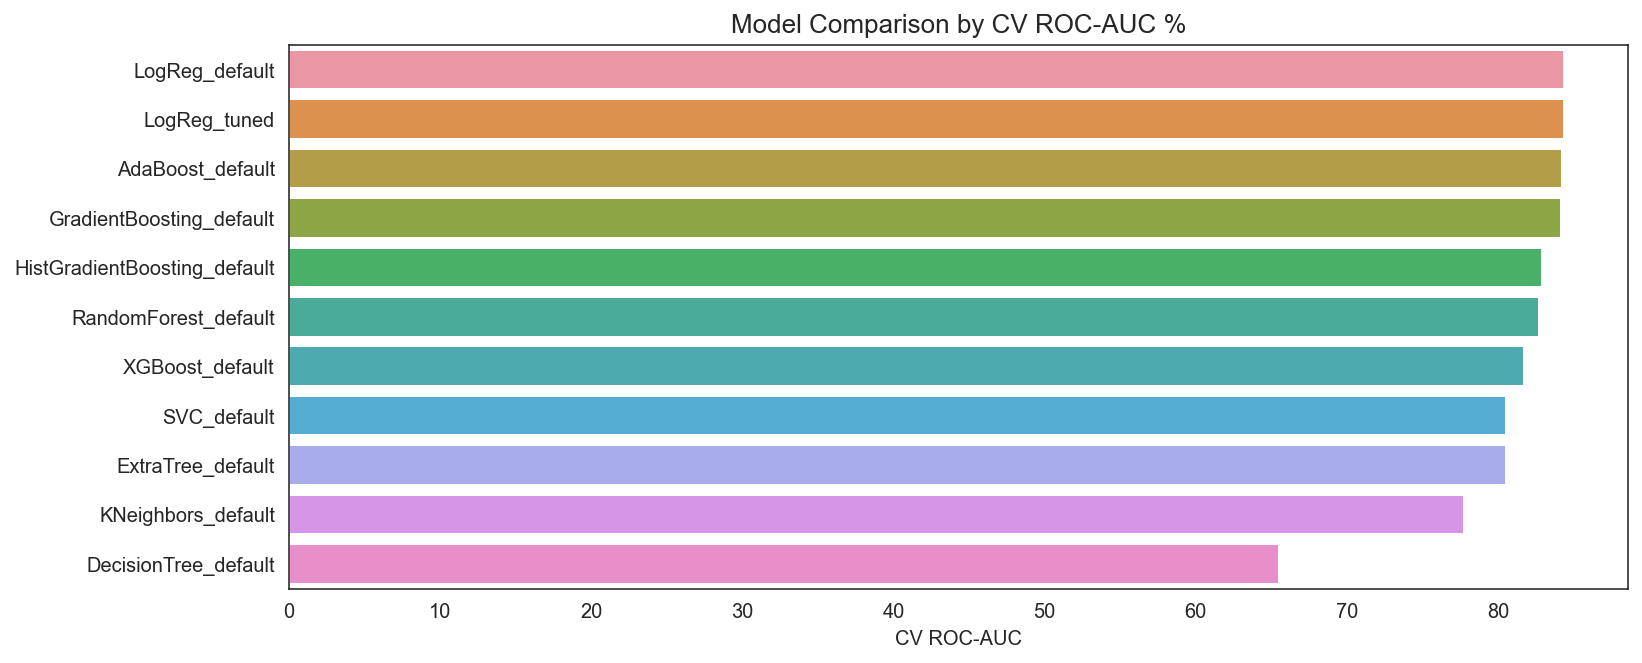

In [101]:
plt.figure(figsize=(12 ,5))
plt.title('Model Comparison by CV ROC-AUC %', size=13)
sns.barplot(data=model_results, x='CV ROC-AUC', y=model_results.index);

### Tune - XBoost

In [102]:
%%time

# Define data preprocessing tools
imp_mean = SimpleImputer(strategy='constant', fill_value=0, add_indicator=True)
ohe = OneHotEncoder(handle_unknown='ignore')

# Define cat and num preprocessing
num_preprocessor = imp_mean
cat_preprocessor = ohe

# Combine num and cat preprocessing
ct = ColumnTransformer([
    ('numerical', num_preprocessor, num_cols),
    ('categorical', cat_preprocessor, cat_cols)])

# Define best model pipeline 
xgb_pipe = Pipeline([
    ('preprocessing', ct),
    ('model', XGBClassifier(use_label_encoder=False, random_state=999))
])

CPU times: user 140 µs, sys: 1 µs, total: 141 µs
Wall time: 145 µs


In [103]:
# xgb_pipe.get_params()

In [104]:
%%time

# Define model pipeline parameter grid
xgb_param_grid = {
    'model__n_estimators': range(100, 1000),
    'model__max_depth': range(1, 10),
    'model__learning_rate': [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.05, 0.09],
    'model__min_child_weight': range(1, 10),
    'model__scale_pos_weight': range(1, 5),
    'model__subsample': [i/10.0 for i in range(1, 10)],
    'model__colsample_bytree': [i/10.0 for i in range(1, 10)]    
}

# Define model evaluation strategy
skfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=999)
metric = 'roc_auc'


xgb_rs = RandomizedSearchCV(xgb_pipe,
                            param_distributions=xgb_param_grid,
                            scoring=metric,
                            cv=skfold,
                            n_iter=20,
                            n_jobs=-1,
                            verbose=1,
                            error_score='raise',
                            return_train_score=True)

xgb_rs.fit(X_train, y_train);

Fitting 10 folds for each of 20 candidates, totalling 200 fits
[17:24:32] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
CPU times: user 6.93 s, sys: 189 ms, total: 7.12 s
Wall time: 5min 41s


RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=999, shuffle=True),
                   error_score='raise',
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(transformers=[('numerical',
                                                                               SimpleImputer(add_indicator=True,
                                                                                             fill_value=0,
                                                                                             strategy='constant'),
                                                                               ['SeniorCitizen',
                                                                                'tenure',
                                                                                'MonthlyCharges',
                                                                                'TotalCharges']),
   

In [105]:
xgb_best_score = xgb_rs.best_score_
print(f'Best XGBoost Model mean CV ROC-AUC Score: {(xgb_best_score * 100):.2f}%')

Best XGBoost Model mean CV ROC-AUC Score: 84.59%


In [106]:
print(f'Best XGBoost Model Parameters:\n{xgb_rs.best_params_}')

Best XGBoost Model Parameters:
{'model__subsample': 0.2, 'model__scale_pos_weight': 3, 'model__n_estimators': 258, 'model__min_child_weight': 4, 'model__max_depth': 6, 'model__learning_rate': 0.006, 'model__colsample_bytree': 0.6}


In [107]:
print('Best XGBoost Model Results:\n')
xgb_results = pd.DataFrame(xgb_rs.cv_results_)
xgb_results.sort_values(by=['rank_test_score'], ascending=True, inplace=True)
xgb_results.head()

Best XGBoost Model Results:



,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__subsample,param_model__scale_pos_weight,param_model__n_estimators,param_model__min_child_weight,param_model__max_depth,param_model__learning_rate,param_model__colsample_bytree,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
1,7.527467,0.151843,0.021562,0.003919,0.2,3,258,4,6,0.006,0.6,"{'model__subsample': 0.2, 'model__scale_pos_we...",0.849680,0.863150,0.840150,0.844202,0.841518,0.834532,0.868683,0.823320,0.830490,0.863494,0.845922,0.014395,1,0.872605,0.872937,0.875198,0.874289,0.873815,0.875167,0.872567,0.876584,0.875917,0.873587,0.874267,0.001336
16,4.447500,0.094920,0.018600,0.000941,0.9,2,327,3,4,0.05,0.1,"{'model__subsample': 0.9, 'model__scale_pos_we...",0.847401,0.861416,0.843466,0.847568,0.835263,0.829688,0.856274,0.833354,0.830612,0.855675,0.844072,0.010902,2,0.872111,0.872008,0.872935,0.873578,0.871246,0.872211,0.869821,0.872172,0.872272,0.870723,0.871908,0.001019
12,12.987479,0.300674,0.021418,0.001020,0.4,2,247,4,7,0.002,0.9,"{'model__subsample': 0.4, 'model__scale_pos_we...",0.848242,0.859642,0.843758,0.841440,0.837111,0.830652,0.866124,0.820436,0.826793,0.863078,0.843728,0.014829,3,0.883384,0.883307,0.884762,0.885645,0.885123,0.885592,0.882994,0.886661,0.885539,0.884147,0.884715,0.001153
19,3.179449,0.670759,0.019324,0.001173,0.3,2,256,7,3,0.007,0.2,"{'model__subsample': 0.3, 'model__scale_pos_we...",0.846236,0.859461,0.839102,0.850249,0.836360,0.834156,0.858102,0.828865,0.830256,0.853725,0.843651,0.010828,4,0.850889,0.849649,0.852196,0.850807,0.852273,0.853030,0.849413,0.852802,0.852509,0.850145,0.851371,0.001282
9,10.006543,0.376400,0.020298,0.000726,0.6,3,447,4,5,0.002,0.2,"{'model__subsample': 0.6, 'model__scale_pos_we...",0.848414,0.859985,0.839787,0.849402,0.833191,0.830287,0.857939,0.828784,0.829292,0.853359,0.843044,0.011608,5,0.863486,0.861725,0.864412,0.863539,0.864246,0.865188,0.862012,0.865142,0.864566,0.861931,0.863625,0.001255


In [108]:
print('Best XGBoost Model is saved!!')
xgb = xgb_rs.best_estimator_

Best XGBoost Model is saved!!


In [109]:
best_xgb_model = pd.DataFrame(columns=['Test ROC-AUC', 'CV ROC-AUC'], index=['XGBoost_tuned'])
best_xgb_model.loc['XGBoost_tuned', 'Test ROC-AUC'] = round(roc_auc_score(y_test, xgb_rs.best_estimator_.predict_proba(X_test)[:,1]) * 100, 2)
best_xgb_model.loc['XGBoost_tuned', 'CV ROC-AUC'] = round(xgb_rs.best_score_ * 100, 2)
best_xgb_model

,Test ROC-AUC,CV ROC-AUC
XGBoost_tuned,84.62,84.59


In [110]:
model_results = pd.concat([model_results, best_xgb_model], axis=0)
model_results.sort_values(by=['CV ROC-AUC'], ascending=False, inplace=True)
model_results

,Test ROC-AUC,CV ROC-AUC
XGBoost_tuned,84.62,84.59
LogReg_default,84.18,84.38
LogReg_tuned,84.17,84.36
AdaBoost_default,84.17,84.24
GradientBoosting_default,84.57,84.18
HistGradientBoosting_default,82.54,82.88
RandomForest_default,81.16,82.73
XGBoost_default,81.09,81.71
SVC_default,79.72,80.5
ExtraTree_default,77.56,80.5


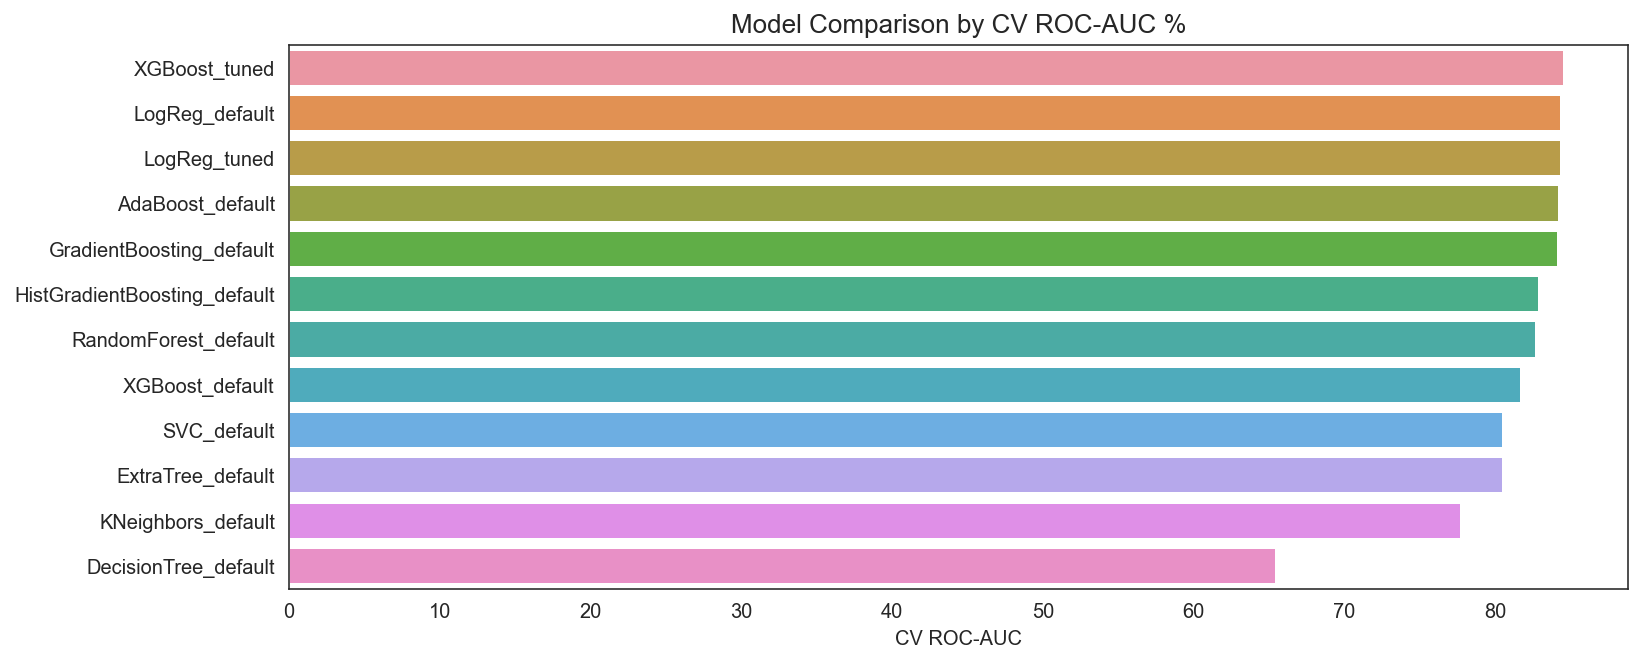

In [111]:
plt.figure(figsize=(12 ,5))
plt.title('Model Comparison by CV ROC-AUC %', size=13)
sns.barplot(data=model_results, x='CV ROC-AUC', y=model_results.index);

# 5. Predictions on the testing set (i.e. hold-out test set)

In [112]:
logreg_pred = logreg.predict(X_test)
logreg_predprob = logreg.predict_proba(X_test)[:,1]

In [113]:
xgb_pred = xgb.predict(X_test)
xgb_predprob = xgb.predict_proba(X_test)[:,1]

### 5.1 ROC-AUC

In [114]:
logreg_roc_auc = roc_auc_score(y_test, logreg_predprob) * 100
print(f'Best Logistic Regression ROC-AUC test score: {logreg_roc_auc:.2f}%')

Best Logistic Regression ROC-AUC test score: 84.17%


In [115]:
xgb_roc_auc = roc_auc_score(y_test, xgb_predprob) * 100
print(f'Best XGBoost ROC-AUC test score: {xgb_roc_auc:.2f}%')

Best XGBoost ROC-AUC test score: 84.62%


### 5.2 Confusion Matrix

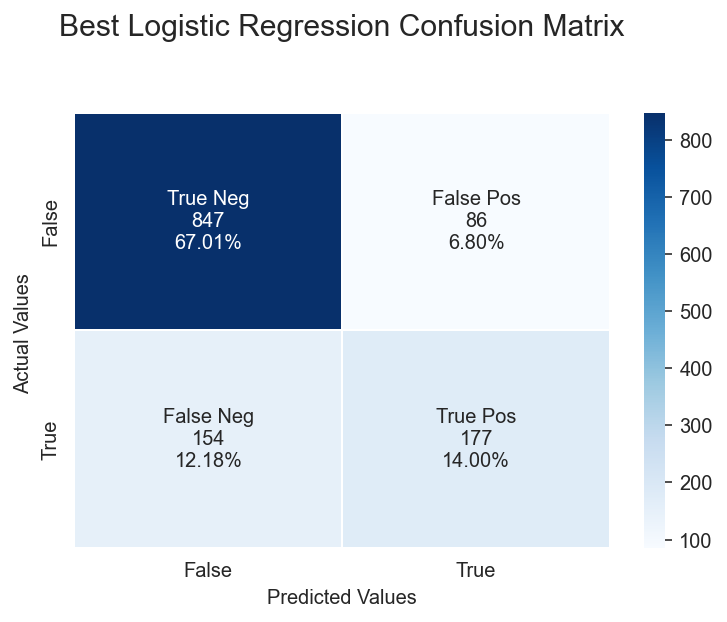

In [116]:
logreg_cm = confusion_matrix(y_test, logreg_pred)

group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']

group_sum = ['{0:0.0F}'.format(value) for value in logreg_cm.flatten()]

group_percent = ['{0:.2%}'.format(value) for value in 
                 logreg_cm.flatten()/np.sum(logreg_cm)]

labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
         zip(group_names, group_sum, group_percent)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(logreg_cm, annot=labels, fmt='', linewidths=0.75, cmap='Blues')

ax.set_title('Best Logistic Regression Confusion Matrix\n\n', size=15);
ax. set_xlabel("Predicted Values")
ax. set_ylabel('Actual Values ');
#
# Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False', 'True'])
ax.yaxis.set_ticklabels(['False', 'True']);

    From the confusion matrix we can see that: 
    
    - There are total 845 + 88 = 933 actual non-churn values and the algorithm predicts 845 of them as non churn 
      and 88 of them as churn. 
    - While there are 155 + 176 = 331 actual churn values and the algorithm predicts 155 of them as non churn 
      values and 176 of them as churn values.

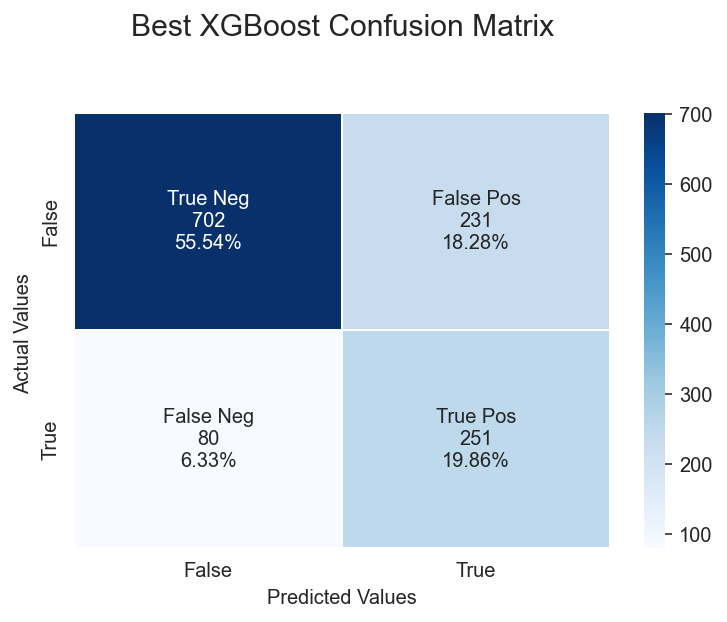

In [117]:
xgb_cm = confusion_matrix(y_test, xgb_pred)

group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']

group_sum = ['{0:0.0F}'.format(value) for value in xgb_cm.flatten()]

group_percent = ['{0:.2%}'.format(value) for value in 
                 xgb_cm.flatten()/np.sum(xgb_cm)]

labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
         zip(group_names, group_sum, group_percent)]

labels = np. asarray(labels).reshape(2,2)

ax = sns.heatmap(xgb_cm, annot=labels, fmt='', linewidths=0.75, cmap='Blues')

ax.set_title('Best XGBoost Confusion Matrix\n\n', size=15);
ax. set_xlabel("Predicted Values")
ax. set_ylabel('Actual Values ');
#
# Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False', 'True'])
ax.yaxis.set_ticklabels(['False', 'True']);

    From the confusion matrix we can see that: 

    - There are total 685 + 248 = 933 actual non-churn values and the algorithm predicts 685 of them as non churn 
      and 241 of them as churn. 
    - While there are 75 + 256 = 331 actual churn values and the algorithm predicts 75 of them as non churn 
      values and 256 of them as churn values.

### 5.3 Classification Report

In [118]:
logreg_cr = classification_report(y_test, logreg_pred)
print(f'Best Logistic Regression Classification Report\n\n{logreg_cr}')

Best Logistic Regression Classification Report

              precision    recall  f1-score   support

           0       0.85      0.91      0.88       933
           1       0.67      0.53      0.60       331

    accuracy                           0.81      1264
   macro avg       0.76      0.72      0.74      1264
weighted avg       0.80      0.81      0.80      1264



In [119]:
xgb_cr = classification_report(y_test, xgb_pred)
print(f'Best XGBoost Classification Report\n\n{xgb_cr}')

Best XGBoost Classification Report

              precision    recall  f1-score   support

           0       0.90      0.75      0.82       933
           1       0.52      0.76      0.62       331

    accuracy                           0.75      1264
   macro avg       0.71      0.76      0.72      1264
weighted avg       0.80      0.75      0.77      1264



### 5.4 Precision

In [120]:
logreg_precision = precision_score(y_test, logreg_pred) * 100
print(f'Best LogReg model test precision score: {logreg_precision:.2f}%')

Best LogReg model test precision score: 67.30%


In [121]:
xgb_precision = precision_score(y_test, xgb_pred) * 100
print(f'Best XGBoost model test precision score: {xgb_precision:.2f}%')

Best XGBoost model test precision score: 52.07%


### 5.5 Recall

In [122]:
logreg_recall = recall_score(y_test, logreg_pred) * 100
print(f'Best LogReg model test recall score: {logreg_recall:.2f}%')

Best LogReg model test recall score: 53.47%


In [123]:
xgb_recall = recall_score(y_test, xgb_pred) * 100
print(f'Best XGBoost model test recall score: {xgb_recall:.2f}%')

Best XGBoost model test recall score: 75.83%


### 5.6 Summary Results

In [124]:
tuned_model_result = pd.DataFrame(columns=['CV ROC-AUC', 'Test ROC-AUC', 'Test Precision', 'Test Recall'], 
                                  index=['LogReg_tuned', 'XGBoost_tuned'])

tuned_model_result.loc['LogReg_tuned', 'CV ROC-AUC'] = round(logreg_best_score * 100, 2)
tuned_model_result.loc['XGBoost_tuned', 'CV ROC-AUC'] = round(xgb_best_score * 100, 2)
tuned_model_result.loc['LogReg_tuned', 'Test ROC-AUC'] = round(logreg_roc_auc, 2)
tuned_model_result.loc['XGBoost_tuned', 'Test ROC-AUC'] = round(xgb_roc_auc, 2)
tuned_model_result.loc['LogReg_tuned', 'Test Precision'] = round(logreg_precision, 2)
tuned_model_result.loc['XGBoost_tuned', 'Test Precision'] = round(xgb_precision, 2)
tuned_model_result.loc['LogReg_tuned', 'Test Recall'] = round(logreg_recall, 2)
tuned_model_result.loc['XGBoost_tuned', 'Test Recall'] = round(xgb_recall, 2)
tuned_model_result

,CV ROC-AUC,Test ROC-AUC,Test Precision,Test Recall
LogReg_tuned,84.36,84.17,67.3,53.47
XGBoost_tuned,84.59,84.62,52.07,75.83


# 6. Conclusions

- We have developed a resuable model pipeline able to classify customer churn.
- First, we started out with a detailed exploratory data analysis of the dataset. We analyzed our descriptive features and target feature in detail. 
- We decided on model selection, model metric and model evalutation strategy.
- We looked at 10 different classifiers.
- We tuned our best found (LogReg in our case) classifier. We also tuned XGBoost classifer.

    
From the above results, our aim is to predict the customers that will possibly churn so they can be put in some sort of scheme to prevent churn hence the recall measures on the 1's is of more important than the overall ROC-AUC score of the model.

From EDA, we saw that we had about 27% of churn, a recall greater than this baseline will already be an improvement but we want to get as high as possible while trying to maintain a high precision so that the telecommunication company can train its resources effectively towards clients highlighted by the model without wasting too much resources on the false positives.

From the review of the fitted models above, the best model that gives a decent balance of the recall and precision is the XGBoost model where according to the fit on the training set, with a precision score on 1's of 0.50, out of all customers that the model thinks will churn, 50.79% do actually churn and with the recall score of 0.77 on the 1's, the model is able to highlight 77.34% of all those who churned.

### Save Best Model

In [125]:
# Fit best model on all data
xgb.fit(X, y)

[17:24:34] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numerical',
                                                  SimpleImputer(add_indicator=True,
                                                                fill_value=0,
                                                                strategy='constant'),
                                                  ['SeniorCitizen', 'tenure',
                                                   'MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('categorical',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['gender', 'Partner',
                                                   'Dependents', 'PhoneService',
                                                   'MultipleLines',
                                                   'InternetSer

In [126]:
import joblib
joblib.dump(xgb, 'customer_churn_model_telco_v1.pkl', compress=1)
print('Best Model Saved!!')

Best Model Saved!!


### Load Best Model

In [127]:
best_model = joblib.load('customer_churn_model_telco_v1.pkl')
print('Best Model Loaded!!')

Best Model Loaded!!


### Deploy Best Model on New Unseen Data (aka test set)

In [128]:
test.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1795,Female,0,Yes,No,19,Yes,Yes,Fiber optic,No,No,Yes,No,No,Yes,Month-to-month,No,Mailed check,89.65,1761.05,1
3494,Female,0,Yes,Yes,9,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),85.35,754.65,1
7030,Female,0,No,No,2,Yes,No,No,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,20.05,39.25,0
2468,Male,0,Yes,No,4,No,No,DSL,No,Yes,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,48.55,201.00,1
3658,Female,0,No,No,10,Yes,No,DSL,No,No,Yes,Yes,No,No,Month-to-month,No,Electronic check,54.25,583.00,0


In [129]:
test.shape

(703, 20)

In [130]:
X_new = test.drop('Churn', axis=1)
y_new = test['Churn']
print(X_new.shape, y_new.shape)

(703, 19) (703,)


In [131]:
model_pred = best_model.predict(X_new)
model_predproba = best_model.predict_proba(X_new)[:,1]

In [132]:
final_predictions = pd.DataFrame({'Model Predictions': model_pred, 'Actual Results': y_new})
final_predictions.head(15)

,Model Predictions,Actual Results
1795,1,1
3494,1,1
7030,0,0
2468,1,1
3658,0,0
1568,1,0
4855,0,0
6050,0,0
2030,0,0
6802,1,0


In [133]:
final_predictions.to_csv('customer_churn_telco_predictions_v1.csv')
print('Final Predictions CSV file saved!!')

Final Predictions CSV file saved!!


In [134]:
comparison = model_pred == y_new
np.unique(comparison, return_counts=True)

(array([False,  True]), array([164, 539]))

### ROC-AUC

In [135]:
best_model_roc_auc = roc_auc_score(y_new, model_predproba) * 100
print(f'Best Model ROC-AUC test score: {best_model_roc_auc:.2f}%')

Best Model ROC-AUC test score: 86.36%


### Confusion Matrix

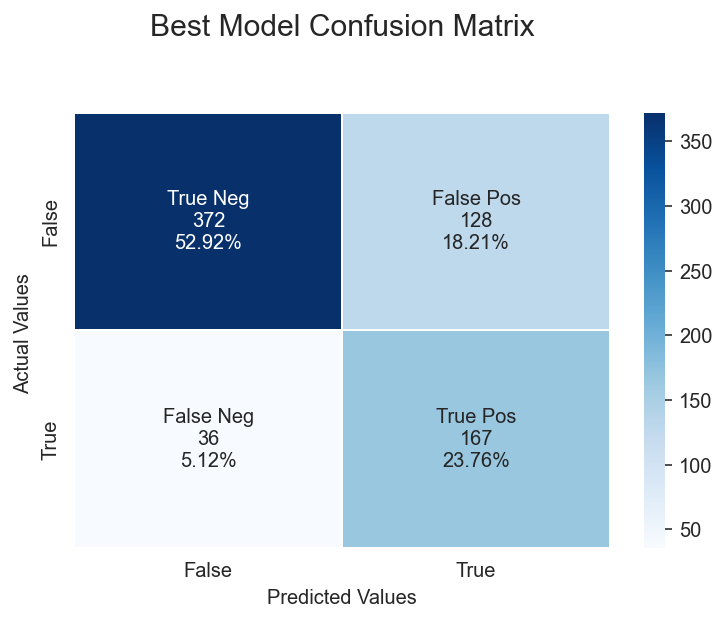

In [136]:
best_model_cm = confusion_matrix(y_new, model_pred)

group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']

group_sum = ['{0:0.0F}'.format(value) for value in best_model_cm.flatten()]

group_percent = ['{0:.2%}'.format(value) for value in 
                 best_model_cm.flatten()/np.sum(best_model_cm)]

labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
         zip(group_names, group_sum, group_percent)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(best_model_cm, annot=labels, fmt='', linewidths=0.75, cmap='Blues')

ax.set_title('Best Model Confusion Matrix\n\n', size=15);
ax. set_xlabel("Predicted Values")
ax. set_ylabel('Actual Values ');
#
# Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False', 'True'])
ax.yaxis.set_ticklabels(['False', 'True']);

### Classification Report

In [137]:
best_model_cr = classification_report(y_new, model_pred)
print(f'Best Model Classification Report\n\n{best_model_cr}')

Best Model Classification Report

              precision    recall  f1-score   support

           0       0.91      0.74      0.82       500
           1       0.57      0.82      0.67       203

    accuracy                           0.77       703
   macro avg       0.74      0.78      0.75       703
weighted avg       0.81      0.77      0.78       703



### Precision

In [138]:
best_model_precision = precision_score(y_new, model_pred) * 100
print(f'Best Model test precision score: {best_model_precision:.2f}%')

Best Model test precision score: 56.61%


### Recall

In [139]:
best_model_recall = recall_score(y_new, model_pred) * 100
print(f'Best Model test recall score: {best_model_recall:.2f}%')

Best Model test recall score: 82.27%


In [140]:
best_model_result = pd.DataFrame(columns=['ROC-AUC', 'Precision', 'Recall'], 
                                  index=['Best_Model'])

best_model_result.loc['Best_Model', 'ROC-AUC'] = round(best_model_roc_auc, 2)
best_model_result.loc['Best_Model', 'Precision'] = round(best_model_precision, 2)
best_model_result.loc['Best_Model', 'Recall'] = round(best_model_recall, 2)
best_model_result

,ROC-AUC,Precision,Recall
Best_Model,86.36,56.61,82.27


## Reproducibility

In [141]:
%watermark -a 'Rainier Goubault' -u -d -n -m -v -iv 

Author: Rainier Goubault

Last updated: 2021-11-22

Python implementation: CPython
Python version       : 3.9.7
IPython version      : 7.27.0

Compiler    : Clang 11.1.0 
OS          : Darwin
Release     : 21.1.0
Machine     : x86_64
Processor   : i386
CPU cores   : 8
Architecture: 64bit

seaborn   : 0.11.2
scipy     : 1.7.1
numpy     : 1.21.2
matplotlib: 3.4.3
sklearn   : 0.24.2
joblib    : 1.0.1
plotly    : 5.3.1
json      : 2.0.9
pandas    : 1.3.3

